In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics as metrics
import plotly.graph_objects as go
import plotly.express as px

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# **OVERVIEW**

The dataset is from a survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. 

**EXPECTED OUTPUT:** predict whether a worker needs treatment or not.

# **DATA UNDERSTANDING**

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

### Exploratory Data Analysis (EDA)
1. Data Cleaning -> Numerical Feature and Categorical yang aneh nilainya
2. Plotting Numerical
3. Plotting Categorical based on target

In [2]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.shape

(1987, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
#Drop Column
df_drop = df.copy()
column=['Unnamed: 0']
df_drop = df_drop.drop(columns=column)

In [6]:
df = df.rename(columns = {"Unnamed: 0": "ID"})
df.sample()

,ID,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1755,1755,34,Private Sector/Self Employed,Yes,850000,5,1,No,No,0


In [7]:
for column in df_drop.columns: #df disesuaikan dengan nama dataframe
    print(f"============= {column} =================")
    display(df_drop[column].value_counts())
    print()

============= Age =================


28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64


============= Employment Type =================


Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64


============= GraduateOrNot =================


Yes    1692
No      295
Name: GraduateOrNot, dtype: int64


============= AnnualIncome =================


800000     153
500000     143
1400000    130
1200000    112
1100000    107
600000      98
700000      95
1300000     91
300000      88
1500000     82
1050000     82
550000      81
1150000     79
900000      72
1250000     71
750000      65
400000      65
1000000     60
350000      55
850000      55
1350000     43
1700000     37
1450000     31
650000      30
950000      21
1750000     15
450000      15
1550000      5
1800000      4
1650000      2
Name: AnnualIncome, dtype: int64


============= FamilyMembers =================


4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64


============= ChronicDiseases =================


0    1435
1     552
Name: ChronicDiseases, dtype: int64


============= FrequentFlyer =================


No     1570
Yes     417
Name: FrequentFlyer, dtype: int64


============= EverTravelledAbroad =================


No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


============= TravelInsurance =================


0    1277
1     710
Name: TravelInsurance, dtype: int64

## Plotting for Numerical Data
1. Apakah umur mempengaruhi ketertarikan pelanggan untuk membeli asuransi perjalanan?

In [8]:
fig = px.histogram(df, 
             x='Age', 
             color='TravelInsurance', 
             title='Age vs Travel Insurance',
             width=500, 
             height=400
            )
fig.show()

In [ ]:
px.histogram(df, 
             x='Age', 
             color='TravelInsurance', 
             title='Age vs Travel Insurance',
             width=500, 
             height=400
            )

**Observasi:**

Pada grafik di atas, kelompok usia 27, 29, 30, 32, dan 35 tidak banyak tertarik untuk membeli asuransi perjalanan. Namun, orang yang berusia selain umur tersebut masih tertarik untuk membeli asuransi tersebut. Terlihat bahwa umur tidak terlalu mempengaruhi pembelian asuransi perjalanan.

2. Berapa pendapatan pelanggan yang membeli asuransi?

In [ ]:
px.histogram(df, 
             x='AnnualIncome', 
             color='TravelInsurance', 
             title='Annual Income vs Travel Insurance',
             width=500, 
             height=400
            )

Dari grafik di atas terlihat jelas, bahwa orang yang pendapatan tahunannya lebih besar dari 1,3 juta telah membeli lebih banyak asuransi perjalanan daripada orang yang pendapatan tahunannya kurang dari 1,3 juta.

3. Apakah jumlah anggota keluarga mempengaruhi pembelian asuransi?

Text(0, 0.5, 'percentage')

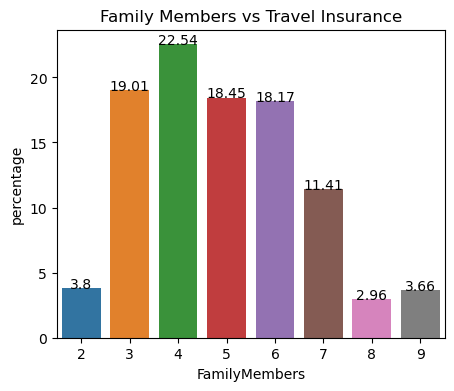

In [ ]:
df_yes = df[df['TravelInsurance']==1]

plt.figure(figsize=(5,4))
df_FamMem = pd.DataFrame((df_yes.groupby(['FamilyMembers'])['ID'].count())/len(df_yes)*100)
df_FamMem = df_FamMem.reset_index()
visual=sns.barplot(x="FamilyMembers", y="ID", data=df_FamMem )
for index, row in df_FamMem.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Family Members vs Travel Insurance')
plt.ylabel('percentage')

**Observasi:**

Dari grafik di atas dapat disimpulkan bahwa jumlah anggota keluarga tidak terlalu berpengaruh terhadap pembelian asuransi perjalanan. Bahkan, keluarga yang beranggotakan 8 hingga 9 orang banyak tidak membeli  asuransi perjalanan dibandingkan keluarga lainnya.

3. Apakah pelanggan yang menderita penyakit kronis lebih banyak membeli asuransi?

In [ ]:
px.histogram(df, 
             x='ChronicDiseases', 
             color='TravelInsurance', 
             title='Chronic Diseases vs Travel Insurance',
             width=500, 
             height=400
            )

**Observasi:**

Dari grafik di atas dapat diasumsikan bahwa penyakit tidak lebih berdampak pada pembelian asuransi perjalanan. Di atas menunjukkan banyak yang tidak memiliki penyakit tidak membeli asuransi.

## Plotting for Categorical Data

4. Employment Type seperti apa yang membeli asuransi?

Text(0, 0.5, 'percentage')

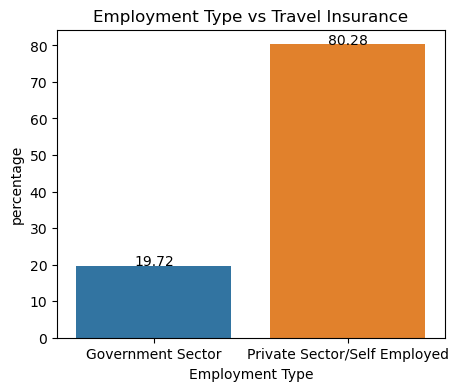

In [ ]:
plt.figure(figsize=(5,4))

df_EmType = pd.DataFrame((df_yes.groupby(['Employment Type'])['ID'].count())/len(df_yes)*100)
df_EmType = df_EmType.reset_index()
visual=sns.barplot(x="Employment Type", y="ID", data=df_EmType )
for index, row in df_EmType.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Employment Type vs Travel Insurance')
plt.ylabel('percentage')

5. Apakah kelulusan mempengaruhi pembelian asuransi?

Text(0, 0.5, 'percentage')

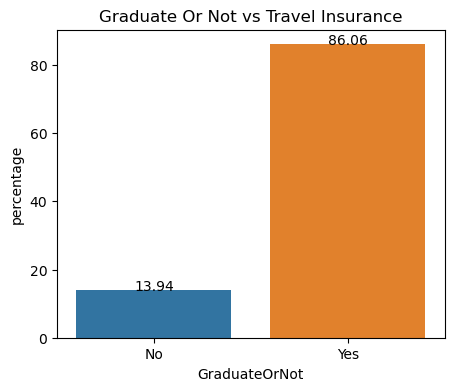

In [ ]:
plt.figure(figsize=(5,4))

df_Grad = pd.DataFrame((df_yes.groupby(['GraduateOrNot'])['ID'].count())/len(df_yes)*100)
df_Grad = df_Grad.reset_index()
visual=sns.barplot(x="GraduateOrNot", y="ID", data=df_Grad )
for index, row in df_Grad.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Graduate Or Not vs Travel Insurance')
plt.ylabel('percentage')

6. Apakah pelanggan yang sering bepergian lebih cenderung membeli asuransi

In [ ]:
px.histogram(df, 
             x='FrequentFlyer', 
             color='TravelInsurance', 
             title='Frequent Flyers vs Travel Insurance',
             width=500, 
             height=400
            )

**Observasi:**

Dari hasil di atas dapat dikatakan bahwa orang yang tidak sering bepergian lebih cenderung membeli asuransi perjalanan sedangkan ada sebagian kecil orang yang sering bepergian tetapi membeli asuransi.

7. Apakah orang yang sering berpergian ke luar negeri lebih banyak membeli asuransi?

In [ ]:
px.histogram(df, 
             x='EverTravelledAbroad', 
             color='TravelInsurance', 
             title='Ever Travelled Abroad vs Travel Insurance',
             width=500, 
             height=400
            )

**Observasi:**

Dari grafik di atas dapat disimpulkan bahwa hanya 380 orang yang telah bepergian ke luar negeri dan 298 orang diantaranya telah membeli asuransi sedangkan 82 orang belum membelinya. Masih ada sebagian besar orang yang bepergian ke luar negeri dan membeli asuransi. Selain itu, mayoritas masyarakat yang belum bepergian ke luar negeri dan belum membeli asuransi. Jadi, satu hal yang dapat diasumsikan bahwa orang yang belum bepergian ke luar negeri tidak memerlukan asuransi saat bepergian di dalam negara karena mereka mungkin merasa kurang berguna.

# Feature Engineering
1. Drop Duplikat
2. Missing Value Handling
3. Outlier Handling
4. Standardisasi menggunakan standar scaller
5. Encoding Categorical

### Drop Duplicated Data

In [ ]:
print("Before drop duplicated data")
df_drop.shape

Before drop duplicated data


(1987, 9)

In [ ]:
df_drop.duplicated().sum()

738

In [ ]:
df_drop[df_drop.duplicated(keep='last')]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
11,26,Private Sector/Self Employed,Yes,1400000,5,0,Yes,Yes,1
13,31,Government Sector,Yes,1500000,6,0,Yes,Yes,1
14,31,Government Sector,Yes,400000,3,0,No,No,0
16,28,Private Sector/Self Employed,Yes,1150000,4,1,No,No,0


Data di atas menunjukan bahwa yang dianggap duplikat data hanya dari beberapa kolom dengan nilai yang sama, bukan semua kolom yang terdapat di dataframe. Maka data tersebut tidak perlu didrop.

## MISSING VALUES

*CHECKING MISSING VALUES*





In [ ]:
df.isnull().sum()

ID                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Tidak ada missing values

## Descriptive Statistic

### Statistical summary

In [ ]:
#numericals columns
num_col = list(df_drop._get_numeric_data().columns)
print(num_col)

['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']


In [ ]:
#categoricals columns
cat_col = [i for i in df_drop.columns if i not in num_col]
print(cat_col)

['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']


In [ ]:
# numerical statistical sumary
df_drop[num_col].describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


**Observasi:**

* Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom
* `ChronicDiseases` dan `TravelInsurance` adalah kolom boolean/biner karena nilainya 0 atau 1, tidak perlu disimpulkan simetrinya. Karena ini dapat menjadi variabel target untuk pemodelan, nanti akan diperiksa balance-level
* Mean ~ 50% (Median) pada kolom `Age`, `AnnualIncome`, dan `FamilyMembers`, menunjukan symmetrical distribution

## Standardized

In [ ]:
# Standardize Age using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_drop[['Age']])
df_drop['Age'] = scaler.transform(df_drop[['Age']])

In [ ]:
df_drop.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.463430,Government Sector,Yes,400000,6,1,No,No,0
1,0.463430,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,1.493446,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,-0.566587,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,-0.566587,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


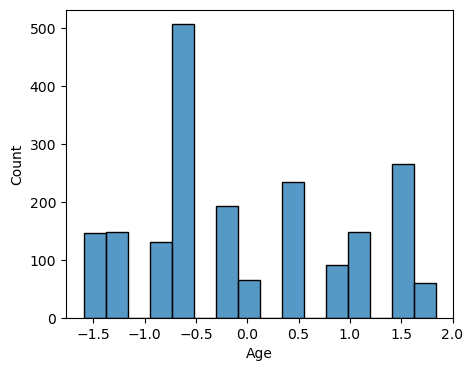

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df_drop['Age'])
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(df_drop[['AnnualIncome']])
df_drop['AnnualIncome'] = scaler.transform(df_drop[['AnnualIncome']])

In [ ]:
df_drop.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.463430,Government Sector,Yes,-1.414061,6,1,No,No,0
1,0.463430,Private Sector/Self Employed,Yes,0.842012,7,0,No,No,0
2,1.493446,Private Sector/Self Employed,Yes,-1.148641,4,1,No,No,1
3,-0.566587,Private Sector/Self Employed,Yes,-0.617800,3,1,No,No,0
4,-0.566587,Private Sector/Self Employed,Yes,-0.617800,8,1,Yes,No,0


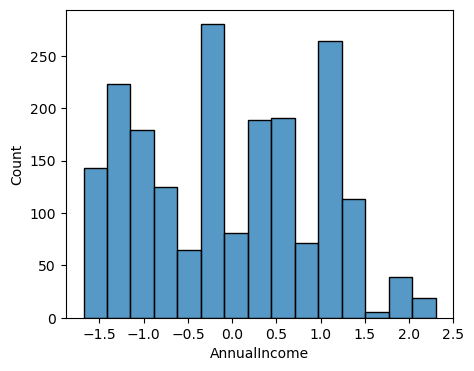

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df_drop['AnnualIncome'])
plt.show()

## Boxplot to detect outliers

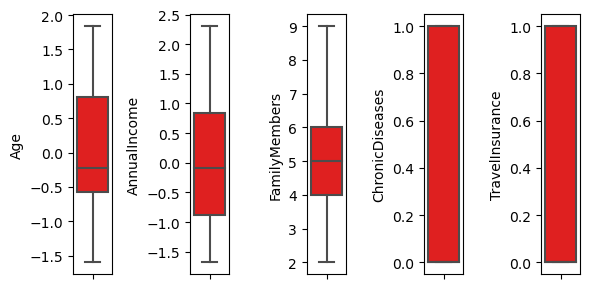

In [ ]:
plt.figure(figsize=(6,3))

features = num_col
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_drop[features[i]], color='red')
    plt.tight_layout()

Tidak ada outliers

## Balanced Data

In [ ]:
df_drop['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

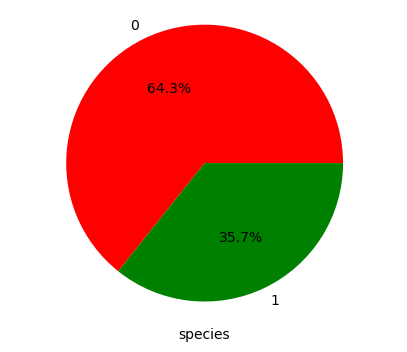

In [ ]:
target = df_drop['TravelInsurance'].value_counts(normalize=True)

plt.figure(figsize=(5,4))
species = target.index
count = target.values
colors= ['red','green']

plt.pie(count, labels=species,
        colors=colors, 
        autopct='%1.1f%%')
plt.xlabel('species')
plt.axis('equal')
plt.show()

**Observasi:**

- Sebanyak 64.3% menunjukkan pelanggan yang tidak membeli paket asuransi
- Sebanyak 35.7% menunjukkan pelanggan yang membeli paket asuransi

### Encoding Categorical Data

In [ ]:
for column in df_drop.columns:
    print(f"============= {column} =================")
    display(df_drop[column].value_counts())
    print()

============= Age =================


-0.566587    506
 1.493446    266
 0.463430    234
-0.223248    192
 1.150107    148
-1.253264    148
-1.596603    146
-0.909926    131
 0.806768     91
 0.120091     65
 1.836785     60
Name: Age, dtype: int64


============= Employment Type =================


Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64


============= GraduateOrNot =================


Yes    1692
No      295
Name: GraduateOrNot, dtype: int64


============= AnnualIncome =================


-0.352380    153
-1.148641    143
 1.240142    130
 0.709302    112
 0.443881    107
-0.883221     98
-0.617800     95
 0.974722     91
-1.679482     88
 1.505563     82
 0.311171     82
-1.015931     81
 0.576591     79
-0.086960     72
 0.842012     71
-0.485090     65
-1.414061     65
 0.178461     60
-1.546772     55
-0.219670     55
 1.107432     43
 2.036403     37
 1.372852     31
-0.750510     30
 0.045751     21
 2.169114     15
-1.281351     15
 1.638273      5
 2.301824      4
 1.903693      2
Name: AnnualIncome, dtype: int64


============= FamilyMembers =================


4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64


============= ChronicDiseases =================


0    1435
1     552
Name: ChronicDiseases, dtype: int64


============= FrequentFlyer =================


No     1570
Yes     417
Name: FrequentFlyer, dtype: int64


============= EverTravelledAbroad =================


No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


============= TravelInsurance =================


0    1277
1     710
Name: TravelInsurance, dtype: int64

1. One Hot Encoding (OHE) : `Employment Type`
2. Dictionary Encoding : `GraduateOrNot`, `FrequentFlyer`, `EverTravelledAbroad` 

In [ ]:
### Onehot Encoding
onehot_columns = ['Employment Type']
df_drop = pd.get_dummies(df_drop, columns = onehot_columns)

In [ ]:
### Encoding default, housing, and loan, and our target variable
yes_no_dict = {
    'Yes':1,
    'No':0
}

for colname in ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']:
    df_drop[colname] = df_drop[colname].map(yes_no_dict)

In [ ]:
df_drop.sample(5)

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed
1419,-0.909926,1,0.311171,5,0,0,0,0,1,0
716,-0.223248,1,0.443881,7,0,0,0,1,0,1
464,1.493446,1,1.505563,5,0,1,1,1,0,1
443,-1.596603,0,0.576591,6,0,0,0,1,0,1
924,0.463430,1,-1.414061,6,0,0,0,0,1,0


## Dataset Splitting

In [ ]:
train, test = train_test_split(df,test_size = 0.25, random_state = 1) 

In [ ]:
#create validasi data from data test
#data validasi diambil dari data unseen (data test) -> untuk tunning (randomsearch,gridsearch,optuna)

val, test = train_test_split(test,test_size = 0.5, random_state = 1)
val.shape, test.shape

((248, 10), (249, 10))

In [ ]:
#data train
x_train = train.loc[:, train.columns!='TravelInsurance']
y_train = train['TravelInsurance']

#data test
x_test = test.loc[:, test.columns!='TravelInsurance']
y_test = test['TravelInsurance']

#validasi
x_val = val.loc[:,val.columns!='TravelInsurance']
y_val = val['TravelInsurance']

In [ ]:
df_train, df_test = train_test_split(df_drop, 
                                     test_size = 0.25, random_state = 1) 

In [ ]:
df_val, df_test = train_test_split(df_test,test_size = 0.5, random_state = 1)
df_val.shape, df_test.shape

((248, 10), (249, 10))

In [ ]:
X_train_data = df_train.loc[:, df_train.columns!='TravelInsurance']
y_train_data = df_train['TravelInsurance']

X_test_data = df_test.loc[:, df_test.columns!='TravelInsurance']
y_test_data = df_test['TravelInsurance']

x_val_data = df_val.loc[:,df_val.columns!='TravelInsurance']
y_val_data = df_val['TravelInsurance']

In [ ]:
df_drop['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [ ]:
y_train.value_counts()

0    960
1    530
Name: TravelInsurance, dtype: int64

## Dealing With Imbalanced Data

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under))

Counter({0: 960, 1: 530})
Counter({0: 530, 1: 530})


## Evaluation Function

In [ ]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test_data, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'Tidak Membeli', 'Membeli'],va='center')
    plt.xticks([0.5,1.5], [ 'Tidak Membeli', 'Membeli'],va='center')
    plt.show()

In [ ]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [ ]:
def evaluate(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

## K-Nearest Neighbor

In [ ]:
def evaluate_model(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    return precision

In [ ]:
dictionary = {
    'n':[],
    'precision':[]
}
for n in [3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_under, y_train_under)
    precision = evaluate_model(knn)
    dictionary['n'].append(n)
    dictionary['precision'].append(precision)
    
df_prec = pd.DataFrame(dictionary)

In [ ]:
df_prec.sort_values(['precision'], ascending = False)

,n,precision
4,11,0.743750
5,13,0.742138
6,15,0.740506
3,9,0.730061
2,7,0.706587
1,5,0.680000
0,3,0.620690


In [ ]:
#Baseline
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train_under, y_train_under)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
evaluate(knn)

Accuracy: 0.7947686116700201
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       317
           1       0.74      0.66      0.70       180

    accuracy                           0.79       497
   macro avg       0.78      0.77      0.77       497
weighted avg       0.79      0.79      0.79       497

------
Assuming 1 as positive, we get:

True Positive: 119
True Negative: 276
False Positive: 41
False Negative: 61

Precision: 0.74375
Recall: 0.6611111111111111
F1-Score: 0.7


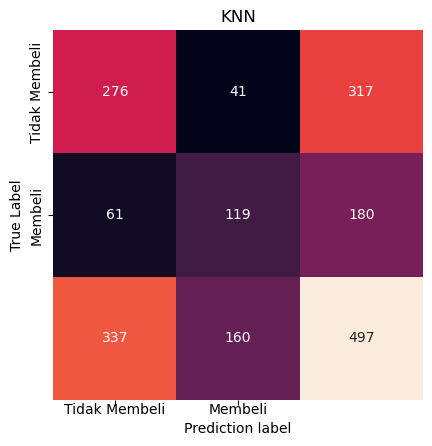

In [ ]:
model_evaluation(knn.predict(X_test_data),"KNN")

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_under, y_train_under)

LogisticRegression()

In [ ]:
evaluate(logreg)

Accuracy: 0.7464788732394366
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       317
           1       0.66      0.63      0.64       180

    accuracy                           0.75       497
   macro avg       0.73      0.72      0.72       497
weighted avg       0.74      0.75      0.75       497

------
Assuming 1 as positive, we get:

True Positive: 114
True Negative: 257
False Positive: 60
False Negative: 66

Precision: 0.6551724137931034
Recall: 0.6333333333333333
F1-Score: 0.6440677966101694


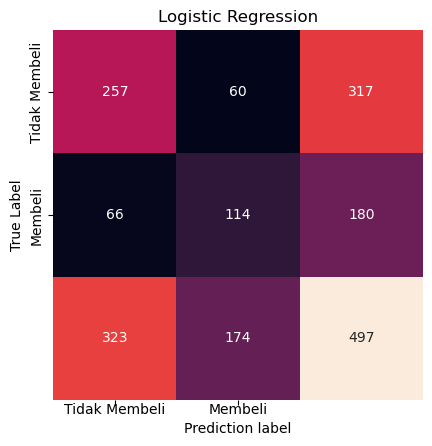

In [ ]:
model_evaluation(logreg.predict(X_test_data),"Logistic Regression")

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)
evaluate(dt)

Accuracy: 0.744466800804829
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       317
           1       0.64      0.68      0.66       180

    accuracy                           0.74       497
   macro avg       0.72      0.73      0.73       497
weighted avg       0.75      0.74      0.75       497

------
Assuming 1 as positive, we get:

True Positive: 123
True Negative: 247
False Positive: 70
False Negative: 57

Precision: 0.6373056994818653
Recall: 0.6833333333333333
F1-Score: 0.6595174262734586


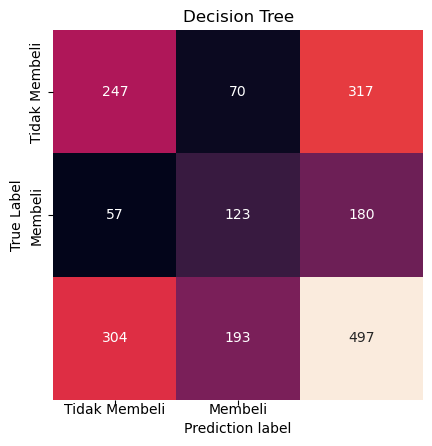

In [ ]:
model_evaluation(dt.predict(X_test_data),"Decision Tree")

## Random Forest

In [ ]:
def evaluate(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

In [ ]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(X_train_data, y_train_data)
evaluate(base_model)

Accuracy: 0.8048289738430584
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       317
           1       0.77      0.66      0.71       180

    accuracy                           0.80       497
   macro avg       0.80      0.77      0.78       497
weighted avg       0.80      0.80      0.80       497

------
Assuming 1 as positive, we get:

True Positive: 118
True Negative: 282
False Positive: 35
False Negative: 62

Precision: 0.7712418300653595
Recall: 0.6555555555555556
F1-Score: 0.7087087087087087


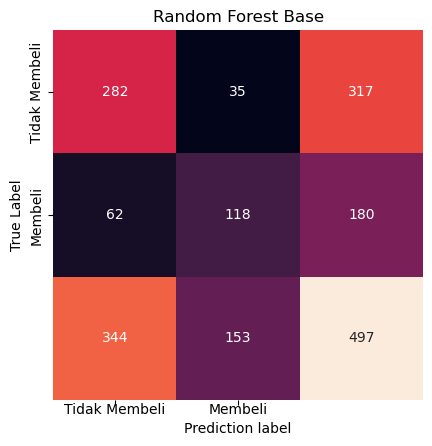

In [ ]:
model_evaluation(base_model.predict(X_test_data),"Random Forest Base")

## Undersampling

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under))

Counter({0: 960, 1: 530})
Counter({0: 530, 1: 530})


In [ ]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(X_train_under, y_train_under)
evaluate(under_model, X_test_data, y_test_data)

Accuracy: 0.7625754527162978
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       317
           1       0.66      0.70      0.68       180

    accuracy                           0.76       497
   macro avg       0.74      0.75      0.75       497
weighted avg       0.77      0.76      0.76       497

------
Assuming 1 as positive, we get:

True Positive: 126
True Negative: 253
False Positive: 64
False Negative: 54

Precision: 0.6631578947368421
Recall: 0.7
F1-Score: 0.681081081081081


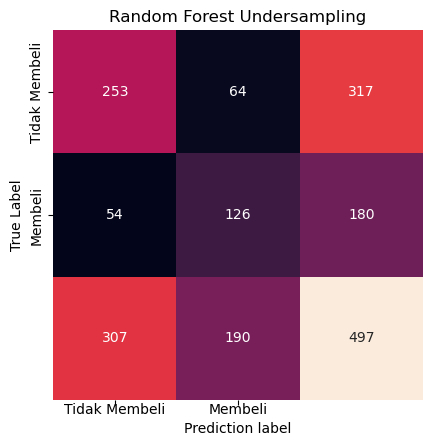

In [ ]:
model_evaluation(under_model.predict(X_test_data),"Random Forest Undersampling")

## Oversampling

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE))

Counter({0: 960, 1: 530})
Counter({0: 960, 1: 960})


In [ ]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, X_test_data, y_test_data)

Accuracy: 0.7766599597585513
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       317
           1       0.70      0.67      0.68       180

    accuracy                           0.78       497
   macro avg       0.76      0.75      0.76       497
weighted avg       0.77      0.78      0.78       497

------
Assuming 1 as positive, we get:

True Positive: 120
True Negative: 266
False Positive: 51
False Negative: 60

Precision: 0.7017543859649122
Recall: 0.6666666666666666
F1-Score: 0.6837606837606838


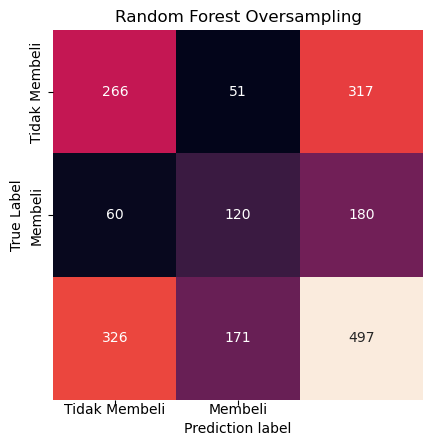

In [ ]:
model_evaluation(over_model.predict(X_test_data),"Random Forest Oversampling")

## Compare Oversampling and Undersampling

In [ ]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(X_train_data, y_train_data)
evaluate(pipeline, X_test_data, y_test_data)

Accuracy: 0.8169014084507042
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       317
           1       0.80      0.66      0.72       180

    accuracy                           0.82       497
   macro avg       0.81      0.78      0.79       497
weighted avg       0.82      0.82      0.81       497

------
Assuming 1 as positive, we get:

True Positive: 118
True Negative: 288
False Positive: 29
False Negative: 62

Precision: 0.8027210884353742
Recall: 0.6555555555555556
F1-Score: 0.7217125382262998


## Finding Best Coefficient of Oversampling and Undersampling

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore')

oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(X_train_data, y_train_data)
            y_pred = pipeline.predict(X_test_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test_data, y_pred))
            result['prec'].append(precision_score(y_test_data, y_pred))
            result['recall'].append(recall_score(y_test_data, y_pred))
            result['f1'].append(f1_score(y_test_data, y_pred))
        except:
            pass
        

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.47it/s]


In [ ]:
df_result = pd.DataFrame(result)
df_result.sort_values(['prec'], ascending=False)

,over_coef,under_coef,acc,prec,recall,f1
0,0.6,0.6,0.804829,0.774834,0.650000,0.706949
5,0.7,0.7,0.794769,0.740741,0.666667,0.701754
1,0.6,0.7,0.790744,0.740506,0.650000,0.692308
9,0.8,0.8,0.784708,0.729560,0.644444,0.684366
12,0.9,0.9,0.786720,0.728395,0.655556,0.690058
6,0.7,0.8,0.784708,0.713450,0.677778,0.695157
14,1.0,1.0,0.784708,0.713450,0.677778,0.695157
10,0.8,0.9,0.780684,0.705202,0.677778,0.691218
11,0.8,1.0,0.776660,0.699422,0.672222,0.685552
7,0.7,0.9,0.778672,0.698864,0.683333,0.691011


In [ ]:
# define undersample strategy with ratio 0,6
under_06 = RandomUnderSampler(sampling_strategy=0.6)

# fit and apply the transform
X_train_under_06, y_train_under_06 = under_06.fit_resample(X_train_data, 
                                                        y_train_data)

In [ ]:
# define undersample strategy
SMOTE_06 = SMOTE(sampling_strategy = 0.6)

# fit and apply the transform
x_train_SMOTE06, y_train_SMOTE06 = SMOTE_06.fit_resample(X_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE))

Counter({0: 960, 1: 960})


## Tunning Optuna
### Sampling Strategi (0,6) RandomUnderSampler for Optuna

In [ ]:
from time import time

import optuna
from optuna.samplers import TPESampler
from optuna.visualization.matplotlib import plot_param_importances

In [ ]:
#Optuna tunning
def objective(trial):
    start = time()
    #Parameter Random Forest
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
    }

    # Fit the model
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(x_val_data, y_val_data)
    #prediction
    y_pred = rf_model.predict(X_test_data)
    presisi = precision_score(y_test_data,y_pred)
    
    end=time()
    print ('Time needed (at work) in minutes: {0}'.format((end-start)/60))
    
    return presisi


In [ ]:
study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=500) # timeout in second
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-01-05 20:21:35,644] A new study created in memory with name: no-name-36aae6d2-d7ec-4f41-9bdd-87e5fab1d969
[I 2023-01-05 20:21:36,501] Trial 0 finished with value: 0.875 and parameters: {'n_estimators': 373, 'max_depth': 42, 'min_samples_split': 48, 'min_samples_leaf': 31}. Best is trial 0 with value: 0.875.


Time needed (at work) in minutes: 0.014223122596740722


[I 2023-01-05 20:21:37,825] Trial 1 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 511, 'max_depth': 39, 'min_samples_split': 15, 'min_samples_leaf': 24}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.022033150990804037


[I 2023-01-05 20:21:40,003] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 861, 'max_depth': 24, 'min_samples_split': 147, 'min_samples_leaf': 53}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03623359203338623


[I 2023-01-05 20:21:40,587] Trial 3 finished with value: 0.7818181818181819 and parameters: {'n_estimators': 258, 'max_depth': 11, 'min_samples_split': 99, 'min_samples_leaf': 41}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.00968855619430542


[I 2023-01-05 20:21:41,619] Trial 4 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 415, 'max_depth': 29, 'min_samples_split': 66, 'min_samples_leaf': 15}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.01716132164001465


[I 2023-01-05 20:21:43,492] Trial 5 finished with value: 0.0 and parameters: {'n_estimators': 791, 'max_depth': 35, 'min_samples_split': 66, 'min_samples_leaf': 57}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.031178935368855795


[I 2023-01-05 20:21:45,857] Trial 6 finished with value: 0.0 and parameters: {'n_estimators': 905, 'max_depth': 50, 'min_samples_split': 80, 'min_samples_leaf': 57}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.039341747760772705


[I 2023-01-05 20:21:47,926] Trial 7 finished with value: 0.0 and parameters: {'n_estimators': 815, 'max_depth': 5, 'min_samples_split': 124, 'min_samples_leaf': 51}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03444048563639323


[I 2023-01-05 20:21:48,372] Trial 8 finished with value: 0.0 and parameters: {'n_estimators': 183, 'max_depth': 9, 'min_samples_split': 116, 'min_samples_leaf': 60}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.007352940241495768


[I 2023-01-05 20:21:50,022] Trial 9 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 705, 'max_depth': 32, 'min_samples_split': 38, 'min_samples_leaf': 33}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.027464882532755534


[I 2023-01-05 20:21:51,835] Trial 10 finished with value: 0.896551724137931 and parameters: {'n_estimators': 629, 'max_depth': 19, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.030169912179311118


[I 2023-01-05 20:21:53,421] Trial 11 finished with value: 0.9047619047619048 and parameters: {'n_estimators': 570, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.026408020655314127


[I 2023-01-05 20:21:54,747] Trial 12 finished with value: 0.8545454545454545 and parameters: {'n_estimators': 530, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 15}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.02205161253611247


[I 2023-01-05 20:21:56,511] Trial 13 finished with value: 0.7307692307692307 and parameters: {'n_estimators': 547, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.029360445340474446


[I 2023-01-05 20:21:57,702] Trial 14 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 378, 'max_depth': 45, 'min_samples_split': 25, 'min_samples_leaf': 16}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.01980201800664266


[I 2023-01-05 20:21:59,487] Trial 15 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 659, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 22}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.029724387327829997


[I 2023-01-05 20:22:02,107] Trial 16 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 990, 'max_depth': 14, 'min_samples_split': 43, 'min_samples_leaf': 24}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.04361017942428589


[I 2023-01-05 20:22:04,466] Trial 17 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 973, 'max_depth': 26, 'min_samples_split': 47, 'min_samples_leaf': 23}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.039243189493815105


[I 2023-01-05 20:22:05,703] Trial 18 finished with value: 0.7761194029850746 and parameters: {'n_estimators': 459, 'max_depth': 26, 'min_samples_split': 54, 'min_samples_leaf': 41}. Best is trial 1 with value: 0.9215686274509803.
[I 2023-01-05 20:22:05,907] Trial 19 finished with value: 0.8095238095238095 and parameters: {'n_estimators': 77, 'max_depth': 35, 'min_samples_split': 82, 'min_samples_leaf': 38}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.020597573121388754
Time needed (at work) in minutes: 0.0033761739730834963


[I 2023-01-05 20:22:07,792] Trial 20 finished with value: 0.9038461538461539 and parameters: {'n_estimators': 741, 'max_depth': 38, 'min_samples_split': 32, 'min_samples_leaf': 24}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.031356537342071535


[I 2023-01-05 20:22:10,048] Trial 21 finished with value: 0.8867924528301887 and parameters: {'n_estimators': 980, 'max_depth': 13, 'min_samples_split': 47, 'min_samples_leaf': 24}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03753543694814046


[I 2023-01-05 20:22:12,324] Trial 22 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 975, 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03790952364603679


[I 2023-01-05 20:22:14,443] Trial 23 finished with value: 0.8596491228070176 and parameters: {'n_estimators': 941, 'max_depth': 23, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03527201811472575


[I 2023-01-05 20:22:16,407] Trial 24 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 875, 'max_depth': 30, 'min_samples_split': 41, 'min_samples_leaf': 27}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03264867464701335


[I 2023-01-05 20:22:19,024] Trial 25 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 875, 'max_depth': 31, 'min_samples_split': 12, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.043577094872792564


[I 2023-01-05 20:22:21,497] Trial 26 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 752, 'max_depth': 26, 'min_samples_split': 60, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.04115324417750041


[I 2023-01-05 20:22:23,292] Trial 27 finished with value: 0.819672131147541 and parameters: {'n_estimators': 637, 'max_depth': 45, 'min_samples_split': 33, 'min_samples_leaf': 35}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.02988051970799764


[I 2023-01-05 20:22:24,898] Trial 28 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 666, 'max_depth': 16, 'min_samples_split': 27, 'min_samples_leaf': 28}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.026707839965820313


[I 2023-01-05 20:22:26,225] Trial 29 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 474, 'max_depth': 40, 'min_samples_split': 32, 'min_samples_leaf': 28}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.022086632251739503


[I 2023-01-05 20:22:26,924] Trial 30 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 284, 'max_depth': 42, 'min_samples_split': 37, 'min_samples_leaf': 29}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.011532449722290039


[I 2023-01-05 20:22:28,466] Trial 31 finished with value: 0.8867924528301887 and parameters: {'n_estimators': 624, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.025655996799468995


[I 2023-01-05 20:22:29,534] Trial 32 finished with value: 0.9038461538461539 and parameters: {'n_estimators': 461, 'max_depth': 48, 'min_samples_split': 27, 'min_samples_leaf': 30}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.017766904830932618


[I 2023-01-05 20:22:30,228] Trial 33 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 306, 'max_depth': 40, 'min_samples_split': 41, 'min_samples_leaf': 34}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.011519583066304524


[I 2023-01-05 20:22:31,118] Trial 34 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 303, 'max_depth': 43, 'min_samples_split': 56, 'min_samples_leaf': 47}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.014798458417256672


[I 2023-01-05 20:22:31,769] Trial 35 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 207, 'max_depth': 34, 'min_samples_split': 10, 'min_samples_leaf': 30}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.010811825593312582


[I 2023-01-05 20:22:33,116] Trial 36 finished with value: 0.8225806451612904 and parameters: {'n_estimators': 455, 'max_depth': 42, 'min_samples_split': 73, 'min_samples_leaf': 39}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.02239025036493937


[I 2023-01-05 20:22:35,246] Trial 37 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 828, 'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03544661204020182


[I 2023-01-05 20:22:36,294] Trial 38 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 342, 'max_depth': 37, 'min_samples_split': 92, 'min_samples_leaf': 27}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.017429057757059732


[I 2023-01-05 20:22:38,309] Trial 39 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 941, 'max_depth': 23, 'min_samples_split': 96, 'min_samples_leaf': 22}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.033543495337168376


[I 2023-01-05 20:22:39,105] Trial 40 finished with value: 0.8392857142857143 and parameters: {'n_estimators': 360, 'max_depth': 22, 'min_samples_split': 96, 'min_samples_leaf': 19}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.01323239008585612


[I 2023-01-05 20:22:41,273] Trial 41 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 878, 'max_depth': 17, 'min_samples_split': 110, 'min_samples_leaf': 21}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03605314095815023


[I 2023-01-05 20:22:41,874] Trial 42 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 179, 'max_depth': 38, 'min_samples_split': 112, 'min_samples_leaf': 26}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.009993966420491536


[I 2023-01-05 20:22:44,255] Trial 43 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 936, 'max_depth': 8, 'min_samples_split': 120, 'min_samples_leaf': 21}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.03962323665618896


[I 2023-01-05 20:22:46,664] Trial 44 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 997, 'max_depth': 9, 'min_samples_split': 127, 'min_samples_leaf': 16}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.04010913769404093


[I 2023-01-05 20:22:47,031] Trial 45 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 134, 'max_depth': 21, 'min_samples_split': 106, 'min_samples_leaf': 25}. Best is trial 1 with value: 0.9215686274509803.


Time needed (at work) in minutes: 0.00606993834177653


[I 2023-01-05 20:22:49,082] Trial 46 finished with value: 0.94 and parameters: {'n_estimators': 912, 'max_depth': 6, 'min_samples_split': 139, 'min_samples_leaf': 11}. Best is trial 46 with value: 0.94.


Time needed (at work) in minutes: 0.03414684534072876


[I 2023-01-05 20:22:50,980] Trial 47 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 833, 'max_depth': 4, 'min_samples_split': 143, 'min_samples_leaf': 32}. Best is trial 46 with value: 0.94.


Time needed (at work) in minutes: 0.03158454100290934


[I 2023-01-05 20:22:52,870] Trial 48 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 817, 'max_depth': 6, 'min_samples_split': 140, 'min_samples_leaf': 6}. Best is trial 46 with value: 0.94.


Time needed (at work) in minutes: 0.03142623901367188


[I 2023-01-05 20:22:54,747] Trial 49 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 782, 'max_depth': 4, 'min_samples_split': 137, 'min_samples_leaf': 13}. Best is trial 46 with value: 0.94.


Time needed (at work) in minutes: 0.03124788204828898


[I 2023-01-05 20:22:57,032] Trial 50 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 906, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 50 with value: 0.9411764705882353.


Time needed (at work) in minutes: 0.038060871760050456


[I 2023-01-05 20:22:59,284] Trial 51 finished with value: 1.0 and parameters: {'n_estimators': 773, 'max_depth': 4, 'min_samples_split': 147, 'min_samples_leaf': 46}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.037474846839904784


[I 2023-01-05 20:23:01,231] Trial 52 finished with value: 0.0 and parameters: {'n_estimators': 902, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 52}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03237382968266805


[I 2023-01-05 20:23:02,745] Trial 53 finished with value: 0.0 and parameters: {'n_estimators': 701, 'max_depth': 7, 'min_samples_split': 140, 'min_samples_leaf': 48}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02520871957143148


[I 2023-01-05 20:23:04,223] Trial 54 finished with value: 0.875 and parameters: {'n_estimators': 688, 'max_depth': 10, 'min_samples_split': 130, 'min_samples_leaf': 45}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.024576743443806965


[I 2023-01-05 20:23:06,065] Trial 55 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 853, 'max_depth': 5, 'min_samples_split': 145, 'min_samples_leaf': 36}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030680398146311443


[I 2023-01-05 20:23:08,028] Trial 56 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 913, 'max_depth': 7, 'min_samples_split': 132, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03266043265660604


[I 2023-01-05 20:23:09,720] Trial 57 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 779, 'max_depth': 12, 'min_samples_split': 135, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028149175643920898


[I 2023-01-05 20:23:11,411] Trial 58 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 782, 'max_depth': 12, 'min_samples_split': 137, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028133126099904378


[I 2023-01-05 20:23:13,077] Trial 59 finished with value: 0.0 and parameters: {'n_estimators': 769, 'max_depth': 12, 'min_samples_split': 133, 'min_samples_leaf': 55}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02773366371790568


[I 2023-01-05 20:23:14,671] Trial 60 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 731, 'max_depth': 7, 'min_samples_split': 123, 'min_samples_leaf': 41}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026526904106140135


[I 2023-01-05 20:23:16,496] Trial 61 finished with value: 0.96 and parameters: {'n_estimators': 841, 'max_depth': 4, 'min_samples_split': 145, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030358036359151203


[I 2023-01-05 20:23:18,428] Trial 62 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 900, 'max_depth': 9, 'min_samples_split': 150, 'min_samples_leaf': 37}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03215428988138835


[I 2023-01-05 20:23:20,393] Trial 63 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 805, 'max_depth': 4, 'min_samples_split': 145, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03269115686416626


[I 2023-01-05 20:23:22,154] Trial 64 finished with value: 0.8771929824561403 and parameters: {'n_estimators': 783, 'max_depth': 12, 'min_samples_split': 136, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029279625415802


[I 2023-01-05 20:23:23,435] Trial 65 finished with value: 0.875 and parameters: {'n_estimators': 590, 'max_depth': 5, 'min_samples_split': 142, 'min_samples_leaf': 43}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.021306363741556804


[I 2023-01-05 20:23:25,219] Trial 66 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 821, 'max_depth': 4, 'min_samples_split': 145, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029685644308725993


[I 2023-01-05 20:23:26,971] Trial 67 finished with value: 0.8518518518518519 and parameters: {'n_estimators': 807, 'max_depth': 4, 'min_samples_split': 148, 'min_samples_leaf': 39}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029137492179870605


[I 2023-01-05 20:23:28,785] Trial 68 finished with value: 0.8809523809523809 and parameters: {'n_estimators': 856, 'max_depth': 6, 'min_samples_split': 127, 'min_samples_leaf': 36}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030203413963317872


[I 2023-01-05 20:23:30,392] Trial 69 finished with value: 0.94 and parameters: {'n_estimators': 736, 'max_depth': 10, 'min_samples_split': 146, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02674222787221273


[I 2023-01-05 20:23:31,938] Trial 70 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 728, 'max_depth': 10, 'min_samples_split': 144, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025725702444712322


[I 2023-01-05 20:23:33,735] Trial 71 finished with value: 0.8846153846153846 and parameters: {'n_estimators': 847, 'max_depth': 8, 'min_samples_split': 146, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02990932861963908


[I 2023-01-05 20:23:35,465] Trial 72 finished with value: 0.0 and parameters: {'n_estimators': 806, 'max_depth': 6, 'min_samples_split': 139, 'min_samples_leaf': 50}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028769747416178385


[I 2023-01-05 20:23:37,072] Trial 73 finished with value: 0.9583333333333334 and parameters: {'n_estimators': 751, 'max_depth': 14, 'min_samples_split': 150, 'min_samples_leaf': 4}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02675680716832479


[I 2023-01-05 20:23:38,702] Trial 74 finished with value: 0.94 and parameters: {'n_estimators': 754, 'max_depth': 18, 'min_samples_split': 147, 'min_samples_leaf': 4}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027135225137074788


[I 2023-01-05 20:23:40,691] Trial 75 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 934, 'max_depth': 14, 'min_samples_split': 130, 'min_samples_leaf': 7}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03311118682225545


[I 2023-01-05 20:23:42,222] Trial 76 finished with value: 0.0 and parameters: {'n_estimators': 716, 'max_depth': 8, 'min_samples_split': 150, 'min_samples_leaf': 58}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025486854712168376


[I 2023-01-05 20:23:43,835] Trial 77 finished with value: 0.94 and parameters: {'n_estimators': 755, 'max_depth': 18, 'min_samples_split': 142, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026811675230662028


[I 2023-01-05 20:23:45,922] Trial 78 finished with value: 0.94 and parameters: {'n_estimators': 963, 'max_depth': 4, 'min_samples_split': 137, 'min_samples_leaf': 3}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03473990360895793


[I 2023-01-05 20:23:47,367] Trial 79 finished with value: 0.875 and parameters: {'n_estimators': 671, 'max_depth': 14, 'min_samples_split': 121, 'min_samples_leaf': 43}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.024049011866251628


[I 2023-01-05 20:23:49,233] Trial 80 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 876, 'max_depth': 4, 'min_samples_split': 126, 'min_samples_leaf': 1}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.031068114439646403


[I 2023-01-05 20:23:51,306] Trial 81 finished with value: 0.94 and parameters: {'n_estimators': 965, 'max_depth': 15, 'min_samples_split': 142, 'min_samples_leaf': 8}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03449788093566895


[I 2023-01-05 20:23:53,063] Trial 82 finished with value: 0.94 and parameters: {'n_estimators': 820, 'max_depth': 10, 'min_samples_split': 144, 'min_samples_leaf': 8}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02923417886098226


[I 2023-01-05 20:23:54,755] Trial 83 finished with value: 0.94 and parameters: {'n_estimators': 800, 'max_depth': 16, 'min_samples_split': 133, 'min_samples_leaf': 9}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028157711029052734


[I 2023-01-05 20:23:56,474] Trial 84 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 796, 'max_depth': 16, 'min_samples_split': 134, 'min_samples_leaf': 5}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02858703931172689


[I 2023-01-05 20:23:58,424] Trial 85 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 911, 'max_depth': 6, 'min_samples_split': 146, 'min_samples_leaf': 11}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03244892358779907


[I 2023-01-05 20:24:00,214] Trial 86 finished with value: 0.94 and parameters: {'n_estimators': 837, 'max_depth': 13, 'min_samples_split': 147, 'min_samples_leaf': 4}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02978199323018392


[I 2023-01-05 20:24:02,148] Trial 87 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 908, 'max_depth': 6, 'min_samples_split': 139, 'min_samples_leaf': 14}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03216831684112549


[I 2023-01-05 20:24:04,015] Trial 88 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 869, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 38}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03107138474782308


[I 2023-01-05 20:24:05,912] Trial 89 finished with value: 0.94 and parameters: {'n_estimators': 886, 'max_depth': 19, 'min_samples_split': 130, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03159998655319214


[I 2023-01-05 20:24:07,888] Trial 90 finished with value: 0.94 and parameters: {'n_estimators': 924, 'max_depth': 5, 'min_samples_split': 138, 'min_samples_leaf': 12}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03288264274597168


[I 2023-01-05 20:24:09,798] Trial 91 finished with value: 0.94 and parameters: {'n_estimators': 887, 'max_depth': 7, 'min_samples_split': 130, 'min_samples_leaf': 18}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03176971673965454


[I 2023-01-05 20:24:11,809] Trial 92 finished with value: 0.8771929824561403 and parameters: {'n_estimators': 933, 'max_depth': 5, 'min_samples_split': 140, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03348021507263184


[I 2023-01-05 20:24:13,431] Trial 93 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 748, 'max_depth': 9, 'min_samples_split': 144, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026998424530029298


[I 2023-01-05 20:24:15,350] Trial 94 finished with value: 0.94 and parameters: {'n_estimators': 849, 'max_depth': 8, 'min_samples_split': 147, 'min_samples_leaf': 11}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.031938620408376056


[I 2023-01-05 20:24:17,143] Trial 95 finished with value: 0.94 and parameters: {'n_estimators': 847, 'max_depth': 8, 'min_samples_split': 147, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02982784112294515


[I 2023-01-05 20:24:18,824] Trial 96 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 767, 'max_depth': 11, 'min_samples_split': 146, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027959569295247396


[I 2023-01-05 20:24:20,914] Trial 97 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 952, 'max_depth': 4, 'min_samples_split': 135, 'min_samples_leaf': 3}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03479280471801758


[I 2023-01-05 20:24:22,738] Trial 98 finished with value: 0.8936170212765957 and parameters: {'n_estimators': 832, 'max_depth': 13, 'min_samples_split': 150, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03034077485402425


[I 2023-01-05 20:24:24,522] Trial 99 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 818, 'max_depth': 5, 'min_samples_split': 117, 'min_samples_leaf': 6}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02971956729888916


[I 2023-01-05 20:24:26,053] Trial 100 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 640, 'max_depth': 6, 'min_samples_split': 142, 'min_samples_leaf': 16}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025467880566914878


[I 2023-01-05 20:24:27,560] Trial 101 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 693, 'max_depth': 19, 'min_samples_split': 142, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025064289569854736


[I 2023-01-05 20:24:29,181] Trial 102 finished with value: 0.94 and parameters: {'n_estimators': 760, 'max_depth': 7, 'min_samples_split': 141, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026980284849802652


[I 2023-01-05 20:24:30,775] Trial 103 finished with value: 0.9574468085106383 and parameters: {'n_estimators': 736, 'max_depth': 17, 'min_samples_split': 145, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026496577262878417


[I 2023-01-05 20:24:32,547] Trial 104 finished with value: 0.8909090909090909 and parameters: {'n_estimators': 824, 'max_depth': 9, 'min_samples_split': 144, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029487331708272297


[I 2023-01-05 20:24:34,101] Trial 105 finished with value: 0.94 and parameters: {'n_estimators': 722, 'max_depth': 17, 'min_samples_split': 137, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02586194674173991


[I 2023-01-05 20:24:35,659] Trial 106 finished with value: 0.819672131147541 and parameters: {'n_estimators': 719, 'max_depth': 17, 'min_samples_split': 83, 'min_samples_leaf': 36}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025937592983245848


[I 2023-01-05 20:24:37,567] Trial 107 finished with value: 0.8461538461538461 and parameters: {'n_estimators': 897, 'max_depth': 15, 'min_samples_split': 129, 'min_samples_leaf': 40}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.031760108470916745


[I 2023-01-05 20:24:39,387] Trial 108 finished with value: 0.94 and parameters: {'n_estimators': 856, 'max_depth': 8, 'min_samples_split': 148, 'min_samples_leaf': 13}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030275901158650715


[I 2023-01-05 20:24:41,092] Trial 109 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 783, 'max_depth': 10, 'min_samples_split': 146, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02837867339452108


[I 2023-01-05 20:24:43,076] Trial 110 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 915, 'max_depth': 5, 'min_samples_split': 138, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.033016645908355714


[I 2023-01-05 20:24:44,832] Trial 111 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 808, 'max_depth': 13, 'min_samples_split': 133, 'min_samples_leaf': 2}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029225810368855795


[I 2023-01-05 20:24:46,755] Trial 112 finished with value: 0.8823529411764706 and parameters: {'n_estimators': 887, 'max_depth': 21, 'min_samples_split': 150, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03199676672617594


[I 2023-01-05 20:24:48,335] Trial 113 finished with value: 0.94 and parameters: {'n_estimators': 737, 'max_depth': 28, 'min_samples_split': 145, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02629660367965698


[I 2023-01-05 20:24:49,923] Trial 114 finished with value: 0.94 and parameters: {'n_estimators': 740, 'max_depth': 28, 'min_samples_split': 145, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02642731269200643


[I 2023-01-05 20:24:51,394] Trial 115 finished with value: 0.94 and parameters: {'n_estimators': 678, 'max_depth': 25, 'min_samples_split': 145, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02446825901667277


[I 2023-01-05 20:24:52,880] Trial 116 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 695, 'max_depth': 27, 'min_samples_split': 144, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.024717470010121662


[I 2023-01-05 20:24:55,038] Trial 117 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 979, 'max_depth': 6, 'min_samples_split': 138, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03593183358510335


[I 2023-01-05 20:24:57,166] Trial 118 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 986, 'max_depth': 4, 'min_samples_split': 141, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0353993018468221


[I 2023-01-05 20:24:59,255] Trial 119 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 980, 'max_depth': 6, 'min_samples_split': 141, 'min_samples_leaf': 37}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0347586194674174


[I 2023-01-05 20:25:01,363] Trial 120 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 979, 'max_depth': 4, 'min_samples_split': 136, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03509467442830404


[I 2023-01-05 20:25:03,459] Trial 121 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 991, 'max_depth': 4, 'min_samples_split': 135, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.034887548287709555


[I 2023-01-05 20:25:05,535] Trial 122 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 956, 'max_depth': 4, 'min_samples_split': 124, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.034556007385253905


[I 2023-01-05 20:25:07,643] Trial 123 finished with value: 0.8909090909090909 and parameters: {'n_estimators': 986, 'max_depth': 6, 'min_samples_split': 137, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03508275349934896


[I 2023-01-05 20:25:09,648] Trial 124 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 945, 'max_depth': 7, 'min_samples_split': 140, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0333755095799764


[I 2023-01-05 20:25:10,779] Trial 125 finished with value: 0.8913043478260869 and parameters: {'n_estimators': 510, 'max_depth': 5, 'min_samples_split': 150, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.018793920675913494


[I 2023-01-05 20:25:12,862] Trial 126 finished with value: 0.94 and parameters: {'n_estimators': 976, 'max_depth': 5, 'min_samples_split': 133, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0346659779548645


[I 2023-01-05 20:25:14,149] Trial 127 finished with value: 0.8421052631578947 and parameters: {'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 143, 'min_samples_leaf': 37}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.021398921807607014


[I 2023-01-05 20:25:16,114] Trial 128 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 788, 'max_depth': 34, 'min_samples_split': 68, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032713202635447185


[I 2023-01-05 20:25:18,231] Trial 129 finished with value: 0.8909090909090909 and parameters: {'n_estimators': 994, 'max_depth': 9, 'min_samples_split': 136, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03524301052093506


[I 2023-01-05 20:25:20,388] Trial 130 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 958, 'max_depth': 7, 'min_samples_split': 139, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03590828975041707


[I 2023-01-05 20:25:21,913] Trial 131 finished with value: 0.0 and parameters: {'n_estimators': 705, 'max_depth': 32, 'min_samples_split': 147, 'min_samples_leaf': 54}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025374007225036622


[I 2023-01-05 20:25:23,881] Trial 132 finished with value: 0.9361702127659575 and parameters: {'n_estimators': 858, 'max_depth': 8, 'min_samples_split': 148, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032720800240834555


[I 2023-01-05 20:25:25,778] Trial 133 finished with value: 0.94 and parameters: {'n_estimators': 801, 'max_depth': 14, 'min_samples_split': 131, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.031591304143269855


[I 2023-01-05 20:25:27,740] Trial 134 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 921, 'max_depth': 12, 'min_samples_split': 142, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032660873730977376


[I 2023-01-05 20:25:29,714] Trial 135 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 924, 'max_depth': 6, 'min_samples_split': 142, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0328695813814799


[I 2023-01-05 20:25:31,701] Trial 136 finished with value: 0.8771929824561403 and parameters: {'n_estimators': 925, 'max_depth': 12, 'min_samples_split': 142, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.033063638210296634


[I 2023-01-05 20:25:33,841] Trial 137 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 143, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03563579320907593


[I 2023-01-05 20:25:35,775] Trial 138 finished with value: 0.94 and parameters: {'n_estimators': 874, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032187839349110924


[I 2023-01-05 20:25:37,758] Trial 139 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 905, 'max_depth': 4, 'min_samples_split': 102, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03301060199737549


[I 2023-01-05 20:25:39,783] Trial 140 finished with value: 0.94 and parameters: {'n_estimators': 951, 'max_depth': 5, 'min_samples_split': 139, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03368697166442871


[I 2023-01-05 20:25:41,758] Trial 141 finished with value: 0.8928571428571429 and parameters: {'n_estimators': 927, 'max_depth': 7, 'min_samples_split': 144, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032877703507741295


[I 2023-01-05 20:25:43,405] Trial 142 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 771, 'max_depth': 4, 'min_samples_split': 136, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027413423856099448


[I 2023-01-05 20:25:45,058] Trial 143 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 765, 'max_depth': 4, 'min_samples_split': 137, 'min_samples_leaf': 36}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027508238951365154


[I 2023-01-05 20:25:46,492] Trial 144 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 651, 'max_depth': 5, 'min_samples_split': 128, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02387419541676839


[I 2023-01-05 20:25:48,626] Trial 145 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 963, 'max_depth': 6, 'min_samples_split': 141, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03551789919535319


[I 2023-01-05 20:25:50,325] Trial 146 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 773, 'max_depth': 4, 'min_samples_split': 135, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028265484174092612


[I 2023-01-05 20:25:52,144] Trial 147 finished with value: 0.8222222222222222 and parameters: {'n_estimators': 829, 'max_depth': 6, 'min_samples_split': 147, 'min_samples_leaf': 38}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03028605381647746


[I 2023-01-05 20:25:53,091] Trial 148 finished with value: 0.94 and parameters: {'n_estimators': 419, 'max_depth': 12, 'min_samples_split': 148, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015754679838816326


[I 2023-01-05 20:25:54,691] Trial 149 finished with value: 0.0 and parameters: {'n_estimators': 749, 'max_depth': 9, 'min_samples_split': 143, 'min_samples_leaf': 48}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026630047957102457


[I 2023-01-05 20:25:56,403] Trial 150 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 791, 'max_depth': 15, 'min_samples_split': 150, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028469272454579673


[I 2023-01-05 20:25:58,475] Trial 151 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 942, 'max_depth': 7, 'min_samples_split': 140, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.034476677576700844


[I 2023-01-05 20:26:00,519] Trial 152 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 939, 'max_depth': 7, 'min_samples_split': 139, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.034025609493255615


[I 2023-01-05 20:26:02,640] Trial 153 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 976, 'max_depth': 7, 'min_samples_split': 132, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03530952533086141


[I 2023-01-05 20:26:04,663] Trial 154 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 938, 'max_depth': 10, 'min_samples_split': 140, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.033662617206573486


[I 2023-01-05 20:26:06,625] Trial 155 finished with value: 0.8222222222222222 and parameters: {'n_estimators': 909, 'max_depth': 5, 'min_samples_split': 145, 'min_samples_leaf': 36}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03266796271006266


[I 2023-01-05 20:26:08,553] Trial 156 finished with value: 0.94 and parameters: {'n_estimators': 891, 'max_depth': 8, 'min_samples_split': 143, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032088613510131835


[I 2023-01-05 20:26:10,625] Trial 157 finished with value: 0.0 and parameters: {'n_estimators': 946, 'max_depth': 6, 'min_samples_split': 137, 'min_samples_leaf': 60}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03448605934778849


[I 2023-01-05 20:26:12,582] Trial 158 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 919, 'max_depth': 11, 'min_samples_split': 140, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0325752854347229


[I 2023-01-05 20:26:14,562] Trial 159 finished with value: 0.94 and parameters: {'n_estimators': 914, 'max_depth': 13, 'min_samples_split': 146, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032974926630655925


[I 2023-01-05 20:26:16,431] Trial 160 finished with value: 0.9210526315789473 and parameters: {'n_estimators': 879, 'max_depth': 4, 'min_samples_split': 148, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.031066850821177164


[I 2023-01-05 20:26:18,066] Trial 161 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 767, 'max_depth': 4, 'min_samples_split': 139, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027226972579956054


[I 2023-01-05 20:26:19,804] Trial 162 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 812, 'max_depth': 5, 'min_samples_split': 135, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028912262121836344


[I 2023-01-05 20:26:21,605] Trial 163 finished with value: 0.8809523809523809 and parameters: {'n_estimators': 845, 'max_depth': 5, 'min_samples_split': 142, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029982936382293702


[I 2023-01-05 20:26:23,670] Trial 164 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 964, 'max_depth': 6, 'min_samples_split': 145, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03436972300211589


[I 2023-01-05 20:26:25,863] Trial 165 finished with value: 0.94 and parameters: {'n_estimators': 967, 'max_depth': 7, 'min_samples_split': 145, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03648672103881836


[I 2023-01-05 20:26:27,930] Trial 166 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 932, 'max_depth': 9, 'min_samples_split': 139, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03440308173497518


[I 2023-01-05 20:26:29,496] Trial 167 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 717, 'max_depth': 10, 'min_samples_split': 134, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02605836788813273


[I 2023-01-05 20:26:31,578] Trial 168 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 978, 'max_depth': 12, 'min_samples_split': 150, 'min_samples_leaf': 44}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03464066584904989


[I 2023-01-05 20:26:33,435] Trial 169 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 871, 'max_depth': 8, 'min_samples_split': 142, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030909967422485352


[I 2023-01-05 20:26:35,578] Trial 170 finished with value: 0.8771929824561403 and parameters: {'n_estimators': 998, 'max_depth': 7, 'min_samples_split': 86, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03566137154897054


[I 2023-01-05 20:26:37,719] Trial 171 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 946, 'max_depth': 4, 'min_samples_split': 137, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03565542300542195


[I 2023-01-05 20:26:39,407] Trial 172 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 792, 'max_depth': 6, 'min_samples_split': 140, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02805900971094767


[I 2023-01-05 20:26:41,332] Trial 173 finished with value: 0.96 and parameters: {'n_estimators': 895, 'max_depth': 11, 'min_samples_split': 146, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0320404569307963


[I 2023-01-05 20:26:43,309] Trial 174 finished with value: 0.926829268292683 and parameters: {'n_estimators': 919, 'max_depth': 11, 'min_samples_split': 146, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032887967427571614


[I 2023-01-05 20:26:45,202] Trial 175 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 885, 'max_depth': 4, 'min_samples_split': 147, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03150861263275147


[I 2023-01-05 20:26:47,257] Trial 176 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 967, 'max_depth': 5, 'min_samples_split': 133, 'min_samples_leaf': 37}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03421706755956014


[I 2023-01-05 20:26:49,359] Trial 177 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 939, 'max_depth': 9, 'min_samples_split': 138, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0349816640218099


[I 2023-01-05 20:26:51,288] Trial 178 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 899, 'max_depth': 13, 'min_samples_split': 127, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032070449988047284


[I 2023-01-05 20:26:53,326] Trial 179 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 935, 'max_depth': 9, 'min_samples_split': 50, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03392565647761027


[I 2023-01-05 20:26:55,131] Trial 180 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 833, 'max_depth': 14, 'min_samples_split': 145, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03002485434214274


[I 2023-01-05 20:26:56,804] Trial 181 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 776, 'max_depth': 6, 'min_samples_split': 143, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027852638562520345


[I 2023-01-05 20:26:58,650] Trial 182 finished with value: 0.94 and parameters: {'n_estimators': 861, 'max_depth': 5, 'min_samples_split': 143, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03072113593419393


[I 2023-01-05 20:27:01,156] Trial 183 finished with value: 0.8771929824561403 and parameters: {'n_estimators': 950, 'max_depth': 9, 'min_samples_split': 137, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.04171223243077596


[I 2023-01-05 20:27:03,109] Trial 184 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 919, 'max_depth': 11, 'min_samples_split': 141, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.
[I 2023-01-05 20:27:03,293] Trial 185 finished with value: 0.8518518518518519 and parameters: {'n_estimators': 62, 'max_depth': 8, 'min_samples_split': 139, 'min_samples_leaf': 36}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032516312599182126
Time needed (at work) in minutes: 0.003039975961049398


[I 2023-01-05 20:27:05,380] Trial 186 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 959, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03474315404891968


[I 2023-01-05 20:27:06,994] Trial 187 finished with value: 0.94 and parameters: {'n_estimators': 749, 'max_depth': 12, 'min_samples_split': 148, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026845880349477134


[I 2023-01-05 20:27:08,751] Trial 188 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 811, 'max_depth': 7, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02922735611597697


[I 2023-01-05 20:27:10,515] Trial 189 finished with value: 0.0 and parameters: {'n_estimators': 806, 'max_depth': 6, 'min_samples_split': 150, 'min_samples_leaf': 50}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02938540776570638


[I 2023-01-05 20:27:12,561] Trial 190 finished with value: 0.8723404255319149 and parameters: {'n_estimators': 940, 'max_depth': 48, 'min_samples_split': 146, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03405548334121704


[I 2023-01-05 20:27:14,638] Trial 191 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 978, 'max_depth': 4, 'min_samples_split': 144, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.034574667612711586


[I 2023-01-05 20:27:16,318] Trial 192 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 783, 'max_depth': 4, 'min_samples_split': 147, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027966241041819256


[I 2023-01-05 20:27:17,907] Trial 193 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 740, 'max_depth': 5, 'min_samples_split': 144, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02646565039952596


[I 2023-01-05 20:27:20,043] Trial 194 finished with value: 0.0 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'min_samples_split': 147, 'min_samples_leaf': 57}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.035535728931427


[I 2023-01-05 20:27:21,697] Trial 195 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 776, 'max_depth': 4, 'min_samples_split': 136, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027514485518137614


[I 2023-01-05 20:27:23,615] Trial 196 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 139, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03190261920293172


[I 2023-01-05 20:27:25,309] Trial 197 finished with value: 0.9361702127659575 and parameters: {'n_estimators': 790, 'max_depth': 24, 'min_samples_split': 139, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028208569685618082


[I 2023-01-05 20:27:26,942] Trial 198 finished with value: 0.0 and parameters: {'n_estimators': 764, 'max_depth': 10, 'min_samples_split': 147, 'min_samples_leaf': 46}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027160990238189697


[I 2023-01-05 20:27:28,681] Trial 199 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 811, 'max_depth': 9, 'min_samples_split': 150, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028925069173177085


[I 2023-01-05 20:27:30,478] Trial 200 finished with value: 0.94 and parameters: {'n_estimators': 834, 'max_depth': 8, 'min_samples_split': 145, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02992122173309326


[I 2023-01-05 20:27:32,187] Trial 201 finished with value: 0.7777777777777778 and parameters: {'n_estimators': 796, 'max_depth': 5, 'min_samples_split': 141, 'min_samples_leaf': 42}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02843426465988159


[I 2023-01-05 20:27:34,200] Trial 202 finished with value: 0.94 and parameters: {'n_estimators': 944, 'max_depth': 9, 'min_samples_split': 144, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.033520595232645674


[I 2023-01-05 20:27:36,214] Trial 203 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 930, 'max_depth': 6, 'min_samples_split': 141, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03353149890899658


[I 2023-01-05 20:27:37,871] Trial 204 finished with value: 0.94 and parameters: {'n_estimators': 757, 'max_depth': 4, 'min_samples_split': 142, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027569055557250977


[I 2023-01-05 20:27:39,665] Trial 205 finished with value: 0.94 and parameters: {'n_estimators': 825, 'max_depth': 5, 'min_samples_split': 148, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029861974716186523


[I 2023-01-05 20:27:41,248] Trial 206 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 727, 'max_depth': 4, 'min_samples_split': 148, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02634595235188802


[I 2023-01-05 20:27:43,255] Trial 207 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 924, 'max_depth': 11, 'min_samples_split': 135, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.033390796184539794


[I 2023-01-05 20:27:44,769] Trial 208 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 699, 'max_depth': 6, 'min_samples_split': 131, 'min_samples_leaf': 17}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025208242734273276


[I 2023-01-05 20:27:46,808] Trial 209 finished with value: 0.94 and parameters: {'n_estimators': 955, 'max_depth': 8, 'min_samples_split': 150, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.033926018079121906


[I 2023-01-05 20:27:48,891] Trial 210 finished with value: 0.94 and parameters: {'n_estimators': 955, 'max_depth': 7, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03467766443888346


[I 2023-01-05 20:27:51,018] Trial 211 finished with value: 0.94 and parameters: {'n_estimators': 975, 'max_depth': 6, 'min_samples_split': 145, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03541544278462728


[I 2023-01-05 20:27:53,154] Trial 212 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 982, 'max_depth': 4, 'min_samples_split': 144, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03553491830825806


[I 2023-01-05 20:27:54,953] Trial 213 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 848, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02992801268895467


[I 2023-01-05 20:27:56,773] Trial 214 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 856, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030282000700632732


[I 2023-01-05 20:27:58,751] Trial 215 finished with value: 0.94 and parameters: {'n_estimators': 849, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03291736046473185


[I 2023-01-05 20:28:01,646] Trial 216 finished with value: 0.94 and parameters: {'n_estimators': 866, 'max_depth': 10, 'min_samples_split': 148, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.048216851552327473


[I 2023-01-05 20:28:03,591] Trial 217 finished with value: 0.8771929824561403 and parameters: {'n_estimators': 889, 'max_depth': 12, 'min_samples_split': 141, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032371310393015544


[I 2023-01-05 20:28:05,359] Trial 218 finished with value: 0.94 and parameters: {'n_estimators': 818, 'max_depth': 8, 'min_samples_split': 150, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02943962812423706


[I 2023-01-05 20:28:07,290] Trial 219 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 904, 'max_depth': 13, 'min_samples_split': 145, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03210800886154175


[I 2023-01-05 20:28:09,118] Trial 220 finished with value: 0.8846153846153846 and parameters: {'n_estimators': 861, 'max_depth': 11, 'min_samples_split': 147, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030438339710235594


[I 2023-01-05 20:28:10,936] Trial 221 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 784, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030235199133555095


[I 2023-01-05 20:28:12,611] Trial 222 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 779, 'max_depth': 9, 'min_samples_split': 137, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027876333395640055


[I 2023-01-05 20:28:14,347] Trial 223 finished with value: 0.94 and parameters: {'n_estimators': 805, 'max_depth': 9, 'min_samples_split': 144, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028877063592274984


[I 2023-01-05 20:28:16,301] Trial 224 finished with value: 0.94 and parameters: {'n_estimators': 912, 'max_depth': 12, 'min_samples_split': 147, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03251825571060181


[I 2023-01-05 20:28:18,035] Trial 225 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 813, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028847297032674152


[I 2023-01-05 20:28:19,845] Trial 226 finished with value: 0.94 and parameters: {'n_estimators': 838, 'max_depth': 10, 'min_samples_split': 149, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03012839158376058


[I 2023-01-05 20:28:21,497] Trial 227 finished with value: 0.94 and parameters: {'n_estimators': 761, 'max_depth': 11, 'min_samples_split': 142, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027501801649729412


[I 2023-01-05 20:28:23,485] Trial 228 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 924, 'max_depth': 10, 'min_samples_split': 147, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03309338887532552


[I 2023-01-05 20:28:25,370] Trial 229 finished with value: 0.94 and parameters: {'n_estimators': 810, 'max_depth': 9, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03138417402903239


[I 2023-01-05 20:28:27,109] Trial 230 finished with value: 0.94 and parameters: {'n_estimators': 783, 'max_depth': 8, 'min_samples_split': 139, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02893874645233154


[I 2023-01-05 20:28:29,152] Trial 231 finished with value: 0.8909090909090909 and parameters: {'n_estimators': 934, 'max_depth': 9, 'min_samples_split': 139, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03402428229649861


[I 2023-01-05 20:28:30,957] Trial 232 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 823, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030009416739145915


[I 2023-01-05 20:28:32,772] Trial 233 finished with value: 0.94 and parameters: {'n_estimators': 830, 'max_depth': 12, 'min_samples_split': 146, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03017373482386271


[I 2023-01-05 20:28:34,701] Trial 234 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 885, 'max_depth': 13, 'min_samples_split': 146, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032124654452006025


[I 2023-01-05 20:28:36,411] Trial 235 finished with value: 0.94 and parameters: {'n_estimators': 797, 'max_depth': 10, 'min_samples_split': 147, 'min_samples_leaf': 10}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028462207317352294


[I 2023-01-05 20:28:38,444] Trial 236 finished with value: 0.94 and parameters: {'n_estimators': 949, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03384395440419515


[I 2023-01-05 20:28:40,127] Trial 237 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 779, 'max_depth': 11, 'min_samples_split': 76, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028008576234181723


[I 2023-01-05 20:28:41,932] Trial 238 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 843, 'max_depth': 14, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029988396167755126


[I 2023-01-05 20:28:43,740] Trial 239 finished with value: 0.94 and parameters: {'n_estimators': 849, 'max_depth': 15, 'min_samples_split': 144, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03011268377304077


[I 2023-01-05 20:28:45,582] Trial 240 finished with value: 0.94 and parameters: {'n_estimators': 862, 'max_depth': 14, 'min_samples_split': 150, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030635384718577068


[I 2023-01-05 20:28:47,338] Trial 241 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 816, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029205751419067384


[I 2023-01-05 20:28:49,038] Trial 242 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 790, 'max_depth': 5, 'min_samples_split': 143, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028291690349578857


[I 2023-01-05 20:28:50,778] Trial 243 finished with value: 0.94 and parameters: {'n_estimators': 807, 'max_depth': 5, 'min_samples_split': 143, 'min_samples_leaf': 20}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028936358292897542


[I 2023-01-05 20:28:52,604] Trial 244 finished with value: 0.94 and parameters: {'n_estimators': 821, 'max_depth': 5, 'min_samples_split': 144, 'min_samples_leaf': 1}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03038661479949951


[I 2023-01-05 20:28:54,268] Trial 245 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 776, 'max_depth': 7, 'min_samples_split': 147, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027707767486572266


[I 2023-01-05 20:28:55,913] Trial 246 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 759, 'max_depth': 4, 'min_samples_split': 146, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02737842798233032


[I 2023-01-05 20:28:58,018] Trial 247 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 977, 'max_depth': 36, 'min_samples_split': 144, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03504029909769694


[I 2023-01-05 20:28:59,806] Trial 248 finished with value: 0.94 and parameters: {'n_estimators': 821, 'max_depth': 12, 'min_samples_split': 150, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029724045594533285


[I 2023-01-05 20:29:01,743] Trial 249 finished with value: 0.94 and parameters: {'n_estimators': 903, 'max_depth': 20, 'min_samples_split': 147, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032261304060618085


[I 2023-01-05 20:29:03,334] Trial 250 finished with value: 0.94 and parameters: {'n_estimators': 741, 'max_depth': 10, 'min_samples_split': 141, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02647058169047038


[I 2023-01-05 20:29:05,066] Trial 251 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 798, 'max_depth': 32, 'min_samples_split': 142, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02882274389266968


[I 2023-01-05 20:29:06,829] Trial 252 finished with value: 0.94 and parameters: {'n_estimators': 815, 'max_depth': 4, 'min_samples_split': 146, 'min_samples_leaf': 7}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02933411200841268


[I 2023-01-05 20:29:08,500] Trial 253 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 771, 'max_depth': 4, 'min_samples_split': 147, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027800023555755615


[I 2023-01-05 20:29:10,182] Trial 254 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 770, 'max_depth': 16, 'min_samples_split': 147, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027995951970418296


[I 2023-01-05 20:29:12,299] Trial 255 finished with value: 0.94 and parameters: {'n_estimators': 986, 'max_depth': 6, 'min_samples_split': 141, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03523893753687541


[I 2023-01-05 20:29:13,919] Trial 256 finished with value: 0.94 and parameters: {'n_estimators': 750, 'max_depth': 4, 'min_samples_split': 147, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026978592077891033


[I 2023-01-05 20:29:15,103] Trial 257 finished with value: 0.94 and parameters: {'n_estimators': 537, 'max_depth': 6, 'min_samples_split': 144, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.019690350691477457


[I 2023-01-05 20:29:16,648] Trial 258 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 724, 'max_depth': 4, 'min_samples_split': 137, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02571483850479126


[I 2023-01-05 20:29:18,369] Trial 259 finished with value: 0.94 and parameters: {'n_estimators': 796, 'max_depth': 4, 'min_samples_split': 145, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028646620114644368


[I 2023-01-05 20:29:20,194] Trial 260 finished with value: 0.94 and parameters: {'n_estimators': 846, 'max_depth': 13, 'min_samples_split': 150, 'min_samples_leaf': 14}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03036635716756185


[I 2023-01-05 20:29:21,958] Trial 261 finished with value: 0.96 and parameters: {'n_estimators': 827, 'max_depth': 5, 'min_samples_split': 150, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02935540278752645


[I 2023-01-05 20:29:23,852] Trial 262 finished with value: 0.9565217391304348 and parameters: {'n_estimators': 880, 'max_depth': 11, 'min_samples_split': 148, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03152446746826172


[I 2023-01-05 20:29:25,624] Trial 263 finished with value: 0.9032258064516129 and parameters: {'n_estimators': 830, 'max_depth': 5, 'min_samples_split': 148, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029491289456685384


[I 2023-01-05 20:29:27,550] Trial 264 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 880, 'max_depth': 7, 'min_samples_split': 150, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032037758827209474


[I 2023-01-05 20:29:29,506] Trial 265 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 867, 'max_depth': 12, 'min_samples_split': 146, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.032565792401631675


[I 2023-01-05 20:29:31,438] Trial 266 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 842, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 40}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03217522303263346


[I 2023-01-05 20:29:33,148] Trial 267 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 785, 'max_depth': 14, 'min_samples_split': 148, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028439744313557943


[I 2023-01-05 20:29:34,243] Trial 268 finished with value: 0.94 and parameters: {'n_estimators': 501, 'max_depth': 11, 'min_samples_split': 144, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.018225979804992676


[I 2023-01-05 20:29:36,099] Trial 269 finished with value: 0.8409090909090909 and parameters: {'n_estimators': 861, 'max_depth': 11, 'min_samples_split': 146, 'min_samples_leaf': 36}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030883121490478515


[I 2023-01-05 20:29:37,906] Trial 270 finished with value: 0.94 and parameters: {'n_estimators': 846, 'max_depth': 5, 'min_samples_split': 148, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03005987803141276


[I 2023-01-05 20:29:39,139] Trial 271 finished with value: 0.94 and parameters: {'n_estimators': 567, 'max_depth': 27, 'min_samples_split': 145, 'min_samples_leaf': 5}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02051143248875936


[I 2023-01-05 20:29:41,015] Trial 272 finished with value: 0.0 and parameters: {'n_estimators': 871, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 53}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.031220332781473795


[I 2023-01-05 20:29:42,763] Trial 273 finished with value: 0.8771929824561403 and parameters: {'n_estimators': 814, 'max_depth': 8, 'min_samples_split': 147, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029096476236979165


[I 2023-01-05 20:29:44,479] Trial 274 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 782, 'max_depth': 7, 'min_samples_split': 142, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028537126382191975


[I 2023-01-05 20:29:46,302] Trial 275 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 830, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03034972349802653


[I 2023-01-05 20:29:47,978] Trial 276 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 767, 'max_depth': 7, 'min_samples_split': 108, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027899658679962157


[I 2023-01-05 20:29:49,732] Trial 277 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 799, 'max_depth': 5, 'min_samples_split': 59, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029199417432149252


[I 2023-01-05 20:29:51,361] Trial 278 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 747, 'max_depth': 41, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027100443840026855


[I 2023-01-05 20:29:52,947] Trial 279 finished with value: 0.94 and parameters: {'n_estimators': 736, 'max_depth': 48, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02638481855392456


[I 2023-01-05 20:29:54,482] Trial 280 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 709, 'max_depth': 8, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02553157409032186


[I 2023-01-05 20:29:56,023] Trial 281 finished with value: 0.0 and parameters: {'n_estimators': 717, 'max_depth': 40, 'min_samples_split': 150, 'min_samples_leaf': 48}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025633339087168375


[I 2023-01-05 20:29:57,632] Trial 282 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 746, 'max_depth': 10, 'min_samples_split': 147, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0267947514851888


[I 2023-01-05 20:29:59,582] Trial 283 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 899, 'max_depth': 44, 'min_samples_split': 93, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03244792620340983


[I 2023-01-05 20:30:01,549] Trial 284 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 909, 'max_depth': 41, 'min_samples_split': 143, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03270707130432129


[I 2023-01-05 20:30:02,152] Trial 285 finished with value: 0.94 and parameters: {'n_estimators': 258, 'max_depth': 31, 'min_samples_split': 142, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.010028382142384848


[I 2023-01-05 20:30:03,726] Trial 286 finished with value: 0.94 and parameters: {'n_estimators': 732, 'max_depth': 22, 'min_samples_split': 145, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026180275281270347


[I 2023-01-05 20:30:05,382] Trial 287 finished with value: 0.94 and parameters: {'n_estimators': 762, 'max_depth': 34, 'min_samples_split': 147, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027561962604522705


[I 2023-01-05 20:30:07,072] Trial 288 finished with value: 0.875 and parameters: {'n_estimators': 791, 'max_depth': 38, 'min_samples_split': 144, 'min_samples_leaf': 35}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028134592374165854


[I 2023-01-05 20:30:08,567] Trial 289 finished with value: 0.94 and parameters: {'n_estimators': 688, 'max_depth': 5, 'min_samples_split': 143, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.024885225296020507


[I 2023-01-05 20:30:10,325] Trial 290 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 817, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02924997011820475


[I 2023-01-05 20:30:12,175] Trial 291 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 853, 'max_depth': 12, 'min_samples_split': 147, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030793805917104084


[I 2023-01-05 20:30:13,985] Trial 292 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 837, 'max_depth': 12, 'min_samples_split': 147, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030105066299438477


[I 2023-01-05 20:30:15,767] Trial 293 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 833, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029646420478820802


[I 2023-01-05 20:30:17,542] Trial 294 finished with value: 0.94 and parameters: {'n_estimators': 833, 'max_depth': 13, 'min_samples_split': 150, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02955337365468343


[I 2023-01-05 20:30:19,453] Trial 295 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 889, 'max_depth': 11, 'min_samples_split': 141, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.031809576352437335


[I 2023-01-05 20:30:21,333] Trial 296 finished with value: 0.94 and parameters: {'n_estimators': 877, 'max_depth': 43, 'min_samples_split': 146, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.031261777877807616


[I 2023-01-05 20:30:23,662] Trial 297 finished with value: 0.94 and parameters: {'n_estimators': 885, 'max_depth': 9, 'min_samples_split': 147, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03876567681630452


[I 2023-01-05 20:30:25,798] Trial 298 finished with value: 0.94 and parameters: {'n_estimators': 841, 'max_depth': 13, 'min_samples_split': 148, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0355300505956014


[I 2023-01-05 20:30:27,601] Trial 299 finished with value: 0.94 and parameters: {'n_estimators': 808, 'max_depth': 11, 'min_samples_split': 148, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030009333292643228


[I 2023-01-05 20:30:29,593] Trial 300 finished with value: 0.94 and parameters: {'n_estimators': 862, 'max_depth': 13, 'min_samples_split': 145, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0331533948580424


[I 2023-01-05 20:30:31,359] Trial 301 finished with value: 0.94 and parameters: {'n_estimators': 828, 'max_depth': 12, 'min_samples_split': 148, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029393251736958823


[I 2023-01-05 20:30:32,843] Trial 302 finished with value: 0.94 and parameters: {'n_estimators': 690, 'max_depth': 9, 'min_samples_split': 150, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02470938762029012


[I 2023-01-05 20:30:34,689] Trial 303 finished with value: 0.94 and parameters: {'n_estimators': 860, 'max_depth': 18, 'min_samples_split': 144, 'min_samples_leaf': 3}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030704824129740398


[I 2023-01-05 20:30:36,372] Trial 304 finished with value: 0.94 and parameters: {'n_estimators': 775, 'max_depth': 11, 'min_samples_split': 147, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028001622358957926


[I 2023-01-05 20:30:38,128] Trial 305 finished with value: 0.94 and parameters: {'n_estimators': 820, 'max_depth': 10, 'min_samples_split': 145, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02922741174697876


[I 2023-01-05 20:30:39,939] Trial 306 finished with value: 0.94 and parameters: {'n_estimators': 845, 'max_depth': 12, 'min_samples_split': 143, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030131876468658447


[I 2023-01-05 20:30:41,829] Trial 307 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 873, 'max_depth': 6, 'min_samples_split': 142, 'min_samples_leaf': 9}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0314543604850769


[I 2023-01-05 20:30:43,540] Trial 308 finished with value: 0.94 and parameters: {'n_estimators': 793, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 19}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028487376372019448


[I 2023-01-05 20:30:45,454] Trial 309 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 886, 'max_depth': 11, 'min_samples_split': 147, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03184340000152588


[I 2023-01-05 20:30:47,266] Trial 310 finished with value: 0.94 and parameters: {'n_estimators': 844, 'max_depth': 12, 'min_samples_split': 140, 'min_samples_leaf': 15}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030161980787913004


[I 2023-01-05 20:30:49,176] Trial 311 finished with value: 0.0 and parameters: {'n_estimators': 886, 'max_depth': 25, 'min_samples_split': 69, 'min_samples_leaf': 59}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03177378972371419


[I 2023-01-05 20:30:50,807] Trial 312 finished with value: 0.8222222222222222 and parameters: {'n_estimators': 752, 'max_depth': 12, 'min_samples_split': 145, 'min_samples_leaf': 38}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027151421705881754


[I 2023-01-05 20:30:52,581] Trial 313 finished with value: 0.94 and parameters: {'n_estimators': 820, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 12}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029502451419830322


[I 2023-01-05 20:30:54,306] Trial 314 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 801, 'max_depth': 46, 'min_samples_split': 115, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02870506445566813


[I 2023-01-05 20:30:56,139] Trial 315 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 857, 'max_depth': 29, 'min_samples_split': 147, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030477658907572428


[I 2023-01-05 20:30:57,959] Trial 316 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 855, 'max_depth': 12, 'min_samples_split': 147, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03029230038324992


[I 2023-01-05 20:30:59,638] Trial 317 finished with value: 0.94 and parameters: {'n_estimators': 786, 'max_depth': 11, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027952738602956138


[I 2023-01-05 20:31:01,500] Trial 318 finished with value: 0.94 and parameters: {'n_estimators': 871, 'max_depth': 14, 'min_samples_split': 150, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030974709987640382


[I 2023-01-05 20:31:03,293] Trial 319 finished with value: 0.94 and parameters: {'n_estimators': 832, 'max_depth': 13, 'min_samples_split': 147, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02984906037648519


[I 2023-01-05 20:31:05,134] Trial 320 finished with value: 0.0 and parameters: {'n_estimators': 847, 'max_depth': 15, 'min_samples_split': 150, 'min_samples_leaf': 56}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030641329288482667


[I 2023-01-05 20:31:06,875] Trial 321 finished with value: 0.8604651162790697 and parameters: {'n_estimators': 815, 'max_depth': 10, 'min_samples_split': 144, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028956735134124757


[I 2023-01-05 20:31:08,708] Trial 322 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 754, 'max_depth': 11, 'min_samples_split': 141, 'min_samples_leaf': 21}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03049314022064209


[I 2023-01-05 20:31:10,640] Trial 323 finished with value: 0.94 and parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 141, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03213286797205607


[I 2023-01-05 20:31:12,559] Trial 324 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 901, 'max_depth': 9, 'min_samples_split': 145, 'min_samples_leaf': 33}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03193029562632243


[I 2023-01-05 20:31:14,217] Trial 325 finished with value: 0.94 and parameters: {'n_estimators': 773, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027598472436269124


[I 2023-01-05 20:31:15,964] Trial 326 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 802, 'max_depth': 4, 'min_samples_split': 143, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029065720240275063


[I 2023-01-05 20:31:17,793] Trial 327 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 836, 'max_depth': 14, 'min_samples_split': 147, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.030441311995188396


[I 2023-01-05 20:31:19,440] Trial 328 finished with value: 0.94 and parameters: {'n_estimators': 762, 'max_depth': 11, 'min_samples_split': 147, 'min_samples_leaf': 6}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027418231964111327


[I 2023-01-05 20:31:21,157] Trial 329 finished with value: 0.94 and parameters: {'n_estimators': 784, 'max_depth': 9, 'min_samples_split': 146, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02855652173360189


[I 2023-01-05 20:31:21,446] Trial 330 finished with value: 1.0 and parameters: {'n_estimators': 108, 'max_depth': 12, 'min_samples_split': 147, 'min_samples_leaf': 44}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.004784297943115234


[I 2023-01-05 20:31:21,765] Trial 331 finished with value: 0.875 and parameters: {'n_estimators': 119, 'max_depth': 13, 'min_samples_split': 29, 'min_samples_leaf': 46}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.005262060960133871


[I 2023-01-05 20:31:23,334] Trial 332 finished with value: 0.875 and parameters: {'n_estimators': 710, 'max_depth': 9, 'min_samples_split': 147, 'min_samples_leaf': 44}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02612373431523641


[I 2023-01-05 20:31:24,912] Trial 333 finished with value: 0.0 and parameters: {'n_estimators': 733, 'max_depth': 35, 'min_samples_split': 140, 'min_samples_leaf': 49}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026252710819244386


[I 2023-01-05 20:31:25,339] Trial 334 finished with value: 0.7272727272727273 and parameters: {'n_estimators': 174, 'max_depth': 4, 'min_samples_split': 100, 'min_samples_leaf': 46}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0070700407028198246


[I 2023-01-05 20:31:26,027] Trial 335 finished with value: 0.0 and parameters: {'n_estimators': 301, 'max_depth': 12, 'min_samples_split': 143, 'min_samples_leaf': 52}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.011438417434692382


[I 2023-01-05 20:31:26,885] Trial 336 finished with value: 0.775 and parameters: {'n_estimators': 385, 'max_depth': 17, 'min_samples_split': 144, 'min_samples_leaf': 45}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014236807823181152


[I 2023-01-05 20:31:28,235] Trial 337 finished with value: 0.8695652173913043 and parameters: {'n_estimators': 618, 'max_depth': 11, 'min_samples_split': 141, 'min_samples_leaf': 43}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02247929573059082


[I 2023-01-05 20:31:30,151] Trial 338 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 894, 'max_depth': 41, 'min_samples_split': 148, 'min_samples_leaf': 36}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03187373876571655


[I 2023-01-05 20:31:32,011] Trial 339 finished with value: 0.94 and parameters: {'n_estimators': 873, 'max_depth': 12, 'min_samples_split': 144, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0309528907140096


[I 2023-01-05 20:31:33,566] Trial 340 finished with value: 0.0 and parameters: {'n_estimators': 723, 'max_depth': 10, 'min_samples_split': 148, 'min_samples_leaf': 48}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025865054130554198


[I 2023-01-05 20:31:35,010] Trial 341 finished with value: 0.0 and parameters: {'n_estimators': 668, 'max_depth': 14, 'min_samples_split': 148, 'min_samples_leaf': 47}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.024026918411254882


[I 2023-01-05 20:31:36,758] Trial 342 finished with value: 0.94 and parameters: {'n_estimators': 807, 'max_depth': 5, 'min_samples_split': 145, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029087913036346436


[I 2023-01-05 20:31:38,465] Trial 343 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 795, 'max_depth': 12, 'min_samples_split': 86, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.028432587782541912


[I 2023-01-05 20:31:40,143] Trial 344 finished with value: 0.94 and parameters: {'n_estimators': 772, 'max_depth': 5, 'min_samples_split': 146, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.027683361371358236


[I 2023-01-05 20:31:41,203] Trial 345 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 483, 'max_depth': 20, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01763569116592407


[I 2023-01-05 20:31:42,983] Trial 346 finished with value: 0.7924528301886793 and parameters: {'n_estimators': 830, 'max_depth': 6, 'min_samples_split': 42, 'min_samples_leaf': 42}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029628181457519533


[I 2023-01-05 20:31:44,590] Trial 347 finished with value: 0.94 and parameters: {'n_estimators': 746, 'max_depth': 13, 'min_samples_split': 143, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02671869993209839


[I 2023-01-05 20:31:46,104] Trial 348 finished with value: 0.9411764705882353 and parameters: {'n_estimators': 701, 'max_depth': 8, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02519475221633911


[I 2023-01-05 20:31:47,567] Trial 349 finished with value: 0.9019607843137255 and parameters: {'n_estimators': 678, 'max_depth': 8, 'min_samples_split': 150, 'min_samples_leaf': 34}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.024325819810231526


[I 2023-01-05 20:31:48,346] Trial 350 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 347, 'max_depth': 10, 'min_samples_split': 146, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.012939274311065674


[I 2023-01-05 20:31:49,311] Trial 351 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 431, 'max_depth': 10, 'min_samples_split': 147, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016051379839579265


[I 2023-01-05 20:31:49,880] Trial 352 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 230, 'max_depth': 10, 'min_samples_split': 145, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.00942912499109904


[I 2023-01-05 20:31:50,880] Trial 353 finished with value: 0.94 and parameters: {'n_estimators': 408, 'max_depth': 9, 'min_samples_split': 147, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016606672604878744


[I 2023-01-05 20:31:52,490] Trial 354 finished with value: 0.94 and parameters: {'n_estimators': 727, 'max_depth': 10, 'min_samples_split': 150, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.026799579461415608


[I 2023-01-05 20:31:53,263] Trial 355 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 341, 'max_depth': 11, 'min_samples_split': 147, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01284791628519694


[I 2023-01-05 20:31:54,518] Trial 356 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 576, 'max_depth': 11, 'min_samples_split': 147, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.020875402291615806


[I 2023-01-05 20:31:55,345] Trial 357 finished with value: 0.94 and parameters: {'n_estimators': 363, 'max_depth': 11, 'min_samples_split': 145, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013734551270802815


[I 2023-01-05 20:31:56,099] Trial 358 finished with value: 0.94 and parameters: {'n_estimators': 334, 'max_depth': 12, 'min_samples_split': 146, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.012532663345336915


[I 2023-01-05 20:31:56,687] Trial 359 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 255, 'max_depth': 10, 'min_samples_split': 142, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.009771410624186199


[I 2023-01-05 20:31:57,616] Trial 360 finished with value: 0.94 and parameters: {'n_estimators': 419, 'max_depth': 11, 'min_samples_split': 147, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015437368551890056


[I 2023-01-05 20:31:58,478] Trial 361 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 387, 'max_depth': 23, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014342530568440755


[I 2023-01-05 20:31:59,222] Trial 362 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 324, 'max_depth': 24, 'min_samples_split': 35, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.012356070677439372


[I 2023-01-05 20:32:00,101] Trial 363 finished with value: 0.94 and parameters: {'n_estimators': 389, 'max_depth': 31, 'min_samples_split': 150, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01458800236384074


[I 2023-01-05 20:32:00,906] Trial 364 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 356, 'max_depth': 26, 'min_samples_split': 144, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01339551607767741


[I 2023-01-05 20:32:01,683] Trial 365 finished with value: 0.94 and parameters: {'n_estimators': 344, 'max_depth': 30, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.012913246949513754


[I 2023-01-05 20:32:02,474] Trial 366 finished with value: 0.94 and parameters: {'n_estimators': 348, 'max_depth': 23, 'min_samples_split': 146, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01314617395401001


[I 2023-01-05 20:32:03,465] Trial 367 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 450, 'max_depth': 27, 'min_samples_split': 147, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01647794246673584


[I 2023-01-05 20:32:04,449] Trial 368 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 431, 'max_depth': 27, 'min_samples_split': 150, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016367503007253013


[I 2023-01-05 20:32:05,800] Trial 369 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 444, 'max_depth': 28, 'min_samples_split': 147, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.022448110580444335


[I 2023-01-05 20:32:06,814] Trial 370 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 448, 'max_depth': 30, 'min_samples_split': 150, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016846585273742675


[I 2023-01-05 20:32:07,798] Trial 371 finished with value: 0.8545454545454545 and parameters: {'n_estimators': 434, 'max_depth': 27, 'min_samples_split': 23, 'min_samples_leaf': 22}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016364574432373047


[I 2023-01-05 20:32:08,786] Trial 372 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 441, 'max_depth': 27, 'min_samples_split': 143, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016442342599232992


[I 2023-01-05 20:32:09,796] Trial 373 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 451, 'max_depth': 28, 'min_samples_split': 150, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016790310541788738


[I 2023-01-05 20:32:10,876] Trial 374 finished with value: 0.94 and parameters: {'n_estimators': 478, 'max_depth': 30, 'min_samples_split': 142, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.017957226435343424


[I 2023-01-05 20:32:11,885] Trial 375 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 456, 'max_depth': 28, 'min_samples_split': 150, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01678191820780436


[I 2023-01-05 20:32:12,847] Trial 376 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 438, 'max_depth': 29, 'min_samples_split': 144, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015999881426493327


[I 2023-01-05 20:32:13,894] Trial 377 finished with value: 0.94 and parameters: {'n_estimators': 474, 'max_depth': 26, 'min_samples_split': 147, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01741559902826945


[I 2023-01-05 20:32:14,771] Trial 378 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 391, 'max_depth': 28, 'min_samples_split': 150, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014557317892710368


[I 2023-01-05 20:32:15,679] Trial 379 finished with value: 0.94 and parameters: {'n_estimators': 397, 'max_depth': 25, 'min_samples_split': 147, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01507947047551473


[I 2023-01-05 20:32:16,703] Trial 380 finished with value: 0.94 and parameters: {'n_estimators': 464, 'max_depth': 29, 'min_samples_split': 150, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.017048378785451252


[I 2023-01-05 20:32:17,623] Trial 381 finished with value: 0.94 and parameters: {'n_estimators': 406, 'max_depth': 33, 'min_samples_split': 150, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015298716227213542


[I 2023-01-05 20:32:18,639] Trial 382 finished with value: 0.94 and parameters: {'n_estimators': 450, 'max_depth': 28, 'min_samples_split': 150, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01688534418741862


[I 2023-01-05 20:32:19,620] Trial 383 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 432, 'max_depth': 27, 'min_samples_split': 143, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01632789373397827


[I 2023-01-05 20:32:20,452] Trial 384 finished with value: 0.94 and parameters: {'n_estimators': 366, 'max_depth': 22, 'min_samples_split': 139, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013839284578959147


[I 2023-01-05 20:32:20,747] Trial 385 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 106, 'max_depth': 39, 'min_samples_split': 140, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0048748493194580075


[I 2023-01-05 20:32:21,448] Trial 386 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 307, 'max_depth': 37, 'min_samples_split': 145, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.011645237604777018


[I 2023-01-05 20:32:22,291] Trial 387 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 377, 'max_depth': 42, 'min_samples_split': 141, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014011681079864502


[I 2023-01-05 20:32:23,207] Trial 388 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 408, 'max_depth': 27, 'min_samples_split': 104, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015242926279703776


[I 2023-01-05 20:32:24,306] Trial 389 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 499, 'max_depth': 27, 'min_samples_split': 145, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.018286665280659992


[I 2023-01-05 20:32:25,581] Trial 390 finished with value: 0.94 and parameters: {'n_estimators': 492, 'max_depth': 26, 'min_samples_split': 144, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.021197970708211264


[I 2023-01-05 20:32:26,592] Trial 391 finished with value: 0.94 and parameters: {'n_estimators': 455, 'max_depth': 28, 'min_samples_split': 147, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01679843266805013


[I 2023-01-05 20:32:27,559] Trial 392 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 429, 'max_depth': 26, 'min_samples_split': 139, 'min_samples_leaf': 22}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01605355739593506


[I 2023-01-05 20:32:28,487] Trial 393 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 417, 'max_depth': 25, 'min_samples_split': 143, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015425380071004231


[I 2023-01-05 20:32:29,521] Trial 394 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 466, 'max_depth': 27, 'min_samples_split': 148, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01717459758122762


[I 2023-01-05 20:32:30,546] Trial 395 finished with value: 0.94 and parameters: {'n_estimators': 467, 'max_depth': 28, 'min_samples_split': 145, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.017040793100992838


[I 2023-01-05 20:32:31,414] Trial 396 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 385, 'max_depth': 44, 'min_samples_split': 146, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014414115746816


[I 2023-01-05 20:32:32,413] Trial 397 finished with value: 0.0 and parameters: {'n_estimators': 452, 'max_depth': 28, 'min_samples_split': 148, 'min_samples_leaf': 45}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01659623384475708


[I 2023-01-05 20:32:33,351] Trial 398 finished with value: 0.94 and parameters: {'n_estimators': 397, 'max_depth': 46, 'min_samples_split': 143, 'min_samples_leaf': 18}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015609347820281982


[I 2023-01-05 20:32:34,579] Trial 399 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 553, 'max_depth': 10, 'min_samples_split': 147, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02042959928512573


[I 2023-01-05 20:32:35,331] Trial 400 finished with value: 0.94 and parameters: {'n_estimators': 323, 'max_depth': 9, 'min_samples_split': 150, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01250021457672119


[I 2023-01-05 20:32:36,651] Trial 401 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 506, 'max_depth': 25, 'min_samples_split': 147, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.021954623858133952


[I 2023-01-05 20:32:38,289] Trial 402 finished with value: 0.94 and parameters: {'n_estimators': 535, 'max_depth': 24, 'min_samples_split': 147, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02722835143407186


[I 2023-01-05 20:32:39,515] Trial 403 finished with value: 0.94 and parameters: {'n_estimators': 415, 'max_depth': 30, 'min_samples_split': 150, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.020377135276794432


[I 2023-01-05 20:32:40,070] Trial 404 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 160, 'max_depth': 29, 'min_samples_split': 140, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.009202237923940022


[I 2023-01-05 20:32:41,159] Trial 405 finished with value: 0.94 and parameters: {'n_estimators': 432, 'max_depth': 29, 'min_samples_split': 150, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.018114884694417317


[I 2023-01-05 20:32:42,723] Trial 406 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 506, 'max_depth': 25, 'min_samples_split': 53, 'min_samples_leaf': 21}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02603981097539266


[I 2023-01-05 20:32:43,587] Trial 407 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 355, 'max_depth': 26, 'min_samples_split': 144, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014355734984079997


[I 2023-01-05 20:32:44,356] Trial 408 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 323, 'max_depth': 44, 'min_samples_split': 142, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.012788033485412598


[I 2023-01-05 20:32:45,218] Trial 409 finished with value: 0.94 and parameters: {'n_estimators': 298, 'max_depth': 42, 'min_samples_split': 141, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01431650718053182


[I 2023-01-05 20:32:45,745] Trial 410 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 216, 'max_depth': 24, 'min_samples_split': 137, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.008752715587615967


[I 2023-01-05 20:32:46,744] Trial 411 finished with value: 0.94 and parameters: {'n_estimators': 444, 'max_depth': 27, 'min_samples_split': 147, 'min_samples_leaf': 22}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01661688486735026


[I 2023-01-05 20:32:47,924] Trial 412 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 455, 'max_depth': 28, 'min_samples_split': 147, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.019616194566090903


[I 2023-01-05 20:32:49,144] Trial 413 finished with value: 0.94 and parameters: {'n_estimators': 453, 'max_depth': 29, 'min_samples_split': 148, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02030269702275594


[I 2023-01-05 20:32:50,280] Trial 414 finished with value: 0.94 and parameters: {'n_estimators': 482, 'max_depth': 28, 'min_samples_split': 144, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.018898657957712808


[I 2023-01-05 20:32:51,272] Trial 415 finished with value: 0.94 and parameters: {'n_estimators': 373, 'max_depth': 27, 'min_samples_split': 144, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01649897893269857


[I 2023-01-05 20:32:52,169] Trial 416 finished with value: 0.94 and parameters: {'n_estimators': 388, 'max_depth': 31, 'min_samples_split': 146, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014894930521647136


[I 2023-01-05 20:32:53,134] Trial 417 finished with value: 0.94 and parameters: {'n_estimators': 430, 'max_depth': 36, 'min_samples_split': 150, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01602829694747925


[I 2023-01-05 20:32:54,096] Trial 418 finished with value: 0.8867924528301887 and parameters: {'n_estimators': 428, 'max_depth': 38, 'min_samples_split': 16, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015980541706085205


[I 2023-01-05 20:32:55,600] Trial 419 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 511, 'max_depth': 40, 'min_samples_split': 63, 'min_samples_leaf': 22}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.025005996227264404


[I 2023-01-05 20:32:56,767] Trial 420 finished with value: 0.94 and parameters: {'n_estimators': 475, 'max_depth': 26, 'min_samples_split': 144, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0194262425104777


[I 2023-01-05 20:32:57,787] Trial 421 finished with value: 0.0 and parameters: {'n_estimators': 405, 'max_depth': 26, 'min_samples_split': 140, 'min_samples_leaf': 50}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016945711771647134


[I 2023-01-05 20:32:59,059] Trial 422 finished with value: 0.94 and parameters: {'n_estimators': 524, 'max_depth': 27, 'min_samples_split': 138, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.021170775095621746


[I 2023-01-05 20:33:00,452] Trial 423 finished with value: 0.0 and parameters: {'n_estimators': 457, 'max_depth': 30, 'min_samples_split': 150, 'min_samples_leaf': 47}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.023156384627024334


[I 2023-01-05 20:33:01,646] Trial 424 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 534, 'max_depth': 24, 'min_samples_split': 147, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.019854549566904703


[I 2023-01-05 20:33:02,560] Trial 425 finished with value: 0.94 and parameters: {'n_estimators': 269, 'max_depth': 29, 'min_samples_split': 145, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015203996499379476
Time needed (at work) in minutes: 0.003568597634633382


[I 2023-01-05 20:33:02,779] Trial 426 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 60, 'max_depth': 28, 'min_samples_split': 142, 'min_samples_leaf': 40}. Best is trial 51 with value: 1.0.
[I 2023-01-05 20:33:04,136] Trial 427 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 486, 'max_depth': 45, 'min_samples_split': 46, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.022550555070241292


[I 2023-01-05 20:33:05,169] Trial 428 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 378, 'max_depth': 34, 'min_samples_split': 150, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.017166535059611004


[I 2023-01-05 20:33:05,402] Trial 429 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 83, 'max_depth': 43, 'min_samples_split': 142, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.003821984926859538


[I 2023-01-05 20:33:06,273] Trial 430 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 369, 'max_depth': 30, 'min_samples_split': 150, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01449288527170817


[I 2023-01-05 20:33:07,149] Trial 431 finished with value: 1.0 and parameters: {'n_estimators': 359, 'max_depth': 36, 'min_samples_split': 150, 'min_samples_leaf': 44}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014556598663330079


[I 2023-01-05 20:33:07,914] Trial 432 finished with value: 0.875 and parameters: {'n_estimators': 335, 'max_depth': 35, 'min_samples_split': 145, 'min_samples_leaf': 44}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.012715776761372885


[I 2023-01-05 20:33:08,701] Trial 433 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 284, 'max_depth': 39, 'min_samples_split': 135, 'min_samples_leaf': 42}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013069411118825277


[I 2023-01-05 20:33:09,914] Trial 434 finished with value: 0.875 and parameters: {'n_estimators': 496, 'max_depth': 25, 'min_samples_split': 138, 'min_samples_leaf': 44}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.020158847173055012


[I 2023-01-05 20:33:10,781] Trial 435 finished with value: 0.94 and parameters: {'n_estimators': 327, 'max_depth': 23, 'min_samples_split': 147, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014388064543406168


[I 2023-01-05 20:33:11,493] Trial 436 finished with value: 0.0 and parameters: {'n_estimators': 306, 'max_depth': 44, 'min_samples_split': 138, 'min_samples_leaf': 46}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.011855586369832357


[I 2023-01-05 20:33:12,931] Trial 437 finished with value: 0.875 and parameters: {'n_estimators': 440, 'max_depth': 40, 'min_samples_split': 147, 'min_samples_leaf': 44}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.023906143506368


[I 2023-01-05 20:33:13,645] Trial 438 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 240, 'max_depth': 33, 'min_samples_split': 142, 'min_samples_leaf': 20}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01188908815383911


[I 2023-01-05 20:33:14,112] Trial 439 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 141, 'max_depth': 44, 'min_samples_split': 145, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.007742329438527425


[I 2023-01-05 20:33:15,866] Trial 440 finished with value: 0.875 and parameters: {'n_estimators': 552, 'max_depth': 49, 'min_samples_split': 142, 'min_samples_leaf': 41}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.029131774107615152


[I 2023-01-05 20:33:16,123] Trial 441 finished with value: 0.9387755102040817 and parameters: {'n_estimators': 93, 'max_depth': 45, 'min_samples_split': 139, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.004237051804860433


[I 2023-01-05 20:33:17,319] Trial 442 finished with value: 0.94 and parameters: {'n_estimators': 527, 'max_depth': 45, 'min_samples_split': 141, 'min_samples_leaf': 22}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0198672612508138


[I 2023-01-05 20:33:18,120] Trial 443 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 350, 'max_depth': 27, 'min_samples_split': 145, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013301936785380046


[I 2023-01-05 20:33:20,289] Trial 444 finished with value: 0.0 and parameters: {'n_estimators': 849, 'max_depth': 37, 'min_samples_split': 113, 'min_samples_leaf': 47}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.036086579163869224


[I 2023-01-05 20:33:21,521] Trial 445 finished with value: 0.94 and parameters: {'n_estimators': 494, 'max_depth': 37, 'min_samples_split': 144, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.020497429370880126


[I 2023-01-05 20:33:22,508] Trial 446 finished with value: 0.94 and parameters: {'n_estimators': 394, 'max_depth': 29, 'min_samples_split': 147, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016394189993540444


[I 2023-01-05 20:33:23,653] Trial 447 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 423, 'max_depth': 12, 'min_samples_split': 150, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.019052048524220783


[I 2023-01-05 20:33:24,764] Trial 448 finished with value: 0.875 and parameters: {'n_estimators': 471, 'max_depth': 28, 'min_samples_split': 144, 'min_samples_leaf': 45}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.018466532230377197


[I 2023-01-05 20:33:27,041] Trial 449 finished with value: 0.94 and parameters: {'n_estimators': 857, 'max_depth': 46, 'min_samples_split': 150, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03788991769154867


[I 2023-01-05 20:33:28,171] Trial 450 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 379, 'max_depth': 27, 'min_samples_split': 148, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.018782599767049154


[I 2023-01-05 20:33:30,197] Trial 451 finished with value: 0.94 and parameters: {'n_estimators': 827, 'max_depth': 10, 'min_samples_split': 147, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.03369562228520711


[I 2023-01-05 20:33:31,415] Trial 452 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 510, 'max_depth': 27, 'min_samples_split': 143, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.020272664229075112


[I 2023-01-05 20:33:32,754] Trial 453 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 408, 'max_depth': 27, 'min_samples_split': 142, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02228177785873413


[I 2023-01-05 20:33:33,450] Trial 454 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 216, 'max_depth': 21, 'min_samples_split': 136, 'min_samples_leaf': 21}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.011525897185007732


[I 2023-01-05 20:33:34,684] Trial 455 finished with value: 0.94 and parameters: {'n_estimators': 514, 'max_depth': 32, 'min_samples_split': 137, 'min_samples_leaf': 19}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.020503167311350504


[I 2023-01-05 20:33:35,744] Trial 456 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 400, 'max_depth': 26, 'min_samples_split': 147, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.017597333590189616


[I 2023-01-05 20:33:36,573] Trial 457 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 311, 'max_depth': 24, 'min_samples_split': 141, 'min_samples_leaf': 16}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013766864935557047


[I 2023-01-05 20:33:37,057] Trial 458 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 186, 'max_depth': 22, 'min_samples_split': 134, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.008014973004659016


[I 2023-01-05 20:33:37,430] Trial 459 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 132, 'max_depth': 37, 'min_samples_split': 145, 'min_samples_leaf': 43}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.006212007999420166


[I 2023-01-05 20:33:38,509] Trial 460 finished with value: 0.94 and parameters: {'n_estimators': 374, 'max_depth': 33, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01794972022374471


[I 2023-01-05 20:33:39,340] Trial 461 finished with value: 0.0 and parameters: {'n_estimators': 359, 'max_depth': 25, 'min_samples_split': 146, 'min_samples_leaf': 46}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013847355047861736


[I 2023-01-05 20:33:40,203] Trial 462 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 368, 'max_depth': 43, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014372746149698893


[I 2023-01-05 20:33:41,017] Trial 463 finished with value: 0.94 and parameters: {'n_estimators': 347, 'max_depth': 47, 'min_samples_split': 144, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013569295406341553


[I 2023-01-05 20:33:41,864] Trial 464 finished with value: 0.8518518518518519 and parameters: {'n_estimators': 369, 'max_depth': 34, 'min_samples_split': 148, 'min_samples_leaf': 39}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014119283358256022


[I 2023-01-05 20:33:42,376] Trial 465 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 208, 'max_depth': 31, 'min_samples_split': 79, 'min_samples_leaf': 43}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.008535571893056234


[I 2023-01-05 20:33:43,412] Trial 466 finished with value: 0.94 and parameters: {'n_estimators': 462, 'max_depth': 30, 'min_samples_split': 147, 'min_samples_leaf': 11}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.017272746562957762


[I 2023-01-05 20:33:44,296] Trial 467 finished with value: 0.94 and parameters: {'n_estimators': 389, 'max_depth': 40, 'min_samples_split': 145, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014726110299428304


[I 2023-01-05 20:33:45,284] Trial 468 finished with value: 0.94 and parameters: {'n_estimators': 436, 'max_depth': 28, 'min_samples_split': 145, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016324905554453532


[I 2023-01-05 20:33:46,310] Trial 469 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 452, 'max_depth': 28, 'min_samples_split': 140, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01711191733678182


[I 2023-01-05 20:33:47,076] Trial 470 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 328, 'max_depth': 36, 'min_samples_split': 140, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0126304030418396


[I 2023-01-05 20:33:48,223] Trial 471 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 485, 'max_depth': 44, 'min_samples_split': 150, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.018969023227691652


[I 2023-01-05 20:33:49,332] Trial 472 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 489, 'max_depth': 42, 'min_samples_split': 143, 'min_samples_leaf': 25}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.0184780756632487


[I 2023-01-05 20:33:50,260] Trial 473 finished with value: 0.94 and parameters: {'n_estimators': 413, 'max_depth': 26, 'min_samples_split': 142, 'min_samples_leaf': 26}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015477442741394043


[I 2023-01-05 20:33:51,403] Trial 474 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 494, 'max_depth': 25, 'min_samples_split': 145, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01891943613688151


[I 2023-01-05 20:33:52,260] Trial 475 finished with value: 0.94 and parameters: {'n_estimators': 379, 'max_depth': 32, 'min_samples_split': 140, 'min_samples_leaf': 21}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014129718144734701


[I 2023-01-05 20:33:53,580] Trial 476 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 592, 'max_depth': 41, 'min_samples_split': 147, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.022012587388356528


[I 2023-01-05 20:33:54,617] Trial 477 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 460, 'max_depth': 29, 'min_samples_split': 147, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.017149082819620767


[I 2023-01-05 20:33:55,423] Trial 478 finished with value: 0.94 and parameters: {'n_estimators': 347, 'max_depth': 31, 'min_samples_split': 120, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01330107847849528


[I 2023-01-05 20:33:56,181] Trial 479 finished with value: 0.94 and parameters: {'n_estimators': 327, 'max_depth': 23, 'min_samples_split': 143, 'min_samples_leaf': 13}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.012487645943959553


[I 2023-01-05 20:33:56,823] Trial 480 finished with value: 0.94 and parameters: {'n_estimators': 274, 'max_depth': 26, 'min_samples_split': 145, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.010706031322479248


[I 2023-01-05 20:33:57,544] Trial 481 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 310, 'max_depth': 24, 'min_samples_split': 147, 'min_samples_leaf': 21}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01201549768447876


[I 2023-01-05 20:33:58,467] Trial 482 finished with value: 0.0 and parameters: {'n_estimators': 391, 'max_depth': 5, 'min_samples_split': 150, 'min_samples_leaf': 49}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015379047393798828


[I 2023-01-05 20:33:58,963] Trial 483 finished with value: 0.9591836734693877 and parameters: {'n_estimators': 198, 'max_depth': 43, 'min_samples_split': 147, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.008273998896280924


[I 2023-01-05 20:34:00,736] Trial 484 finished with value: 0.94 and parameters: {'n_estimators': 810, 'max_depth': 9, 'min_samples_split': 150, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02954317331314087


[I 2023-01-05 20:34:01,740] Trial 485 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 443, 'max_depth': 28, 'min_samples_split': 141, 'min_samples_leaf': 22}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.016736741860707602


[I 2023-01-05 20:34:02,611] Trial 486 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 382, 'max_depth': 37, 'min_samples_split': 150, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014512852827707926


[I 2023-01-05 20:34:04,325] Trial 487 finished with value: 0.94 and parameters: {'n_estimators': 790, 'max_depth': 36, 'min_samples_split': 148, 'min_samples_leaf': 17}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.02857098976771037


[I 2023-01-05 20:34:05,261] Trial 488 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 402, 'max_depth': 25, 'min_samples_split': 145, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.015460646152496338


[I 2023-01-05 20:34:06,110] Trial 489 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 369, 'max_depth': 38, 'min_samples_split': 150, 'min_samples_leaf': 31}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014152673880259196


[I 2023-01-05 20:34:06,939] Trial 490 finished with value: 0.94 and parameters: {'n_estimators': 359, 'max_depth': 35, 'min_samples_split': 145, 'min_samples_leaf': 30}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013816531499226887


[I 2023-01-05 20:34:08,008] Trial 491 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 467, 'max_depth': 28, 'min_samples_split': 139, 'min_samples_leaf': 23}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.017816158135732015


[I 2023-01-05 20:34:08,775] Trial 492 finished with value: 0.94 and parameters: {'n_estimators': 334, 'max_depth': 29, 'min_samples_split': 143, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.012788538138071697


[I 2023-01-05 20:34:10,205] Trial 493 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 648, 'max_depth': 35, 'min_samples_split': 150, 'min_samples_leaf': 32}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.023825661341349284


[I 2023-01-05 20:34:11,364] Trial 494 finished with value: 0.94 and parameters: {'n_estimators': 521, 'max_depth': 27, 'min_samples_split': 136, 'min_samples_leaf': 24}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01931796471277873


[I 2023-01-05 20:34:12,316] Trial 495 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 422, 'max_depth': 12, 'min_samples_split': 147, 'min_samples_leaf': 28}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.01587353547414144


[I 2023-01-05 20:34:12,738] Trial 496 finished with value: 0.8 and parameters: {'n_estimators': 163, 'max_depth': 30, 'min_samples_split': 72, 'min_samples_leaf': 45}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.006885957717895508


[I 2023-01-05 20:34:13,552] Trial 497 finished with value: 0.94 and parameters: {'n_estimators': 356, 'max_depth': 45, 'min_samples_split': 137, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.013581454753875732


[I 2023-01-05 20:34:14,237] Trial 498 finished with value: 0.9215686274509803 and parameters: {'n_estimators': 289, 'max_depth': 19, 'min_samples_split': 132, 'min_samples_leaf': 27}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.011278963088989258


[I 2023-01-05 20:34:15,083] Trial 499 finished with value: 0.94 and parameters: {'n_estimators': 370, 'max_depth': 4, 'min_samples_split': 147, 'min_samples_leaf': 29}. Best is trial 51 with value: 1.0.


Time needed (at work) in minutes: 0.014097384611765544
Number of completed trials: 500
Best trial:
	Best Score: 1.0
	Best Params: 
    n_estimators: 773
    max_depth: 4
    min_samples_split: 147
    min_samples_leaf: 46


In [ ]:
study.best_params

{'n_estimators': 773,
 'max_depth': 4,
 'min_samples_split': 147,
 'min_samples_leaf': 46}

In [ ]:
#jika ada over under maka : 
#under
rf_optuna_val_under = RandomForestClassifier(
    #fill best result parameter from tunning optuna same from fitting data validation
  n_estimators= 773,
  max_depth= 4,
  min_samples_split= 147,
  min_samples_leaf= 46
    
        )
rf_optuna_val_under.fit(X_train_under_06, y_train_under_06)
evaluate(rf_optuna_val_under, X_test_data, y_test_data)

Accuracy: 0.8473895582329317
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       160
           1       0.92      0.63      0.75        89

    accuracy                           0.85       249
   macro avg       0.87      0.80      0.82       249
weighted avg       0.86      0.85      0.84       249

------
Assuming 1 as positive, we get:

True Positive: 56
True Negative: 155
False Positive: 5
False Negative: 33

Precision: 0.9180327868852459
Recall: 0.6292134831460674
F1-Score: 0.7466666666666667


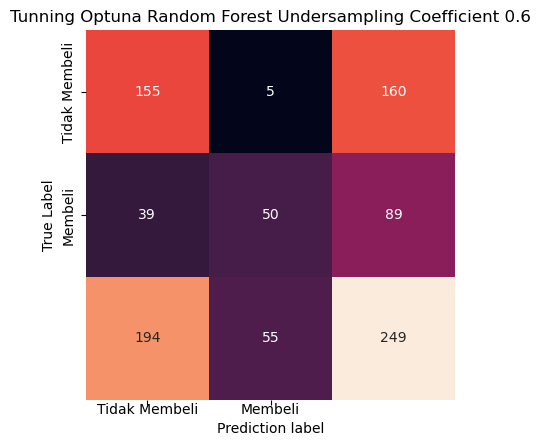

In [ ]:
model_evaluation(rf_optuna_val_under.predict(X_test_data),"Tunning Optuna Random Forest Undersampling Coefficient 0.6")

In [ ]:
#Over
rf_optuna_val_over = RandomForestClassifier(
     #fill best result parameter from tunning optuna same from fitting data validation
  n_estimators= 773,
  max_depth= 4,
  min_samples_split= 147,
  min_samples_leaf= 46
    
        )
rf_optuna_val_over.fit(x_train_SMOTE06, y_train_SMOTE06)
evaluate(rf_optuna_val_over, X_test_data, y_test_data)

Accuracy: 0.8473895582329317
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       160
           1       0.92      0.63      0.75        89

    accuracy                           0.85       249
   macro avg       0.87      0.80      0.82       249
weighted avg       0.86      0.85      0.84       249

------
Assuming 1 as positive, we get:

True Positive: 56
True Negative: 155
False Positive: 5
False Negative: 33

Precision: 0.9180327868852459
Recall: 0.6292134831460674
F1-Score: 0.7466666666666667


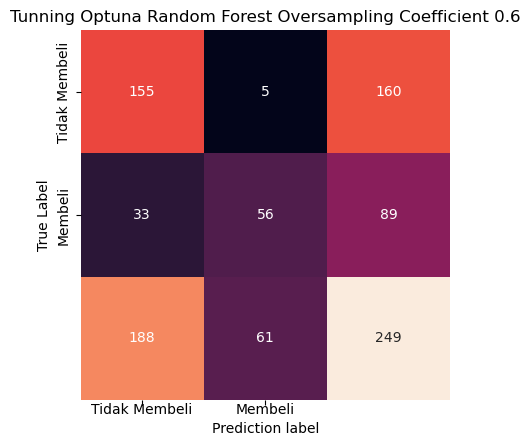

In [ ]:
model_evaluation(rf_optuna_val_over.predict(X_test_data),"Tunning Optuna Random Forest Oversampling Coefficient 0.6")

In [ ]:
def objective(trial):
    start = time()
    #Parameter Random Forest
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
    }

    # Fit the model
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(X_train_under_06, y_train_under_06)
    #prediction
    y_pred = rf_model.predict(X_test_data)
    presisi = precision_score(y_test_data,y_pred)
    
    end=time()
    print ('Time needed (at work) in minutes: {0}'.format((end-start)/60))
    
    return presisi


In [ ]:
study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=500) # timeout in second
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-01-05 20:51:40,223] A new study created in memory with name: no-name-57e6ad29-f92b-4e79-81ae-f1011c801c66
[I 2023-01-05 20:51:41,805] Trial 0 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 524, 'max_depth': 22, 'min_samples_split': 126, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.9180327868852459.


Time needed (at work) in minutes: 0.02635401487350464


[I 2023-01-05 20:51:44,362] Trial 1 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 815, 'max_depth': 42, 'min_samples_split': 5, 'min_samples_leaf': 23}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.042632468541463214


[I 2023-01-05 20:51:44,907] Trial 2 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 146, 'max_depth': 37, 'min_samples_split': 54, 'min_samples_leaf': 31}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.009075613816579182


[I 2023-01-05 20:51:47,092] Trial 3 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 704, 'max_depth': 41, 'min_samples_split': 5, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.036409036318461103


[I 2023-01-05 20:51:48,775] Trial 4 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 620, 'max_depth': 45, 'min_samples_split': 58, 'min_samples_leaf': 42}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.02806112766265869


[I 2023-01-05 20:51:49,630] Trial 5 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 300, 'max_depth': 36, 'min_samples_split': 50, 'min_samples_leaf': 50}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.014238425095876058


[I 2023-01-05 20:51:50,104] Trial 6 finished with value: 0.8813559322033898 and parameters: {'n_estimators': 142, 'max_depth': 13, 'min_samples_split': 143, 'min_samples_leaf': 48}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.007769827047983805


[I 2023-01-05 20:51:52,844] Trial 7 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 768, 'max_depth': 42, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.04567685524622599


[I 2023-01-05 20:51:53,936] Trial 8 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 388, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 31}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.01820296049118042


[I 2023-01-05 20:51:56,207] Trial 9 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 767, 'max_depth': 19, 'min_samples_split': 30, 'min_samples_leaf': 46}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.03784849246342977


[I 2023-01-05 20:51:59,012] Trial 10 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 921, 'max_depth': 50, 'min_samples_split': 106, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.04673983653386434


[I 2023-01-05 20:52:01,905] Trial 11 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 969, 'max_depth': 32, 'min_samples_split': 90, 'min_samples_leaf': 26}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.048228216171264646


[I 2023-01-05 20:52:02,259] Trial 12 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 88, 'max_depth': 33, 'min_samples_split': 37, 'min_samples_leaf': 32}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.005757256348927816


[I 2023-01-05 20:52:03,132] Trial 13 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 278, 'max_depth': 26, 'min_samples_split': 71, 'min_samples_leaf': 23}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.01454863945643107


[I 2023-01-05 20:52:04,878] Trial 14 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 490, 'max_depth': 37, 'min_samples_split': 27, 'min_samples_leaf': 58}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.028837708632151286


[I 2023-01-05 20:52:05,452] Trial 15 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 200, 'max_depth': 48, 'min_samples_split': 82, 'min_samples_leaf': 37}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.009567904472351074


[I 2023-01-05 20:52:08,191] Trial 16 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 859, 'max_depth': 29, 'min_samples_split': 53, 'min_samples_leaf': 22}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.04565335114796956


[I 2023-01-05 20:52:11,007] Trial 17 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 866, 'max_depth': 28, 'min_samples_split': 22, 'min_samples_leaf': 21}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.046935081481933594


[I 2023-01-05 20:52:13,856] Trial 18 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 833, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.04734418789545695


[I 2023-01-05 20:52:16,083] Trial 19 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 673, 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.037108627955118816


[I 2023-01-05 20:52:17,980] Trial 20 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 637, 'max_depth': 4, 'min_samples_split': 40, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03081810474395752


[I 2023-01-05 20:52:21,325] Trial 21 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 999, 'max_depth': 11, 'min_samples_split': 110, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.05575228929519653


[I 2023-01-05 20:52:24,126] Trial 22 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 919, 'max_depth': 14, 'min_samples_split': 104, 'min_samples_leaf': 7}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04655738274256389


[I 2023-01-05 20:52:26,504] Trial 23 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 641, 'max_depth': 9, 'min_samples_split': 96, 'min_samples_leaf': 8}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03949694236119588


[I 2023-01-05 20:52:28,325] Trial 24 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 627, 'max_depth': 8, 'min_samples_split': 69, 'min_samples_leaf': 12}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03033893903096517


[I 2023-01-05 20:52:29,863] Trial 25 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 445, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 14}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.025513223807017007


[I 2023-01-05 20:52:31,149] Trial 26 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 383, 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 17}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.021295487880706787


[I 2023-01-05 20:52:33,300] Trial 27 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 572, 'max_depth': 23, 'min_samples_split': 69, 'min_samples_leaf': 12}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03585009177525838


[I 2023-01-05 20:52:34,912] Trial 28 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 421, 'max_depth': 24, 'min_samples_split': 43, 'min_samples_leaf': 26}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.026864262421925862


[I 2023-01-05 20:52:36,682] Trial 29 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 514, 'max_depth': 27, 'min_samples_split': 45, 'min_samples_leaf': 37}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.029359467824300132


[I 2023-01-05 20:52:39,805] Trial 30 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 864, 'max_depth': 29, 'min_samples_split': 19, 'min_samples_leaf': 18}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.05205729405085246


[I 2023-01-05 20:52:41,817] Trial 31 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 715, 'max_depth': 6, 'min_samples_split': 37, 'min_samples_leaf': 21}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03352636098861694


[I 2023-01-05 20:52:44,323] Trial 32 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 730, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 6}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04177659352620443


[I 2023-01-05 20:52:47,354] Trial 33 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 890, 'max_depth': 30, 'min_samples_split': 57, 'min_samples_leaf': 27}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.05050638914108276


[I 2023-01-05 20:52:49,883] Trial 34 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 800, 'max_depth': 8, 'min_samples_split': 34, 'min_samples_leaf': 19}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04215008020401001


[I 2023-01-05 20:52:52,400] Trial 35 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 709, 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 8}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04196305672327678


[I 2023-01-05 20:52:55,630] Trial 36 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 996, 'max_depth': 11, 'min_samples_split': 129, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.05382150411605835


[I 2023-01-05 20:52:57,706] Trial 37 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 564, 'max_depth': 4, 'min_samples_split': 143, 'min_samples_leaf': 4}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03446900049845378


[I 2023-01-05 20:52:59,973] Trial 38 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 649, 'max_depth': 9, 'min_samples_split': 84, 'min_samples_leaf': 13}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03778287967046102


[I 2023-01-05 20:53:02,853] Trial 39 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 928, 'max_depth': 12, 'min_samples_split': 106, 'min_samples_leaf': 8}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.047863749663035075


[I 2023-01-05 20:53:04,189] Trial 40 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 475, 'max_depth': 9, 'min_samples_split': 64, 'min_samples_leaf': 16}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.02213431199391683


[I 2023-01-05 20:53:06,154] Trial 41 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 612, 'max_depth': 20, 'min_samples_split': 97, 'min_samples_leaf': 10}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03274623950322469


[I 2023-01-05 20:53:08,485] Trial 42 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 657, 'max_depth': 15, 'min_samples_split': 120, 'min_samples_leaf': 7}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.038574846585591634


[I 2023-01-05 20:53:09,598] Trial 43 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 335, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 15}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.018549386660257974


[I 2023-01-05 20:53:11,221] Trial 44 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 557, 'max_depth': 7, 'min_samples_split': 93, 'min_samples_leaf': 10}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.026910889148712158


[I 2023-01-05 20:53:12,180] Trial 45 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 322, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 14}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.01584851344426473


[I 2023-01-05 20:53:14,164] Trial 46 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 684, 'max_depth': 7, 'min_samples_split': 99, 'min_samples_leaf': 10}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.033080661296844484


[I 2023-01-05 20:53:15,624] Trial 47 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 428, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 14}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.02433140277862549


[I 2023-01-05 20:53:16,491] Trial 48 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 247, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 18}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.014309100310007731


[I 2023-01-05 20:53:18,123] Trial 49 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 586, 'max_depth': 25, 'min_samples_split': 70, 'min_samples_leaf': 11}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.02720883289972941


[I 2023-01-05 20:53:19,194] Trial 50 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 374, 'max_depth': 23, 'min_samples_split': 31, 'min_samples_leaf': 12}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.017835676670074463


[I 2023-01-05 20:53:20,738] Trial 51 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 442, 'max_depth': 24, 'min_samples_split': 15, 'min_samples_leaf': 26}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.025476125876108806


[I 2023-01-05 20:53:21,941] Trial 52 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 393, 'max_depth': 14, 'min_samples_split': 116, 'min_samples_leaf': 4}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.020047295093536376


[I 2023-01-05 20:53:23,824] Trial 53 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 608, 'max_depth': 11, 'min_samples_split': 98, 'min_samples_leaf': 8}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.031382437547047934


[I 2023-01-05 20:53:26,302] Trial 54 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 947, 'max_depth': 10, 'min_samples_split': 109, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.041301242510477704


[I 2023-01-05 20:53:28,871] Trial 55 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 784, 'max_depth': 13, 'min_samples_split': 131, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04268627166748047


[I 2023-01-05 20:53:30,328] Trial 56 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 528, 'max_depth': 6, 'min_samples_split': 78, 'min_samples_leaf': 6}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.02413802146911621


[I 2023-01-05 20:53:32,280] Trial 57 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 741, 'max_depth': 34, 'min_samples_split': 43, 'min_samples_leaf': 28}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03240350087483724


[I 2023-01-05 20:53:33,684] Trial 58 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 532, 'max_depth': 30, 'min_samples_split': 78, 'min_samples_leaf': 24}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.023403143882751463


[I 2023-01-05 20:53:34,898] Trial 59 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 449, 'max_depth': 40, 'min_samples_split': 48, 'min_samples_leaf': 23}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.020223788420359292


[I 2023-01-05 20:53:35,868] Trial 60 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 361, 'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 34}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.016168089707692464


[I 2023-01-05 20:53:38,283] Trial 61 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 872, 'max_depth': 30, 'min_samples_split': 35, 'min_samples_leaf': 19}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04025343656539917


[I 2023-01-05 20:53:40,207] Trial 62 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 738, 'max_depth': 33, 'min_samples_split': 24, 'min_samples_leaf': 36}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03207428455352783


[I 2023-01-05 20:53:42,421] Trial 63 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 828, 'max_depth': 26, 'min_samples_split': 37, 'min_samples_leaf': 20}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03689344724019369


[I 2023-01-05 20:53:44,476] Trial 64 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 791, 'max_depth': 16, 'min_samples_split': 60, 'min_samples_leaf': 29}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03411042292912801


[I 2023-01-05 20:53:46,375] Trial 65 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 705, 'max_depth': 22, 'min_samples_split': 30, 'min_samples_leaf': 17}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.0316594918568929


[I 2023-01-05 20:53:48,646] Trial 66 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 898, 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 42}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.037846235434214275


[I 2023-01-05 20:53:49,875] Trial 67 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 411, 'max_depth': 35, 'min_samples_split': 53, 'min_samples_leaf': 25}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.020347344875335693


[I 2023-01-05 20:53:53,018] Trial 68 finished with value: 0.8955223880597015 and parameters: {'n_estimators': 985, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.05210163990656535


[I 2023-01-05 20:53:55,035] Trial 69 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 761, 'max_depth': 38, 'min_samples_split': 43, 'min_samples_leaf': 28}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03361705144246419


[I 2023-01-05 20:53:56,807] Trial 70 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 684, 'max_depth': 31, 'min_samples_split': 87, 'min_samples_leaf': 24}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.029529301325480144


[I 2023-01-05 20:53:58,255] Trial 71 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 525, 'max_depth': 28, 'min_samples_split': 25, 'min_samples_leaf': 21}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.024007356166839598


[I 2023-01-05 20:54:00,163] Trial 72 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 723, 'max_depth': 9, 'min_samples_split': 136, 'min_samples_leaf': 5}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.031799634297688804


[I 2023-01-05 20:54:02,368] Trial 73 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 851, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 33}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03675217231114705


[I 2023-01-05 20:54:04,770] Trial 74 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 886, 'max_depth': 30, 'min_samples_split': 29, 'min_samples_leaf': 19}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03973788817723592


[I 2023-01-05 20:54:07,128] Trial 75 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 900, 'max_depth': 32, 'min_samples_split': 31, 'min_samples_leaf': 21}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03931040366490682


[I 2023-01-05 20:54:09,301] Trial 76 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 827, 'max_depth': 27, 'min_samples_split': 36, 'min_samples_leaf': 22}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03622146050135295


[I 2023-01-05 20:54:11,314] Trial 77 finished with value: 0.9107142857142857 and parameters: {'n_estimators': 803, 'max_depth': 11, 'min_samples_split': 60, 'min_samples_leaf': 60}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03353832165400187


[I 2023-01-05 20:54:13,213] Trial 78 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 681, 'max_depth': 8, 'min_samples_split': 33, 'min_samples_leaf': 17}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.03165166775385539


[I 2023-01-05 20:54:14,986] Trial 79 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 673, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 17}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.029544158776601156


[I 2023-01-05 20:54:17,048] Trial 80 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 760, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 15}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.034369341532389325


[I 2023-01-05 20:54:18,680] Trial 81 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 610, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 16}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.027073458830515543


[I 2023-01-05 20:54:19,167] Trial 82 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 172, 'max_depth': 8, 'min_samples_split': 65, 'min_samples_leaf': 14}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.00811235507329305


[I 2023-01-05 20:54:20,480] Trial 83 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 470, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.02188558578491211


[I 2023-01-05 20:54:20,715] Trial 84 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 71, 'max_depth': 12, 'min_samples_split': 65, 'min_samples_leaf': 12}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.003920054435729981


[I 2023-01-05 20:54:23,240] Trial 85 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 962, 'max_depth': 13, 'min_samples_split': 86, 'min_samples_leaf': 6}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04193954865137736


[I 2023-01-05 20:54:26,181] Trial 86 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 953, 'max_depth': 16, 'min_samples_split': 26, 'min_samples_leaf': 6}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04902008771896362


[I 2023-01-05 20:54:26,898] Trial 87 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 264, 'max_depth': 13, 'min_samples_split': 95, 'min_samples_leaf': 11}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.011811641852060954


[I 2023-01-05 20:54:29,546] Trial 88 finished with value: 0.921875 and parameters: {'n_estimators': 893, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.04385274648666382


[I 2023-01-05 20:54:30,966] Trial 89 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 546, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 33}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.02367244561513265


[I 2023-01-05 20:54:33,235] Trial 90 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 838, 'max_depth': 27, 'min_samples_split': 47, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.037807432810465495


[I 2023-01-05 20:54:34,082] Trial 91 finished with value: 0.9122807017543859 and parameters: {'n_estimators': 326, 'max_depth': 21, 'min_samples_split': 72, 'min_samples_leaf': 54}. Best is trial 19 with value: 0.9344262295081968.


Time needed (at work) in minutes: 0.014114729563395182


[I 2023-01-05 20:54:35,972] Trial 92 finished with value: 0.95 and parameters: {'n_estimators': 673, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.031364905834198


[I 2023-01-05 20:54:36,967] Trial 93 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 367, 'max_depth': 18, 'min_samples_split': 74, 'min_samples_leaf': 35}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.016588679949442544


[I 2023-01-05 20:54:38,609] Trial 94 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 646, 'max_depth': 6, 'min_samples_split': 150, 'min_samples_leaf': 3}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.027357606093088786


[I 2023-01-05 20:54:40,261] Trial 95 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 602, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 15}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.02753342390060425


[I 2023-01-05 20:54:41,200] Trial 96 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 346, 'max_depth': 35, 'min_samples_split': 80, 'min_samples_leaf': 31}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.015651456514994302


[I 2023-01-05 20:54:41,820] Trial 97 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 208, 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.010202920436859131


[I 2023-01-05 20:54:43,238] Trial 98 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 524, 'max_depth': 33, 'min_samples_split': 22, 'min_samples_leaf': 30}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.023491279284159342


[I 2023-01-05 20:54:43,906] Trial 99 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 225, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 9}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.011135725180308025


[I 2023-01-05 20:54:45,730] Trial 100 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 700, 'max_depth': 29, 'min_samples_split': 40, 'min_samples_leaf': 41}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.03040461540222168


[I 2023-01-05 20:54:46,023] Trial 101 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 89, 'max_depth': 24, 'min_samples_split': 12, 'min_samples_leaf': 12}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.004747466246287028


[I 2023-01-05 20:54:47,174] Trial 102 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 420, 'max_depth': 35, 'min_samples_split': 29, 'min_samples_leaf': 25}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.01917787790298462


[I 2023-01-05 20:54:49,870] Trial 103 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 955, 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 6}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.04494322935740153


[I 2023-01-05 20:54:50,687] Trial 104 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 270, 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.013597345352172852


[I 2023-01-05 20:54:51,539] Trial 105 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 292, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.014205996195475261


[I 2023-01-05 20:54:52,412] Trial 106 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 284, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.014413793881734213


[I 2023-01-05 20:54:54,013] Trial 107 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 587, 'max_depth': 22, 'min_samples_split': 49, 'min_samples_leaf': 1}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.026688186327616374


[I 2023-01-05 20:54:55,655] Trial 108 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 581, 'max_depth': 26, 'min_samples_split': 48, 'min_samples_leaf': 2}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.027091169357299806


[I 2023-01-05 20:54:57,264] Trial 109 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 551, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 11}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.02681044340133667


[I 2023-01-05 20:54:58,873] Trial 110 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 568, 'max_depth': 26, 'min_samples_split': 39, 'min_samples_leaf': 2}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.026691031455993653


[I 2023-01-05 20:55:00,355] Trial 111 finished with value: 0.8955223880597015 and parameters: {'n_estimators': 482, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.024550104141235353


[I 2023-01-05 20:55:01,664] Trial 112 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 509, 'max_depth': 4, 'min_samples_split': 78, 'min_samples_leaf': 5}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.02182490030924479


[I 2023-01-05 20:55:03,390] Trial 113 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 628, 'max_depth': 19, 'min_samples_split': 91, 'min_samples_leaf': 4}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.028632958730061848


[I 2023-01-05 20:55:05,769] Trial 114 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 886, 'max_depth': 28, 'min_samples_split': 31, 'min_samples_leaf': 20}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.039641253153483075


[I 2023-01-05 20:55:07,765] Trial 115 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 749, 'max_depth': 32, 'min_samples_split': 33, 'min_samples_leaf': 22}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.03300705353418986


[I 2023-01-05 20:55:09,629] Trial 116 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 671, 'max_depth': 35, 'min_samples_split': 54, 'min_samples_leaf': 22}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.030927014350891114


[I 2023-01-05 20:55:11,972] Trial 117 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 897, 'max_depth': 37, 'min_samples_split': 27, 'min_samples_leaf': 25}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.03904182910919189


[I 2023-01-05 20:55:12,657] Trial 118 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 212, 'max_depth': 44, 'min_samples_split': 12, 'min_samples_leaf': 8}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.011424529552459716


[I 2023-01-05 20:55:13,317] Trial 119 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 243, 'max_depth': 17, 'min_samples_split': 101, 'min_samples_leaf': 10}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.011002556482950846


[I 2023-01-05 20:55:13,658] Trial 120 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 112, 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 28}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.005685412883758545


[I 2023-01-05 20:55:14,138] Trial 121 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 167, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 16}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.007995347181955973


[I 2023-01-05 20:55:16,610] Trial 122 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 930, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 17}. Best is trial 92 with value: 0.95.
[I 2023-01-05 20:55:16,805] Trial 123 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 58, 'max_depth': 6, 'min_samples_split': 66, 'min_samples_leaf': 13}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.04091813166936239
Time needed (at work) in minutes: 0.003249009450276693


[I 2023-01-05 20:55:17,203] Trial 124 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 135, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 15}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.00664291779200236


[I 2023-01-05 20:55:17,978] Trial 125 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 287, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 7}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.012907826900482177


[I 2023-01-05 20:55:20,707] Trial 126 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 864, 'max_depth': 23, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.045348834991455075


[I 2023-01-05 20:55:23,102] Trial 127 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 831, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.0399093747138977


[I 2023-01-05 20:55:23,664] Trial 128 finished with value: 0.95 and parameters: {'n_estimators': 184, 'max_depth': 12, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.009375655651092529


[I 2023-01-05 20:55:25,897] Trial 129 finished with value: 0.95 and parameters: {'n_estimators': 780, 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.03721911509831746


[I 2023-01-05 20:55:27,613] Trial 130 finished with value: 0.95 and parameters: {'n_estimators': 594, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.028604491551717123


[I 2023-01-05 20:55:28,159] Trial 131 finished with value: 0.95 and parameters: {'n_estimators': 179, 'max_depth': 13, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.009093797206878662


[I 2023-01-05 20:55:28,763] Trial 132 finished with value: 0.95 and parameters: {'n_estimators': 189, 'max_depth': 13, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.009926374753316243


[I 2023-01-05 20:55:29,301] Trial 133 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 172, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 92 with value: 0.95.


Time needed (at work) in minutes: 0.00882733662923177


[I 2023-01-05 20:55:29,755] Trial 134 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 144, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007575960954030355


[I 2023-01-05 20:55:30,335] Trial 135 finished with value: 0.95 and parameters: {'n_estimators': 186, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009662353992462158


[I 2023-01-05 20:55:30,896] Trial 136 finished with value: 0.95 and parameters: {'n_estimators': 185, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009347323576609294


[I 2023-01-05 20:55:31,466] Trial 137 finished with value: 0.95 and parameters: {'n_estimators': 183, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009367918968200684


[I 2023-01-05 20:55:32,029] Trial 138 finished with value: 0.95 and parameters: {'n_estimators': 186, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009374582767486572


[I 2023-01-05 20:55:32,570] Trial 139 finished with value: 0.95 and parameters: {'n_estimators': 175, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00902806520462036


[I 2023-01-05 20:55:33,148] Trial 140 finished with value: 0.95 and parameters: {'n_estimators': 190, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009498576323191324


[I 2023-01-05 20:55:33,678] Trial 141 finished with value: 0.95 and parameters: {'n_estimators': 171, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008831493059794108


[I 2023-01-05 20:55:34,216] Trial 142 finished with value: 0.95 and parameters: {'n_estimators': 177, 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008961308002471923


[I 2023-01-05 20:55:34,786] Trial 143 finished with value: 0.95 and parameters: {'n_estimators': 185, 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00936062733332316


[I 2023-01-05 20:55:35,249] Trial 144 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 147, 'max_depth': 13, 'min_samples_split': 22, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007724754015604655


[I 2023-01-05 20:55:35,692] Trial 145 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 140, 'max_depth': 15, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0073896964391072595


[I 2023-01-05 20:55:36,278] Trial 146 finished with value: 0.95 and parameters: {'n_estimators': 190, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009763169288635253


[I 2023-01-05 20:55:36,849] Trial 147 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 189, 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009515945116678875


[I 2023-01-05 20:55:37,222] Trial 148 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 118, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006212401390075684


[I 2023-01-05 20:55:37,808] Trial 149 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 196, 'max_depth': 15, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00977230469385783


[I 2023-01-05 20:55:38,509] Trial 150 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 230, 'max_depth': 16, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011541930834452312


[I 2023-01-05 20:55:39,006] Trial 151 finished with value: 0.95 and parameters: {'n_estimators': 157, 'max_depth': 15, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008289833863576254


[I 2023-01-05 20:55:39,479] Trial 152 finished with value: 0.95 and parameters: {'n_estimators': 150, 'max_depth': 13, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00788423220316569


[I 2023-01-05 20:55:39,878] Trial 153 finished with value: 0.95 and parameters: {'n_estimators': 123, 'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00664670467376709


[I 2023-01-05 20:55:40,213] Trial 154 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 103, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 4}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005587232112884521


[I 2023-01-05 20:55:40,640] Trial 155 finished with value: 0.95 and parameters: {'n_estimators': 129, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007108052571614583


[I 2023-01-05 20:55:41,283] Trial 156 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 211, 'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01059019962946574


[I 2023-01-05 20:55:41,829] Trial 157 finished with value: 0.95 and parameters: {'n_estimators': 175, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009088929494222004


[I 2023-01-05 20:55:42,350] Trial 158 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 160, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008549805482228596


[I 2023-01-05 20:55:42,865] Trial 159 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 162, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008575006326039632


[I 2023-01-05 20:55:43,546] Trial 160 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 233, 'max_depth': 14, 'min_samples_split': 32, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011364869276682536


[I 2023-01-05 20:55:44,026] Trial 161 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 154, 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007851250966389974


[I 2023-01-05 20:55:44,604] Trial 162 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 188, 'max_depth': 11, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009498568375905354


[I 2023-01-05 20:55:45,282] Trial 163 finished with value: 0.95 and parameters: {'n_estimators': 220, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011296987533569336


[I 2023-01-05 20:55:46,066] Trial 164 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 255, 'max_depth': 13, 'min_samples_split': 17, 'min_samples_leaf': 5}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013065417607625326


[I 2023-01-05 20:55:46,490] Trial 165 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 129, 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006921486059824625


[I 2023-01-05 20:55:47,052] Trial 166 finished with value: 0.95 and parameters: {'n_estimators': 181, 'max_depth': 12, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009381492932637533


[I 2023-01-05 20:55:47,671] Trial 167 finished with value: 0.95 and parameters: {'n_estimators': 202, 'max_depth': 15, 'min_samples_split': 30, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01030109723409017


[I 2023-01-05 20:55:48,274] Trial 168 finished with value: 0.95 and parameters: {'n_estimators': 199, 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009920080502827963


[I 2023-01-05 20:55:48,905] Trial 169 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 206, 'max_depth': 12, 'min_samples_split': 29, 'min_samples_leaf': 5}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010517871379852295


[I 2023-01-05 20:55:49,213] Trial 170 finished with value: 0.95 and parameters: {'n_estimators': 87, 'max_depth': 14, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005139350891113281


[I 2023-01-05 20:55:49,727] Trial 171 finished with value: 0.95 and parameters: {'n_estimators': 161, 'max_depth': 16, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008281056086222332


[I 2023-01-05 20:55:50,036] Trial 172 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 93, 'max_depth': 17, 'min_samples_split': 23, 'min_samples_leaf': 4}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005151331424713135


[I 2023-01-05 20:55:50,435] Trial 173 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 121, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006663171450297037


[I 2023-01-05 20:55:50,875] Trial 174 finished with value: 0.95 and parameters: {'n_estimators': 136, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007324723402659098


[I 2023-01-05 20:55:51,330] Trial 175 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 141, 'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007449432214101156


[I 2023-01-05 20:55:51,836] Trial 176 finished with value: 0.95 and parameters: {'n_estimators': 152, 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008438336849212646


[I 2023-01-05 20:55:52,408] Trial 177 finished with value: 0.95 and parameters: {'n_estimators': 183, 'max_depth': 18, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009520014127095541


[I 2023-01-05 20:55:52,945] Trial 178 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 178, 'max_depth': 19, 'min_samples_split': 35, 'min_samples_leaf': 4}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00895227591196696


[I 2023-01-05 20:55:53,474] Trial 179 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 165, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008688906828562418


[I 2023-01-05 20:55:53,962] Trial 180 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 152, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008123079935709635


[I 2023-01-05 20:55:54,490] Trial 181 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 163, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008801968892415364


[I 2023-01-05 20:55:54,895] Trial 182 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 122, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006755936145782471


[I 2023-01-05 20:55:55,260] Trial 183 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 113, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006088662147521973


[I 2023-01-05 20:55:55,924] Trial 184 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 217, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01105880339940389


[I 2023-01-05 20:55:56,421] Trial 185 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 150, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008011619249979654


[I 2023-01-05 20:55:56,967] Trial 186 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 170, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008958013852437337


[I 2023-01-05 20:55:57,210] Trial 187 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 68, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0040607531865437824


[I 2023-01-05 20:55:57,689] Trial 188 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 134, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 134 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007976957162221273


[I 2023-01-05 20:55:58,055] Trial 189 finished with value: 0.9516129032258065 and parameters: {'n_estimators': 106, 'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006100006898244222


[I 2023-01-05 20:55:58,408] Trial 190 finished with value: 0.95 and parameters: {'n_estimators': 103, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005828392505645752


[I 2023-01-05 20:55:58,691] Trial 191 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 83, 'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004731921354929606


[I 2023-01-05 20:55:59,049] Trial 192 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 104, 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005690375963846843


[I 2023-01-05 20:55:59,466] Trial 193 finished with value: 0.95 and parameters: {'n_estimators': 128, 'max_depth': 11, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006948840618133545


[I 2023-01-05 20:55:59,956] Trial 194 finished with value: 0.95 and parameters: {'n_estimators': 153, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008167799313863118


[I 2023-01-05 20:56:00,387] Trial 195 finished with value: 0.9076923076923077 and parameters: {'n_estimators': 127, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00718299150466919


[I 2023-01-05 20:56:00,695] Trial 196 finished with value: 0.90625 and parameters: {'n_estimators': 86, 'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005132691065470377


[I 2023-01-05 20:56:01,483] Trial 197 finished with value: 0.8611111111111112 and parameters: {'n_estimators': 216, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.
[I 2023-01-05 20:56:01,677] Trial 198 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 50, 'max_depth': 13, 'min_samples_split': 30, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.013120663166046143
Time needed (at work) in minutes: 0.0032343149185180666


[I 2023-01-05 20:56:02,181] Trial 199 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 160, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 7}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008412206172943115


[I 2023-01-05 20:56:02,900] Trial 200 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 229, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011839862664540608


[I 2023-01-05 20:56:03,545] Trial 201 finished with value: 0.95 and parameters: {'n_estimators': 203, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010745076338450114


[I 2023-01-05 20:56:03,976] Trial 202 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 149, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 48}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007184930642445882


[I 2023-01-05 20:56:04,537] Trial 203 finished with value: 0.8857142857142857 and parameters: {'n_estimators': 160, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009350144863128662


[I 2023-01-05 20:56:05,001] Trial 204 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 142, 'max_depth': 14, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007591744263966878


[I 2023-01-05 20:56:05,621] Trial 205 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 199, 'max_depth': 15, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010345967610677083


[I 2023-01-05 20:56:06,177] Trial 206 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 172, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009256494045257569


[I 2023-01-05 20:56:06,928] Trial 207 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 247, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012515016396840413


[I 2023-01-05 20:56:07,326] Trial 208 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 122, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006637934843699137


[I 2023-01-05 20:56:07,951] Trial 209 finished with value: 0.95 and parameters: {'n_estimators': 163, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010424788792928059


[I 2023-01-05 20:56:08,480] Trial 210 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 166, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008817875385284423


[I 2023-01-05 20:56:09,133] Trial 211 finished with value: 0.95 and parameters: {'n_estimators': 202, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010870738824208578


[I 2023-01-05 20:56:09,758] Trial 212 finished with value: 0.95 and parameters: {'n_estimators': 202, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010423024495442709


[I 2023-01-05 20:56:10,347] Trial 213 finished with value: 0.95 and parameters: {'n_estimators': 142, 'max_depth': 13, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009818534056345621


[I 2023-01-05 20:56:10,847] Trial 214 finished with value: 0.95 and parameters: {'n_estimators': 119, 'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008324003219604493


[I 2023-01-05 20:56:11,417] Trial 215 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 113, 'max_depth': 10, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00937416156133016


[I 2023-01-05 20:56:11,820] Trial 216 finished with value: 0.95 and parameters: {'n_estimators': 80, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006712595621744792


[I 2023-01-05 20:56:12,279] Trial 217 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 101, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007520627975463867


[I 2023-01-05 20:56:12,881] Trial 218 finished with value: 0.95 and parameters: {'n_estimators': 176, 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010025107860565185


[I 2023-01-05 20:56:13,417] Trial 219 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 150, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008804341157277426


[I 2023-01-05 20:56:14,103] Trial 220 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 221, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011423921585083008


[I 2023-01-05 20:56:14,510] Trial 221 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 138, 'max_depth': 17, 'min_samples_split': 27, 'min_samples_leaf': 39}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006794563929239909


[I 2023-01-05 20:56:15,080] Trial 222 finished with value: 0.95 and parameters: {'n_estimators': 183, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009364954630533854


[I 2023-01-05 20:56:15,659] Trial 223 finished with value: 0.95 and parameters: {'n_estimators': 186, 'max_depth': 11, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009521075089772542


[I 2023-01-05 20:56:16,220] Trial 224 finished with value: 0.95 and parameters: {'n_estimators': 166, 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009349290529886882


[I 2023-01-05 20:56:16,848] Trial 225 finished with value: 0.95 and parameters: {'n_estimators': 194, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010322841008504231


[I 2023-01-05 20:56:17,207] Trial 226 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 107, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005984163284301758


[I 2023-01-05 20:56:17,733] Trial 227 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 155, 'max_depth': 18, 'min_samples_split': 24, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00862802267074585


[I 2023-01-05 20:56:18,336] Trial 228 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 30, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010060715675354003


[I 2023-01-05 20:56:18,678] Trial 229 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 95, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005697782834370931


[I 2023-01-05 20:56:19,077] Trial 230 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 122, 'max_depth': 18, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006646084785461426


[I 2023-01-05 20:56:19,516] Trial 231 finished with value: 0.95 and parameters: {'n_estimators': 132, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00731353759765625


[I 2023-01-05 20:56:19,963] Trial 232 finished with value: 0.921875 and parameters: {'n_estimators': 137, 'max_depth': 49, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007451164722442627


[I 2023-01-05 20:56:20,490] Trial 233 finished with value: 0.95 and parameters: {'n_estimators': 162, 'max_depth': 16, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008781989415486654


[I 2023-01-05 20:56:20,969] Trial 234 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 151, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007991651693979899


[I 2023-01-05 20:56:21,630] Trial 235 finished with value: 0.95 and parameters: {'n_estimators': 209, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01101748545964559


[I 2023-01-05 20:56:22,323] Trial 236 finished with value: 0.95 and parameters: {'n_estimators': 218, 'max_depth': 13, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011540718873341878


[I 2023-01-05 20:56:22,917] Trial 237 finished with value: 0.95 and parameters: {'n_estimators': 189, 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009896548589070638


[I 2023-01-05 20:56:23,340] Trial 238 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 127, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007050871849060059


[I 2023-01-05 20:56:23,679] Trial 239 finished with value: 0.95 and parameters: {'n_estimators': 98, 'max_depth': 14, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0056627114613850916


[I 2023-01-05 20:56:23,954] Trial 240 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 76, 'max_depth': 12, 'min_samples_split': 33, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004580310980478923


[I 2023-01-05 20:56:24,532] Trial 241 finished with value: 0.95 and parameters: {'n_estimators': 181, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00963519016901652


[I 2023-01-05 20:56:25,204] Trial 242 finished with value: 0.95 and parameters: {'n_estimators': 153, 'max_depth': 19, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011195957660675049


[I 2023-01-05 20:56:25,783] Trial 243 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 117, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009640332063039143


[I 2023-01-05 20:56:26,268] Trial 244 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 141, 'max_depth': 17, 'min_samples_split': 24, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00809784730275472


[I 2023-01-05 20:56:26,858] Trial 245 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 180, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00982120434443156


[I 2023-01-05 20:56:27,396] Trial 246 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 167, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008975934982299805


[I 2023-01-05 20:56:27,922] Trial 247 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 152, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008756709098815919


[I 2023-01-05 20:56:28,473] Trial 248 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 170, 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009184829394022624


[I 2023-01-05 20:56:28,871] Trial 249 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 114, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00636205275853475


[I 2023-01-05 20:56:29,506] Trial 250 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 206, 'max_depth': 14, 'min_samples_split': 27, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01058816909790039


[I 2023-01-05 20:56:29,930] Trial 251 finished with value: 0.95 and parameters: {'n_estimators': 132, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007060786088307698


[I 2023-01-05 20:56:30,271] Trial 252 finished with value: 0.95 and parameters: {'n_estimators': 95, 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0056882460912068685


[I 2023-01-05 20:56:30,801] Trial 253 finished with value: 0.95 and parameters: {'n_estimators': 166, 'max_depth': 13, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00883562167485555


[I 2023-01-05 20:56:31,314] Trial 254 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 158, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008539621035257976


[I 2023-01-05 20:56:31,942] Trial 255 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010476720333099366


[I 2023-01-05 20:56:32,415] Trial 256 finished with value: 0.95 and parameters: {'n_estimators': 139, 'max_depth': 11, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00788024663925171


[I 2023-01-05 20:56:33,196] Trial 257 finished with value: 0.95 and parameters: {'n_estimators': 234, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.013021135330200195


[I 2023-01-05 20:56:33,725] Trial 258 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 184, 'max_depth': 15, 'min_samples_split': 27, 'min_samples_leaf': 54}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008669829368591309


[I 2023-01-05 20:56:34,401] Trial 259 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 222, 'max_depth': 14, 'min_samples_split': 30, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01113192637761434


[I 2023-01-05 20:56:34,637] Trial 260 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 62, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.003922549883524576


[I 2023-01-05 20:56:34,970] Trial 261 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 98, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005415983994801839


[I 2023-01-05 20:56:35,646] Trial 262 finished with value: 0.9104477611940298 and parameters: {'n_estimators': 203, 'max_depth': 31, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011141244570414226


[I 2023-01-05 20:56:36,233] Trial 263 finished with value: 0.95 and parameters: {'n_estimators': 189, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009783343474070231


[I 2023-01-05 20:56:36,673] Trial 264 finished with value: 0.95 and parameters: {'n_estimators': 132, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0073242624600728355


[I 2023-01-05 20:56:37,153] Trial 265 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 149, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007866354783376057


[I 2023-01-05 20:56:37,641] Trial 266 finished with value: 0.9104477611940298 and parameters: {'n_estimators': 142, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008130764961242676


[I 2023-01-05 20:56:38,170] Trial 267 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 169, 'max_depth': 13, 'min_samples_split': 22, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008823283513387044


[I 2023-01-05 20:56:38,544] Trial 268 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 114, 'max_depth': 12, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006231967608133952


[I 2023-01-05 20:56:39,027] Trial 269 finished with value: 0.90625 and parameters: {'n_estimators': 149, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007918246587117513


[I 2023-01-05 20:56:39,614] Trial 270 finished with value: 0.95 and parameters: {'n_estimators': 187, 'max_depth': 15, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009636032581329345


[I 2023-01-05 20:56:40,354] Trial 271 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 235, 'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012332383791605632


[I 2023-01-05 20:56:40,776] Trial 272 finished with value: 0.95 and parameters: {'n_estimators': 127, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007039650281270345


[I 2023-01-05 20:56:41,307] Trial 273 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 170, 'max_depth': 17, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008850320180257162


[I 2023-01-05 20:56:41,877] Trial 274 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 156, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009365642070770263


[I 2023-01-05 20:56:42,414] Trial 275 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 170, 'max_depth': 16, 'min_samples_split': 24, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008954914410909016


[I 2023-01-05 20:56:42,700] Trial 276 finished with value: 0.8939393939393939 and parameters: {'n_estimators': 72, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004607629776000976


[I 2023-01-05 20:56:43,276] Trial 277 finished with value: 0.95 and parameters: {'n_estimators': 183, 'max_depth': 13, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009474329153696696


[I 2023-01-05 20:56:43,992] Trial 278 finished with value: 0.95 and parameters: {'n_estimators': 216, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011921183268229166


[I 2023-01-05 20:56:44,626] Trial 279 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 197, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010572866598765055


[I 2023-01-05 20:56:45,041] Trial 280 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 125, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0069165865580240885


[I 2023-01-05 20:56:45,333] Trial 281 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 82, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00473020076751709


[I 2023-01-05 20:56:45,691] Trial 282 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 105, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005972234408060709


[I 2023-01-05 20:56:46,163] Trial 283 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 142, 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007855407396952311


[I 2023-01-05 20:56:46,970] Trial 284 finished with value: 0.95 and parameters: {'n_estimators': 264, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01346528132756551


[I 2023-01-05 20:56:47,618] Trial 285 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 205, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010660374164581298


[I 2023-01-05 20:56:48,041] Trial 286 finished with value: 0.95 and parameters: {'n_estimators': 128, 'max_depth': 17, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007056876023610433


[I 2023-01-05 20:56:48,570] Trial 287 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 168, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008810933430989583


[I 2023-01-05 20:56:49,319] Trial 288 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 242, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012352204322814942


[I 2023-01-05 20:56:49,668] Trial 289 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 98, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005813241004943848


[I 2023-01-05 20:56:51,555] Trial 290 finished with value: 0.8923076923076924 and parameters: {'n_estimators': 612, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.03144208590189616


[I 2023-01-05 20:56:52,177] Trial 291 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 220, 'max_depth': 13, 'min_samples_split': 119, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010234705607096354


[I 2023-01-05 20:56:52,862] Trial 292 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 209, 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011410264174143474


[I 2023-01-05 20:56:53,244] Trial 293 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 112, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006371593475341797


[I 2023-01-05 20:56:53,537] Trial 294 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 80, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004882228374481201


[I 2023-01-05 20:56:54,025] Trial 295 finished with value: 0.95 and parameters: {'n_estimators': 155, 'max_depth': 10, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008144179979960123


[I 2023-01-05 20:56:54,464] Trial 296 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 135, 'max_depth': 17, 'min_samples_split': 11, 'min_samples_leaf': 7}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00717695951461792


[I 2023-01-05 20:56:54,838] Trial 297 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 110, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006101918220520019


[I 2023-01-05 20:56:55,468] Trial 298 finished with value: 0.8732394366197183 and parameters: {'n_estimators': 193, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010498825709025066


[I 2023-01-05 20:56:55,974] Trial 299 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 177, 'max_depth': 21, 'min_samples_split': 24, 'min_samples_leaf': 45}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008433890342712403


[I 2023-01-05 20:56:56,526] Trial 300 finished with value: 0.95 and parameters: {'n_estimators': 164, 'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00919425090154012


[I 2023-01-05 20:56:57,006] Trial 301 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 147, 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007868472735087078


[I 2023-01-05 20:56:57,426] Trial 302 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 114, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006996015707651774


[I 2023-01-05 20:56:57,919] Trial 303 finished with value: 0.95 and parameters: {'n_estimators': 137, 'max_depth': 17, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008219587802886962


[I 2023-01-05 20:56:58,433] Trial 304 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 160, 'max_depth': 13, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00856998364130656


[I 2023-01-05 20:56:58,938] Trial 305 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 154, 'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00827481746673584


[I 2023-01-05 20:56:59,351] Trial 306 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 123, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006889915466308594


[I 2023-01-05 20:56:59,775] Trial 307 finished with value: 0.95 and parameters: {'n_estimators': 135, 'max_depth': 9, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007056144873301188


[I 2023-01-05 20:57:01,064] Trial 308 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 445, 'max_depth': 13, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.021349302927652993


[I 2023-01-05 20:57:01,308] Trial 309 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 64, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.003931959470113118


[I 2023-01-05 20:57:03,577] Trial 310 finished with value: 0.95 and parameters: {'n_estimators': 779, 'max_depth': 38, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.03782387177149455


[I 2023-01-05 20:57:04,535] Trial 311 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 309, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01582757631937663


[I 2023-01-05 20:57:04,876] Trial 312 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 100, 'max_depth': 18, 'min_samples_split': 27, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00568458636601766


[I 2023-01-05 20:57:05,513] Trial 313 finished with value: 0.95 and parameters: {'n_estimators': 207, 'max_depth': 43, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010607270399729411


[I 2023-01-05 20:57:06,123] Trial 314 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 201, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01002801259358724


[I 2023-01-05 20:57:06,669] Trial 315 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 171, 'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009104716777801513


[I 2023-01-05 20:57:07,427] Trial 316 finished with value: 0.95 and parameters: {'n_estimators': 243, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012636991341908772


[I 2023-01-05 20:57:07,720] Trial 317 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 84, 'max_depth': 29, 'min_samples_split': 35, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004876561959584554


[I 2023-01-05 20:57:07,939] Trial 318 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 56, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.003663321336110433


[I 2023-01-05 20:57:08,567] Trial 319 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 189, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010459776719411213


[I 2023-01-05 20:57:09,128] Trial 320 finished with value: 0.95 and parameters: {'n_estimators': 180, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009346715609232585


[I 2023-01-05 20:57:09,518] Trial 321 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 117, 'max_depth': 19, 'min_samples_split': 27, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00635981559753418


[I 2023-01-05 20:57:09,801] Trial 322 finished with value: 0.95 and parameters: {'n_estimators': 78, 'max_depth': 10, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004444646835327149


[I 2023-01-05 20:57:10,248] Trial 323 finished with value: 0.95 and parameters: {'n_estimators': 140, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007451291879018148


[I 2023-01-05 20:57:10,703] Trial 324 finished with value: 0.95 and parameters: {'n_estimators': 137, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007313998540242513


[I 2023-01-05 20:57:11,151] Trial 325 finished with value: 0.95 and parameters: {'n_estimators': 130, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0074646194775899255


[I 2023-01-05 20:57:11,491] Trial 326 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 103, 'max_depth': 7, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005669609705607096


[I 2023-01-05 20:57:11,988] Trial 327 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 157, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 7}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008277980486551921


[I 2023-01-05 20:57:12,681] Trial 328 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 216, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01154702107111613


[I 2023-01-05 20:57:13,291] Trial 329 finished with value: 0.95 and parameters: {'n_estimators': 191, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010174266497294108


[I 2023-01-05 20:57:13,821] Trial 330 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 163, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008834449450174968


[I 2023-01-05 20:57:14,384] Trial 331 finished with value: 0.95 and parameters: {'n_estimators': 179, 'max_depth': 14, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009383889039357503


[I 2023-01-05 20:57:14,912] Trial 332 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 158, 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008788426717122396


[I 2023-01-05 20:57:15,579] Trial 333 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 225, 'max_depth': 12, 'min_samples_split': 30, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01112509568532308


[I 2023-01-05 20:57:16,222] Trial 334 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 203, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010715047518412272


[I 2023-01-05 20:57:16,933] Trial 335 finished with value: 0.95 and parameters: {'n_estimators': 232, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011850384871164958


[I 2023-01-05 20:57:17,421] Trial 336 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 150, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008130733172098796


[I 2023-01-05 20:57:18,084] Trial 337 finished with value: 0.95 and parameters: {'n_estimators': 203, 'max_depth': 13, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01104265848795573


[I 2023-01-05 20:57:18,505] Trial 338 finished with value: 0.890625 and parameters: {'n_estimators': 121, 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007031774520874024


[I 2023-01-05 20:57:20,641] Trial 339 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 741, 'max_depth': 10, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.035598504543304446


[I 2023-01-05 20:57:21,228] Trial 340 finished with value: 0.95 and parameters: {'n_estimators': 185, 'max_depth': 15, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009775646527608236


[I 2023-01-05 20:57:21,987] Trial 341 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 254, 'max_depth': 16, 'min_samples_split': 34, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012517301241556804


[I 2023-01-05 20:57:22,295] Trial 342 finished with value: 0.95 and parameters: {'n_estimators': 87, 'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005126516024271647


[I 2023-01-05 20:57:22,938] Trial 343 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 203, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010722200075785318


[I 2023-01-05 20:57:23,476] Trial 344 finished with value: 0.95 and parameters: {'n_estimators': 167, 'max_depth': 11, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00896519422531128


[I 2023-01-05 20:57:24,022] Trial 345 finished with value: 0.95 and parameters: {'n_estimators': 174, 'max_depth': 14, 'min_samples_split': 21, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009106449286142985


[I 2023-01-05 20:57:25,238] Trial 346 finished with value: 0.95 and parameters: {'n_estimators': 408, 'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.020118319988250734


[I 2023-01-05 20:57:25,621] Trial 347 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 104, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00638207197189331


[I 2023-01-05 20:57:26,052] Trial 348 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 146, 'max_depth': 17, 'min_samples_split': 134, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007188514868418375


[I 2023-01-05 20:57:26,360] Trial 349 finished with value: 0.95 and parameters: {'n_estimators': 86, 'max_depth': 18, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004998358090718588


[I 2023-01-05 20:57:26,627] Trial 350 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 71, 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004449371496836344


[I 2023-01-05 20:57:27,237] Trial 351 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 195, 'max_depth': 15, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01002176602681478


[I 2023-01-05 20:57:27,815] Trial 352 finished with value: 0.95 and parameters: {'n_estimators': 185, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009635237852732341


[I 2023-01-05 20:57:28,205] Trial 353 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 118, 'max_depth': 16, 'min_samples_split': 31, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006500919659932454


[I 2023-01-05 20:57:28,775] Trial 354 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 170, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009363178412119548


[I 2023-01-05 20:57:29,215] Trial 355 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 133, 'max_depth': 48, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00719223419825236


[I 2023-01-05 20:57:29,809] Trial 356 finished with value: 0.95 and parameters: {'n_estimators': 185, 'max_depth': 13, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009905056158701579


[I 2023-01-05 20:57:30,517] Trial 357 finished with value: 0.95 and parameters: {'n_estimators': 226, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011671372254689534


[I 2023-01-05 20:57:31,063] Trial 358 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 186, 'max_depth': 47, 'min_samples_split': 110, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.
[I 2023-01-05 20:57:31,267] Trial 359 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 53, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008956392606099447
Time needed (at work) in minutes: 0.0034023483594258627


[I 2023-01-05 20:57:33,661] Trial 360 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 817, 'max_depth': 46, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0397591233253479


[I 2023-01-05 20:57:34,198] Trial 361 finished with value: 0.9076923076923077 and parameters: {'n_estimators': 162, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008962007363637288


[I 2023-01-05 20:57:34,663] Trial 362 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 143, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007603311538696289


[I 2023-01-05 20:57:35,415] Trial 363 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 248, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012397845586140951


[I 2023-01-05 20:57:35,755] Trial 364 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 98, 'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0056729873021443685


[I 2023-01-05 20:57:36,506] Trial 365 finished with value: 0.95 and parameters: {'n_estimators': 235, 'max_depth': 16, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01223756472269694


[I 2023-01-05 20:57:36,889] Trial 366 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 112, 'max_depth': 17, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006370949745178223


[I 2023-01-05 20:57:38,753] Trial 367 finished with value: 0.95 and parameters: {'n_estimators': 646, 'max_depth': 42, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.030944999059041342


[I 2023-01-05 20:57:40,135] Trial 368 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 494, 'max_depth': 42, 'min_samples_split': 59, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.023030503590901693


[I 2023-01-05 20:57:40,575] Trial 369 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 132, 'max_depth': 14, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007329897085825602


[I 2023-01-05 20:57:41,390] Trial 370 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 269, 'max_depth': 14, 'min_samples_split': 38, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.013587741057078044


[I 2023-01-05 20:57:41,886] Trial 371 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 152, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008254512151082357


[I 2023-01-05 20:57:42,430] Trial 372 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 169, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008946688969930013


[I 2023-01-05 20:57:42,951] Trial 373 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 151, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008676437536875407


[I 2023-01-05 20:57:43,243] Trial 374 finished with value: 0.8840579710144928 and parameters: {'n_estimators': 77, 'max_depth': 20, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004861422379811605


[I 2023-01-05 20:57:43,804] Trial 375 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 173, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009357357025146484


[I 2023-01-05 20:57:44,250] Trial 376 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 133, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007432544231414795


[I 2023-01-05 20:57:45,008] Trial 377 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 278, 'max_depth': 12, 'min_samples_split': 31, 'min_samples_leaf': 53}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012623449166615805


[I 2023-01-05 20:57:46,655] Trial 378 finished with value: 0.95 and parameters: {'n_estimators': 549, 'max_depth': 13, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.027309163411458334


[I 2023-01-05 20:57:47,075] Trial 379 finished with value: 0.9047619047619048 and parameters: {'n_estimators': 118, 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0068634748458862305


[I 2023-01-05 20:57:47,667] Trial 380 finished with value: 0.95 and parameters: {'n_estimators': 191, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009861087799072266


[I 2023-01-05 20:57:48,105] Trial 381 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 144, 'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 38}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007309865951538086


[I 2023-01-05 20:57:48,712] Trial 382 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 192, 'max_depth': 14, 'min_samples_split': 27, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009984203179677327


[I 2023-01-05 20:57:49,176] Trial 383 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 130, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0077267686525980634


[I 2023-01-05 20:57:49,492] Trial 384 finished with value: 0.95 and parameters: {'n_estimators': 84, 'max_depth': 11, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005131828784942627


[I 2023-01-05 20:57:50,029] Trial 385 finished with value: 0.95 and parameters: {'n_estimators': 172, 'max_depth': 33, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00894847313563029


[I 2023-01-05 20:57:50,688] Trial 386 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 213, 'max_depth': 28, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010984639326731363


[I 2023-01-05 20:57:51,305] Trial 387 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 192, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01028517484664917


[I 2023-01-05 20:57:51,729] Trial 388 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 102, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007070390383402506


[I 2023-01-05 20:57:52,299] Trial 389 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 179, 'max_depth': 31, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00949472983678182


[I 2023-01-05 20:57:52,632] Trial 390 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 98, 'max_depth': 7, 'min_samples_split': 52, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005417223771413167


[I 2023-01-05 20:57:53,333] Trial 391 finished with value: 0.95 and parameters: {'n_estimators': 228, 'max_depth': 13, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01168418327967326


[I 2023-01-05 20:57:54,009] Trial 392 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 221, 'max_depth': 11, 'min_samples_split': 30, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01113750139872233


[I 2023-01-05 20:57:54,343] Trial 393 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 94, 'max_depth': 14, 'min_samples_split': 28, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005561621983846029


[I 2023-01-05 20:57:54,890] Trial 394 finished with value: 0.8985507246376812 and parameters: {'n_estimators': 158, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009116550286610922


[I 2023-01-05 20:57:55,346] Trial 395 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 144, 'max_depth': 34, 'min_samples_split': 32, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0075955947240193685


[I 2023-01-05 20:57:55,883] Trial 396 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 165, 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008821101983388265


[I 2023-01-05 20:57:56,281] Trial 397 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 130, 'max_depth': 44, 'min_samples_split': 125, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006634728113810221


[I 2023-01-05 20:57:56,916] Trial 398 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 199, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010303290685017903


[I 2023-01-05 20:57:57,453] Trial 399 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 178, 'max_depth': 5, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008950893084208171


[I 2023-01-05 20:57:58,109] Trial 400 finished with value: 0.95 and parameters: {'n_estimators': 207, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010925976435343425


[I 2023-01-05 20:57:58,646] Trial 401 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 186, 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 44}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008821467558542887


[I 2023-01-05 20:57:59,282] Trial 402 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 212, 'max_depth': 19, 'min_samples_split': 44, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010461870829264324


[I 2023-01-05 20:57:59,836] Trial 403 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 175, 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009099888801574706


[I 2023-01-05 20:58:00,394] Trial 404 finished with value: 0.9137931034482759 and parameters: {'n_estimators': 195, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 57}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009289824962615966


[I 2023-01-05 20:58:01,650] Trial 405 finished with value: 0.95 and parameters: {'n_estimators': 427, 'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.02079441547393799


[I 2023-01-05 20:58:02,130] Trial 406 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 150, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008002956708272299


[I 2023-01-05 20:58:02,574] Trial 407 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 121, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007397123177846273


[I 2023-01-05 20:58:03,077] Trial 408 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 173, 'max_depth': 15, 'min_samples_split': 144, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008257766564687094


[I 2023-01-05 20:58:03,624] Trial 409 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 152, 'max_depth': 22, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009118215243021647


[I 2023-01-05 20:58:03,998] Trial 410 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 107, 'max_depth': 21, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00622105598449707


[I 2023-01-05 20:58:06,891] Trial 411 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 980, 'max_depth': 39, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.048227794965108234


[I 2023-01-05 20:58:07,346] Trial 412 finished with value: 0.8923076923076924 and parameters: {'n_estimators': 125, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007571891943613688


[I 2023-01-05 20:58:08,580] Trial 413 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 410, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.020431133111317952


[I 2023-01-05 20:58:09,654] Trial 414 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 358, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.017907726764678954


[I 2023-01-05 20:58:10,442] Trial 415 finished with value: 0.95 and parameters: {'n_estimators': 253, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012995254993438721


[I 2023-01-05 20:58:12,303] Trial 416 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 697, 'max_depth': 16, 'min_samples_split': 88, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.031017351150512695


[I 2023-01-05 20:58:14,215] Trial 417 finished with value: 0.95 and parameters: {'n_estimators': 627, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.03159109354019165


[I 2023-01-05 20:58:14,973] Trial 418 finished with value: 0.8714285714285714 and parameters: {'n_estimators': 231, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012625459829966228


[I 2023-01-05 20:58:16,711] Trial 419 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 652, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 32}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.028813358147939047


[I 2023-01-05 20:58:17,111] Trial 420 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 113, 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006516961256663004


[I 2023-01-05 20:58:17,610] Trial 421 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 156, 'max_depth': 15, 'min_samples_split': 25, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008328251043955485


[I 2023-01-05 20:58:18,147] Trial 422 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 161, 'max_depth': 16, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00881892442703247


[I 2023-01-05 20:58:18,569] Trial 423 finished with value: 0.95 and parameters: {'n_estimators': 124, 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007028834025065104


[I 2023-01-05 20:58:19,066] Trial 424 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 146, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008143277963002522


[I 2023-01-05 20:58:19,661] Trial 425 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 192, 'max_depth': 15, 'min_samples_split': 28, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009928460915883381


[I 2023-01-05 20:58:20,320] Trial 426 finished with value: 0.95 and parameters: {'n_estimators': 209, 'max_depth': 14, 'min_samples_split': 21, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010847413539886474


[I 2023-01-05 20:58:20,767] Trial 427 finished with value: 0.90625 and parameters: {'n_estimators': 135, 'max_depth': 25, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007448510328928629


[I 2023-01-05 20:58:21,068] Trial 428 finished with value: 0.95 and parameters: {'n_estimators': 80, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005008673667907715


[I 2023-01-05 20:58:21,450] Trial 429 finished with value: 0.90625 and parameters: {'n_estimators': 110, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006234999497731527


[I 2023-01-05 20:58:21,742] Trial 430 finished with value: 0.95 and parameters: {'n_estimators': 78, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004866675535837809


[I 2023-01-05 20:58:21,993] Trial 431 finished with value: 0.95 and parameters: {'n_estimators': 64, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00418019692103068


[I 2023-01-05 20:58:22,212] Trial 432 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 56, 'max_depth': 16, 'min_samples_split': 21, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0036566416422526044


[I 2023-01-05 20:58:22,774] Trial 433 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 176, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009355672200520833


[I 2023-01-05 20:58:23,285] Trial 434 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 161, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008527664343516032


[I 2023-01-05 20:58:23,994] Trial 435 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 221, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011673839886983235


[I 2023-01-05 20:58:24,671] Trial 436 finished with value: 0.921875 and parameters: {'n_estimators': 213, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011285992463429768


[I 2023-01-05 20:58:25,457] Trial 437 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 203, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012962142626444498


[I 2023-01-05 20:58:26,080] Trial 438 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 199, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 35}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01023928721745809


[I 2023-01-05 20:58:26,463] Trial 439 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 97, 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006380716959635417


[I 2023-01-05 20:58:27,170] Trial 440 finished with value: 0.95 and parameters: {'n_estimators': 228, 'max_depth': 30, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01179595390955607


[I 2023-01-05 20:58:29,234] Trial 441 finished with value: 0.95 and parameters: {'n_estimators': 716, 'max_depth': 35, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.03439422845840454


[I 2023-01-05 20:58:29,804] Trial 442 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 180, 'max_depth': 15, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009493617216746013


[I 2023-01-05 20:58:30,550] Trial 443 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 248, 'max_depth': 13, 'min_samples_split': 33, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01244588295618693


[I 2023-01-05 20:58:32,120] Trial 444 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 547, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.026169439156850178


[I 2023-01-05 20:58:33,002] Trial 445 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 298, 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.014687637488047281


[I 2023-01-05 20:58:33,680] Trial 446 finished with value: 0.95 and parameters: {'n_estimators': 215, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011164569854736328


[I 2023-01-05 20:58:34,277] Trial 447 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 164, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009956753253936768


[I 2023-01-05 20:58:35,285] Trial 448 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 323, 'max_depth': 13, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01679909626642863


[I 2023-01-05 20:58:37,636] Trial 449 finished with value: 0.95 and parameters: {'n_estimators': 813, 'max_depth': 38, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.03904772599538167


[I 2023-01-05 20:58:38,296] Trial 450 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 206, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01100298563639323


[I 2023-01-05 20:58:38,884] Trial 451 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 150, 'max_depth': 14, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00979913075764974


[I 2023-01-05 20:58:39,453] Trial 452 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 173, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00948110024134318


[I 2023-01-05 20:58:39,934] Trial 453 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 135, 'max_depth': 15, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008013602097829182


[I 2023-01-05 20:58:40,741] Trial 454 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 268, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 7}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.013447169462839763


[I 2023-01-05 20:58:41,139] Trial 455 finished with value: 0.95 and parameters: {'n_estimators': 120, 'max_depth': 9, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0066293160120646155


[I 2023-01-05 20:58:41,863] Trial 456 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 75, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012070012092590333


[I 2023-01-05 20:58:42,327] Trial 457 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 145, 'max_depth': 16, 'min_samples_split': 29, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00773619016011556


[I 2023-01-05 20:58:42,791] Trial 458 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 142, 'max_depth': 14, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007733488082885742


[I 2023-01-05 20:58:43,172] Trial 459 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 119, 'max_depth': 13, 'min_samples_split': 82, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00634915033976237


[I 2023-01-05 20:58:43,456] Trial 460 finished with value: 0.9076923076923077 and parameters: {'n_estimators': 74, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004737754662831624


[I 2023-01-05 20:58:43,708] Trial 461 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 57, 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0040648539861043295


[I 2023-01-05 20:58:45,068] Trial 462 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 522, 'max_depth': 4, 'min_samples_split': 103, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.022538363933563232


[I 2023-01-05 20:58:45,565] Trial 463 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 150, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008271245161692302


[I 2023-01-05 20:58:46,078] Trial 464 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 170, 'max_depth': 47, 'min_samples_split': 115, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008551780382792156


[I 2023-01-05 20:58:46,510] Trial 465 finished with value: 0.95 and parameters: {'n_estimators': 131, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007063364982604981


[I 2023-01-05 20:58:46,875] Trial 466 finished with value: 0.8378378378378378 and parameters: {'n_estimators': 99, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.006093438466389974


[I 2023-01-05 20:58:48,556] Trial 467 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 568, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.028006553649902344


[I 2023-01-05 20:58:49,142] Trial 468 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 187, 'max_depth': 16, 'min_samples_split': 22, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009776747226715088


[I 2023-01-05 20:58:49,679] Trial 469 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 182, 'max_depth': 44, 'min_samples_split': 20, 'min_samples_leaf': 29}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008950448036193848


[I 2023-01-05 20:58:49,930] Trial 470 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 70, 'max_depth': 13, 'min_samples_split': 69, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.004174681504567465


[I 2023-01-05 20:58:50,678] Trial 471 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 234, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012337811787923177


[I 2023-01-05 20:58:51,256] Trial 472 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 204, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 41}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009638198216756185


[I 2023-01-05 20:58:53,135] Trial 473 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 732, 'max_depth': 36, 'min_samples_split': 56, 'min_samples_leaf': 49}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.031174886226654052


[I 2023-01-05 20:58:53,459] Trial 474 finished with value: 0.9047619047619048 and parameters: {'n_estimators': 88, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005398813883463542


[I 2023-01-05 20:58:54,094] Trial 475 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 201, 'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.01058055559794108


[I 2023-01-05 20:58:54,468] Trial 476 finished with value: 0.95 and parameters: {'n_estimators': 104, 'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.0061046441396077475


[I 2023-01-05 20:58:55,047] Trial 477 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 185, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009647186597188313


[I 2023-01-05 20:58:56,790] Trial 478 finished with value: 0.95 and parameters: {'n_estimators': 595, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.028914904594421385


[I 2023-01-05 20:58:57,318] Trial 479 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 160, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008800212542215984


[I 2023-01-05 20:58:57,827] Trial 480 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 153, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008485090732574464


[I 2023-01-05 20:58:59,708] Trial 481 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 646, 'max_depth': 18, 'min_samples_split': 29, 'min_samples_leaf': 9}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.03120963176091512


[I 2023-01-05 20:59:00,164] Trial 482 finished with value: 0.95 and parameters: {'n_estimators': 132, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007607936859130859


[I 2023-01-05 20:59:00,545] Trial 483 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 113, 'max_depth': 11, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.00634601910909017


[I 2023-01-05 20:59:00,995] Trial 484 finished with value: 0.95 and parameters: {'n_estimators': 136, 'max_depth': 11, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007493134339650472


[I 2023-01-05 20:59:01,426] Trial 485 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 109, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007041080792744955


[I 2023-01-05 20:59:01,873] Trial 486 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 136, 'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 6}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.007445991039276123


[I 2023-01-05 20:59:03,755] Trial 487 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 673, 'max_depth': 16, 'min_samples_split': 33, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.03137650489807129


[I 2023-01-05 20:59:04,497] Trial 488 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 243, 'max_depth': 17, 'min_samples_split': 31, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.012361729145050048


[I 2023-01-05 20:59:05,050] Trial 489 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 174, 'max_depth': 10, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009221196174621582


[I 2023-01-05 20:59:05,350] Trial 490 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 88, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 26}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005002864201863607


[I 2023-01-05 20:59:05,863] Trial 491 finished with value: 0.95 and parameters: {'n_estimators': 160, 'max_depth': 14, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008551367123921712


[I 2023-01-05 20:59:06,424] Trial 492 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 176, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 5}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.009344542026519775


[I 2023-01-05 20:59:07,108] Trial 493 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 228, 'max_depth': 17, 'min_samples_split': 35, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011402809619903564


[I 2023-01-05 20:59:07,834] Trial 494 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 236, 'max_depth': 14, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011954545974731445


[I 2023-01-05 20:59:08,363] Trial 495 finished with value: 0.95 and parameters: {'n_estimators': 162, 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.008826597531636556


[I 2023-01-05 20:59:09,039] Trial 496 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 213, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.011264280478159586


[I 2023-01-05 20:59:11,555] Trial 497 finished with value: 0.8493150684931506 and parameters: {'n_estimators': 791, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.041794129212697345


[I 2023-01-05 20:59:11,872] Trial 498 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 96, 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.005285656452178955


[I 2023-01-05 20:59:12,493] Trial 499 finished with value: 0.95 and parameters: {'n_estimators': 189, 'max_depth': 15, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 189 with value: 0.9516129032258065.


Time needed (at work) in minutes: 0.010343881448109944
Number of completed trials: 500
Best trial:
	Best Score: 0.9516129032258065
	Best Params: 
    n_estimators: 106
    max_depth: 17
    min_samples_split: 17
    min_samples_leaf: 1


In [ ]:
study.best_params

{'n_estimators': 106,
 'max_depth': 17,
 'min_samples_split': 17,
 'min_samples_leaf': 1}

In [ ]:
rf_optuna_under06 = RandomForestClassifier(
    #fill best result parameter from tunning optuna
  n_estimators= 106,
  max_depth= 17,
  min_samples_split= 17,
  min_samples_leaf= 1
    
        )
rf_optuna_under06.fit(X_train_data, y_train_data)
evaluate(rf_optuna_under06, X_test_data, y_test_data)

Accuracy: 0.8634538152610441
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       160
           1       0.94      0.66      0.78        89

    accuracy                           0.86       249
   macro avg       0.89      0.82      0.84       249
weighted avg       0.87      0.86      0.86       249

------
Assuming 1 as positive, we get:

True Positive: 59
True Negative: 156
False Positive: 4
False Negative: 30

Precision: 0.9365079365079365
Recall: 0.6629213483146067
F1-Score: 0.7763157894736842


In [ ]:
#Optuna tunning
def objective(trial):
    start = time()
    #Parameter Random Forest
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 150),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
    }

    # Fit the model
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(x_train_SMOTE06, y_train_SMOTE06)
    #prediction
    y_pred = rf_model.predict(X_test_data)
    presisi = precision_score(y_test_data,y_pred)
    
    end=time()
    print ('Time needed (at work) in minutes: {0}'.format((end-start)/60))
    
    return presisi


In [ ]:
study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=500) # timeout in second
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-01-05 21:00:42,474] A new study created in memory with name: no-name-77df3124-5201-448f-88f3-b8a2e2e7cd47
[I 2023-01-05 21:00:44,748] Trial 0 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 748, 'max_depth': 44, 'min_samples_split': 111, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.9180327868852459.


Time needed (at work) in minutes: 0.03775885502497355


[I 2023-01-05 21:00:45,124] Trial 1 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 108, 'max_depth': 14, 'min_samples_split': 57, 'min_samples_leaf': 45}. Best is trial 0 with value: 0.9180327868852459.


Time needed (at work) in minutes: 0.006268930435180664


[I 2023-01-05 21:00:47,051] Trial 2 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 627, 'max_depth': 41, 'min_samples_split': 141, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.9180327868852459.


Time needed (at work) in minutes: 0.031991636753082274


[I 2023-01-05 21:00:48,788] Trial 3 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 605, 'max_depth': 47, 'min_samples_split': 13, 'min_samples_leaf': 54}. Best is trial 0 with value: 0.9180327868852459.


Time needed (at work) in minutes: 0.028939088185628254


[I 2023-01-05 21:00:49,636] Trial 4 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 306, 'max_depth': 44, 'min_samples_split': 93, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9180327868852459.


Time needed (at work) in minutes: 0.013995675245920818


[I 2023-01-05 21:00:51,027] Trial 5 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 501, 'max_depth': 34, 'min_samples_split': 17, 'min_samples_leaf': 21}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.02318638563156128


[I 2023-01-05 21:00:51,817] Trial 6 finished with value: 0.9152542372881356 and parameters: {'n_estimators': 306, 'max_depth': 30, 'min_samples_split': 90, 'min_samples_leaf': 57}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.013170444965362548


[I 2023-01-05 21:00:52,125] Trial 7 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 107, 'max_depth': 6, 'min_samples_split': 37, 'min_samples_leaf': 53}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.005132957299550375


[I 2023-01-05 21:00:54,298] Trial 8 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 835, 'max_depth': 49, 'min_samples_split': 144, 'min_samples_leaf': 39}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.036218321323394774


[I 2023-01-05 21:00:54,785] Trial 9 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 166, 'max_depth': 50, 'min_samples_split': 36, 'min_samples_leaf': 9}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.008121983210245768


[I 2023-01-05 21:00:57,367] Trial 10 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 959, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 27}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.04288406769434611


[I 2023-01-05 21:00:58,423] Trial 11 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 364, 'max_depth': 36, 'min_samples_split': 39, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.017610005537668862


[I 2023-01-05 21:00:59,662] Trial 12 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 453, 'max_depth': 21, 'min_samples_split': 32, 'min_samples_leaf': 28}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.020656530062357584


[I 2023-01-05 21:01:00,227] Trial 13 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 186, 'max_depth': 36, 'min_samples_split': 60, 'min_samples_leaf': 9}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.009282294909159343


[I 2023-01-05 21:01:01,598] Trial 14 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 495, 'max_depth': 22, 'min_samples_split': 18, 'min_samples_leaf': 19}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.022837201754252117


[I 2023-01-05 21:01:02,351] Trial 15 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 258, 'max_depth': 35, 'min_samples_split': 59, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.012416625022888183


[I 2023-01-05 21:01:03,486] Trial 16 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 420, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 36}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.01891512473424276


[I 2023-01-05 21:01:05,220] Trial 17 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 617, 'max_depth': 18, 'min_samples_split': 58, 'min_samples_leaf': 9}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.02889939546585083


[I 2023-01-05 21:01:06,986] Trial 18 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 635, 'max_depth': 12, 'min_samples_split': 68, 'min_samples_leaf': 2}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.029299867153167725


[I 2023-01-05 21:01:07,663] Trial 19 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 236, 'max_depth': 40, 'min_samples_split': 85, 'min_samples_leaf': 13}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.011290093262990316


[I 2023-01-05 21:01:09,647] Trial 20 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 717, 'max_depth': 16, 'min_samples_split': 46, 'min_samples_leaf': 10}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.033060904343922934


[I 2023-01-05 21:01:12,353] Trial 21 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 989, 'max_depth': 8, 'min_samples_split': 119, 'min_samples_leaf': 27}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.04509522517522176


[I 2023-01-05 21:01:14,922] Trial 22 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 956, 'max_depth': 29, 'min_samples_split': 85, 'min_samples_leaf': 33}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.0426904837290446


[I 2023-01-05 21:01:16,029] Trial 23 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 353, 'max_depth': 38, 'min_samples_split': 43, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.018450371424357095


[I 2023-01-05 21:01:18,229] Trial 24 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 802, 'max_depth': 39, 'min_samples_split': 77, 'min_samples_leaf': 14}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.03666412432988485


[I 2023-01-05 21:01:20,233] Trial 25 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 736, 'max_depth': 19, 'min_samples_split': 47, 'min_samples_leaf': 23}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.03333348830540975


[I 2023-01-05 21:01:21,484] Trial 26 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 427, 'max_depth': 17, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 5 with value: 0.9193548387096774.
[I 2023-01-05 21:01:21,671] Trial 27 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 56, 'max_depth': 38, 'min_samples_split': 73, 'min_samples_leaf': 13}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.02071228822072347
Time needed (at work) in minutes: 0.0031148433685302735


[I 2023-01-05 21:01:22,298] Trial 28 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 221, 'max_depth': 25, 'min_samples_split': 59, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.01045918067296346


[I 2023-01-05 21:01:23,705] Trial 29 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 509, 'max_depth': 20, 'min_samples_split': 24, 'min_samples_leaf': 23}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.023308706283569337


[I 2023-01-05 21:01:25,739] Trial 30 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 739, 'max_depth': 11, 'min_samples_split': 24, 'min_samples_leaf': 23}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.03389600912729899


[I 2023-01-05 21:01:27,350] Trial 31 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 582, 'max_depth': 12, 'min_samples_split': 69, 'min_samples_leaf': 2}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.026843178272247314


[I 2023-01-05 21:01:28,023] Trial 32 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 230, 'max_depth': 25, 'min_samples_split': 28, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.011220280329386394


[I 2023-01-05 21:01:29,806] Trial 33 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 663, 'max_depth': 14, 'min_samples_split': 106, 'min_samples_leaf': 6}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.02972264289855957


[I 2023-01-05 21:01:31,616] Trial 34 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 674, 'max_depth': 15, 'min_samples_split': 106, 'min_samples_leaf': 6}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.030166796843210855


[I 2023-01-05 21:01:33,176] Trial 35 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 568, 'max_depth': 19, 'min_samples_split': 52, 'min_samples_leaf': 16}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.02586109240849813


[I 2023-01-05 21:01:34,643] Trial 36 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 570, 'max_depth': 4, 'min_samples_split': 116, 'min_samples_leaf': 7}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.024448295434315998


[I 2023-01-05 21:01:36,603] Trial 37 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 712, 'max_depth': 17, 'min_samples_split': 47, 'min_samples_leaf': 11}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.032672548294067384


[I 2023-01-05 21:01:38,373] Trial 38 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 653, 'max_depth': 11, 'min_samples_split': 97, 'min_samples_leaf': 5}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.029493276278177896


[I 2023-01-05 21:01:39,302] Trial 39 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 334, 'max_depth': 43, 'min_samples_split': 80, 'min_samples_leaf': 14}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.015339457988739013


[I 2023-01-05 21:01:41,554] Trial 40 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 860, 'max_depth': 15, 'min_samples_split': 130, 'min_samples_leaf': 12}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.03752984205881755


[I 2023-01-05 21:01:43,822] Trial 41 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 827, 'max_depth': 32, 'min_samples_split': 42, 'min_samples_leaf': 24}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.03767741123835246


[I 2023-01-05 21:01:45,944] Trial 42 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 790, 'max_depth': 41, 'min_samples_split': 80, 'min_samples_leaf': 17}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.035363046328226726


[I 2023-01-05 21:01:48,075] Trial 43 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 788, 'max_depth': 46, 'min_samples_split': 74, 'min_samples_leaf': 15}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.03551984230677287


[I 2023-01-05 21:01:48,808] Trial 44 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 253, 'max_depth': 25, 'min_samples_split': 28, 'min_samples_leaf': 19}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.012208024660746256


[I 2023-01-05 21:01:49,254] Trial 45 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 153, 'max_depth': 25, 'min_samples_split': 30, 'min_samples_leaf': 43}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.007436577479044596


[I 2023-01-05 21:01:50,338] Trial 46 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 378, 'max_depth': 28, 'min_samples_split': 14, 'min_samples_leaf': 21}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.01806023915608724


[I 2023-01-05 21:01:52,763] Trial 47 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 893, 'max_depth': 32, 'min_samples_split': 52, 'min_samples_leaf': 29}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.04042131503423055


[I 2023-01-05 21:01:54,241] Trial 48 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 523, 'max_depth': 21, 'min_samples_split': 66, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.024642280737559


[I 2023-01-05 21:01:55,473] Trial 49 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 451, 'max_depth': 39, 'min_samples_split': 52, 'min_samples_leaf': 33}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.020529719193776448


[I 2023-01-05 21:01:57,035] Trial 50 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 574, 'max_depth': 13, 'min_samples_split': 99, 'min_samples_leaf': 9}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.026023491223653158


[I 2023-01-05 21:01:58,408] Trial 51 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 479, 'max_depth': 9, 'min_samples_split': 67, 'min_samples_leaf': 23}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.022895280520121256


[I 2023-01-05 21:01:59,526] Trial 52 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 399, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 21}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.018620975812276206


[I 2023-01-05 21:02:00,860] Trial 53 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 472, 'max_depth': 8, 'min_samples_split': 63, 'min_samples_leaf': 25}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.022236820062001547


[I 2023-01-05 21:02:01,971] Trial 54 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 402, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 30}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.018388024965922036


[I 2023-01-05 21:02:02,818] Trial 55 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 301, 'max_depth': 22, 'min_samples_split': 11, 'min_samples_leaf': 26}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.01411513090133667


[I 2023-01-05 21:02:03,642] Trial 56 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 289, 'max_depth': 24, 'min_samples_split': 10, 'min_samples_leaf': 26}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.013741052150726319


[I 2023-01-05 21:02:04,624] Trial 57 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 326, 'max_depth': 28, 'min_samples_split': 36, 'min_samples_leaf': 21}. Best is trial 5 with value: 0.9193548387096774.


Time needed (at work) in minutes: 0.016226776440938315


[I 2023-01-05 21:02:05,220] Trial 58 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 184, 'max_depth': 23, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009929863611857097


[I 2023-01-05 21:02:05,864] Trial 59 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 211, 'max_depth': 28, 'min_samples_split': 35, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010741877555847167


[I 2023-01-05 21:02:06,263] Trial 60 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 133, 'max_depth': 26, 'min_samples_split': 133, 'min_samples_leaf': 18}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006649422645568848


[I 2023-01-05 21:02:06,655] Trial 61 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 131, 'max_depth': 23, 'min_samples_split': 129, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006522707144419352


[I 2023-01-05 21:02:06,947] Trial 62 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 85, 'max_depth': 22, 'min_samples_split': 21, 'min_samples_leaf': 8}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004867752393086751


[I 2023-01-05 21:02:08,717] Trial 63 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 668, 'max_depth': 14, 'min_samples_split': 150, 'min_samples_leaf': 7}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.029509456952412923


[I 2023-01-05 21:02:09,290] Trial 64 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 193, 'max_depth': 10, 'min_samples_split': 69, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009540808200836182


[I 2023-01-05 21:02:10,944] Trial 65 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 573, 'max_depth': 16, 'min_samples_split': 52, 'min_samples_leaf': 12}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.027562824885050456


[I 2023-01-05 21:02:12,816] Trial 66 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 686, 'max_depth': 10, 'min_samples_split': 103, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0312142809232076


[I 2023-01-05 21:02:14,350] Trial 67 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 564, 'max_depth': 16, 'min_samples_split': 109, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.02556520700454712


[I 2023-01-05 21:02:15,558] Trial 68 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 442, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 32}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.019988818963368734


[I 2023-01-05 21:02:17,205] Trial 69 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 605, 'max_depth': 14, 'min_samples_split': 92, 'min_samples_leaf': 11}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.027450335025787354


[I 2023-01-05 21:02:19,055] Trial 70 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 697, 'max_depth': 18, 'min_samples_split': 107, 'min_samples_leaf': 34}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.03083205223083496


[I 2023-01-05 21:02:20,544] Trial 71 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 527, 'max_depth': 27, 'min_samples_split': 26, 'min_samples_leaf': 17}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.024686598777770997


[I 2023-01-05 21:02:22,642] Trial 72 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 781, 'max_depth': 41, 'min_samples_split': 85, 'min_samples_leaf': 15}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.03496896823247274


[I 2023-01-05 21:02:23,296] Trial 73 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 215, 'max_depth': 32, 'min_samples_split': 33, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010899718602498372


[I 2023-01-05 21:02:23,612] Trial 74 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 98, 'max_depth': 26, 'min_samples_split': 129, 'min_samples_leaf': 18}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005137403806050618


[I 2023-01-05 21:02:23,995] Trial 75 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 126, 'max_depth': 24, 'min_samples_split': 122, 'min_samples_leaf': 10}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006233644485473633


[I 2023-01-05 21:02:26,220] Trial 76 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 757, 'max_depth': 43, 'min_samples_split': 79, 'min_samples_leaf': 16}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.037086856365203855


[I 2023-01-05 21:02:27,994] Trial 77 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 644, 'max_depth': 12, 'min_samples_split': 113, 'min_samples_leaf': 7}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.029436000188191733


[I 2023-01-05 21:02:29,661] Trial 78 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 630, 'max_depth': 6, 'min_samples_split': 118, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.027788718541463215


[I 2023-01-05 21:02:32,113] Trial 79 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 834, 'max_depth': 48, 'min_samples_split': 40, 'min_samples_leaf': 20}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.04071246385574341


[I 2023-01-05 21:02:32,909] Trial 80 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 263, 'max_depth': 45, 'min_samples_split': 46, 'min_samples_leaf': 13}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013278889656066894


[I 2023-01-05 21:02:34,904] Trial 81 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 679, 'max_depth': 16, 'min_samples_split': 102, 'min_samples_leaf': 12}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.03310582637786865


[I 2023-01-05 21:02:36,822] Trial 82 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 707, 'max_depth': 15, 'min_samples_split': 103, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.031971569856007895


[I 2023-01-05 21:02:39,222] Trial 83 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 905, 'max_depth': 32, 'min_samples_split': 15, 'min_samples_leaf': 50}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.039990095297495525


[I 2023-01-05 21:02:40,708] Trial 84 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 546, 'max_depth': 18, 'min_samples_split': 91, 'min_samples_leaf': 11}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.024770796298980713


[I 2023-01-05 21:02:41,812] Trial 85 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 395, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 25}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01840360164642334


[I 2023-01-05 21:02:43,461] Trial 86 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 610, 'max_depth': 13, 'min_samples_split': 94, 'min_samples_leaf': 16}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.027339430650075276


[I 2023-01-05 21:02:45,193] Trial 87 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 597, 'max_depth': 19, 'min_samples_split': 30, 'min_samples_leaf': 8}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.028737600644429526


[I 2023-01-05 21:02:46,763] Trial 88 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 541, 'max_depth': 35, 'min_samples_split': 33, 'min_samples_leaf': 8}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.026021591822306313


[I 2023-01-05 21:02:47,659] Trial 89 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 324, 'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 29}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.014939057826995849


[I 2023-01-05 21:02:48,221] Trial 90 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 188, 'max_depth': 23, 'min_samples_split': 53, 'min_samples_leaf': 10}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009371682008107503


[I 2023-01-05 21:02:50,248] Trial 91 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 742, 'max_depth': 41, 'min_samples_split': 78, 'min_samples_leaf': 14}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.03363847335179647


[I 2023-01-05 21:02:52,272] Trial 92 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 751, 'max_depth': 41, 'min_samples_split': 80, 'min_samples_leaf': 15}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.03374157349268595


[I 2023-01-05 21:02:53,401] Trial 93 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 380, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 22}. Best is trial 58 with value: 0.9508196721311475.
[I 2023-01-05 21:02:53,596] Trial 94 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 57, 'max_depth': 30, 'min_samples_split': 135, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.018815203507741293
Time needed (at work) in minutes: 0.003115081787109375


[I 2023-01-05 21:02:54,708] Trial 95 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 364, 'max_depth': 24, 'min_samples_split': 41, 'min_samples_leaf': 20}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.018392964204152425


[I 2023-01-05 21:02:55,417] Trial 96 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 253, 'max_depth': 5, 'min_samples_split': 121, 'min_samples_leaf': 19}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011816946665445964


[I 2023-01-05 21:02:56,815] Trial 97 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 486, 'max_depth': 49, 'min_samples_split': 40, 'min_samples_leaf': 20}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.023176236947377523


[I 2023-01-05 21:02:57,229] Trial 98 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 137, 'max_depth': 22, 'min_samples_split': 140, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006899607181549072


[I 2023-01-05 21:02:58,448] Trial 99 finished with value: 0.9152542372881356 and parameters: {'n_estimators': 463, 'max_depth': 49, 'min_samples_split': 65, 'min_samples_leaf': 60}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.020317296187082928


[I 2023-01-05 21:03:01,134] Trial 100 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 823, 'max_depth': 44, 'min_samples_split': 87, 'min_samples_leaf': 16}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.044483240445454916


[I 2023-01-05 21:03:02,449] Trial 101 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 477, 'max_depth': 8, 'min_samples_split': 101, 'min_samples_leaf': 24}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.02191313902537028


[I 2023-01-05 21:03:03,857] Trial 102 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 507, 'max_depth': 46, 'min_samples_split': 64, 'min_samples_leaf': 22}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.023333474000295003


[I 2023-01-05 21:03:04,567] Trial 103 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 192, 'max_depth': 23, 'min_samples_split': 36, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01183013916015625


[I 2023-01-05 21:03:05,175] Trial 104 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 186, 'max_depth': 22, 'min_samples_split': 37, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010010937849680582


[I 2023-01-05 21:03:05,446] Trial 105 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 73, 'max_depth': 26, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004507287343343099


[I 2023-01-05 21:03:05,770] Trial 106 finished with value: 0.8955223880597015 and parameters: {'n_estimators': 89, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005267870426177978


[I 2023-01-05 21:03:06,906] Trial 107 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 411, 'max_depth': 8, 'min_samples_split': 21, 'min_samples_leaf': 27}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01878525416056315


[I 2023-01-05 21:03:08,392] Trial 108 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 550, 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 31}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0247665007909139


[I 2023-01-05 21:03:09,225] Trial 109 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 283, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 35}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013744314511617025


[I 2023-01-05 21:03:10,138] Trial 110 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 336, 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 39}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.015226240952809651


[I 2023-01-05 21:03:11,767] Trial 111 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 595, 'max_depth': 19, 'min_samples_split': 30, 'min_samples_leaf': 26}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.027153984705607096


[I 2023-01-05 21:03:12,239] Trial 112 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 158, 'max_depth': 11, 'min_samples_split': 126, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007862230141957601


[I 2023-01-05 21:03:13,410] Trial 113 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 424, 'max_depth': 23, 'min_samples_split': 26, 'min_samples_leaf': 28}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.019372928142547607


[I 2023-01-05 21:03:13,938] Trial 114 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 180, 'max_depth': 23, 'min_samples_split': 57, 'min_samples_leaf': 24}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00879671573638916


[I 2023-01-05 21:03:14,727] Trial 115 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 282, 'max_depth': 29, 'min_samples_split': 72, 'min_samples_leaf': 30}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013143352667490641


[I 2023-01-05 21:03:15,100] Trial 116 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 116, 'max_depth': 25, 'min_samples_split': 35, 'min_samples_leaf': 21}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006094535191853841


[I 2023-01-05 21:03:15,360] Trial 117 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 73, 'max_depth': 26, 'min_samples_split': 47, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004328489303588867


[I 2023-01-05 21:03:15,644] Trial 118 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 76, 'max_depth': 26, 'min_samples_split': 35, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004726958274841308


[I 2023-01-05 21:03:15,871] Trial 119 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 64, 'max_depth': 26, 'min_samples_split': 49, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.003785252571105957


[I 2023-01-05 21:03:16,162] Trial 120 finished with value: 0.8428571428571429 and parameters: {'n_estimators': 75, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0048606634140014645


[I 2023-01-05 21:03:16,422] Trial 121 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 73, 'max_depth': 26, 'min_samples_split': 44, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004321678479512533


[I 2023-01-05 21:03:16,771] Trial 122 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 107, 'max_depth': 10, 'min_samples_split': 24, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005814945697784424


[I 2023-01-05 21:03:17,381] Trial 123 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 200, 'max_depth': 27, 'min_samples_split': 32, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010175124804178873


[I 2023-01-05 21:03:17,869] Trial 124 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 44, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008132561047871908


[I 2023-01-05 21:03:18,161] Trial 125 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 86, 'max_depth': 24, 'min_samples_split': 27, 'min_samples_leaf': 10}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004870084921518961


[I 2023-01-05 21:03:18,540] Trial 126 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 117, 'max_depth': 29, 'min_samples_split': 95, 'min_samples_leaf': 8}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0063039819399515785


[I 2023-01-05 21:03:18,962] Trial 127 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 132, 'max_depth': 26, 'min_samples_split': 27, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007039411862691244


[I 2023-01-05 21:03:19,403] Trial 128 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 135, 'max_depth': 29, 'min_samples_split': 23, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007342048486073812


[I 2023-01-05 21:03:21,051] Trial 129 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 636, 'max_depth': 4, 'min_samples_split': 33, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.027482096354166666


[I 2023-01-05 21:03:22,733] Trial 130 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 644, 'max_depth': 6, 'min_samples_split': 137, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.028022404511769614


[I 2023-01-05 21:03:23,401] Trial 131 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 207, 'max_depth': 31, 'min_samples_split': 37, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011138693491617838


[I 2023-01-05 21:03:25,692] Trial 132 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 884, 'max_depth': 4, 'min_samples_split': 117, 'min_samples_leaf': 13}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.03818395535151164


[I 2023-01-05 21:03:26,419] Trial 133 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 236, 'max_depth': 27, 'min_samples_split': 39, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011975141366322835


[I 2023-01-05 21:03:28,107] Trial 134 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 635, 'max_depth': 46, 'min_samples_split': 122, 'min_samples_leaf': 7}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.02813304662704468


[I 2023-01-05 21:03:28,644] Trial 135 finished with value: 0.95 and parameters: {'n_estimators': 171, 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008821924527486166


[I 2023-01-05 21:03:29,192] Trial 136 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 167, 'max_depth': 25, 'min_samples_split': 31, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008982225259145101


[I 2023-01-05 21:03:31,109] Trial 137 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 721, 'max_depth': 44, 'min_samples_split': 114, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.031953231493632


[I 2023-01-05 21:03:31,638] Trial 138 finished with value: 0.95 and parameters: {'n_estimators': 166, 'max_depth': 25, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008821308612823486


[I 2023-01-05 21:03:33,626] Trial 139 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 700, 'max_depth': 48, 'min_samples_split': 42, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.033127999305725096


[I 2023-01-05 21:03:34,130] Trial 140 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 165, 'max_depth': 50, 'min_samples_split': 49, 'min_samples_leaf': 11}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008407366275787354


[I 2023-01-05 21:03:34,521] Trial 141 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 105, 'max_depth': 25, 'min_samples_split': 35, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006518252690633138


[I 2023-01-05 21:03:34,733] Trial 142 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 58, 'max_depth': 17, 'min_samples_split': 34, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0035251935323079428


[I 2023-01-05 21:03:37,451] Trial 143 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 955, 'max_depth': 27, 'min_samples_split': 38, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.04529717763264974


[I 2023-01-05 21:03:39,182] Trial 144 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 523, 'max_depth': 15, 'min_samples_split': 31, 'min_samples_leaf': 9}. Best is trial 58 with value: 0.9508196721311475.
[I 2023-01-05 21:03:39,373] Trial 145 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 50, 'max_depth': 26, 'min_samples_split': 44, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.02884746789932251
Time needed (at work) in minutes: 0.0030511895815531413


[I 2023-01-05 21:03:39,641] Trial 146 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 76, 'max_depth': 26, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004468115170796713


[I 2023-01-05 21:03:41,684] Trial 147 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 707, 'max_depth': 24, 'min_samples_split': 30, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.03405357201894124


[I 2023-01-05 21:03:42,017] Trial 148 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 91, 'max_depth': 23, 'min_samples_split': 29, 'min_samples_leaf': 8}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005411704381306966


[I 2023-01-05 21:03:42,685] Trial 149 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 215, 'max_depth': 34, 'min_samples_split': 33, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.
[I 2023-01-05 21:03:42,873] Trial 150 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 50, 'max_depth': 36, 'min_samples_split': 27, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010860709349314372
Time needed (at work) in minutes: 0.003119512399037679


[I 2023-01-05 21:03:45,587] Trial 151 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 961, 'max_depth': 27, 'min_samples_split': 38, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.
[I 2023-01-05 21:03:45,782] Trial 152 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 50, 'max_depth': 37, 'min_samples_split': 76, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.045244077841440834
Time needed (at work) in minutes: 0.0031118194262186685


[I 2023-01-05 21:03:46,042] Trial 153 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 76, 'max_depth': 41, 'min_samples_split': 83, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004328604539235433


[I 2023-01-05 21:03:46,383] Trial 154 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 102, 'max_depth': 39, 'min_samples_split': 16, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.
[I 2023-01-05 21:03:46,579] Trial 155 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 52, 'max_depth': 47, 'min_samples_split': 40, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0056835532188415526
Time needed (at work) in minutes: 0.0032718459765116374


[I 2023-01-05 21:03:46,782] Trial 156 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 54, 'max_depth': 28, 'min_samples_split': 41, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.003374775250752767


[I 2023-01-05 21:03:47,042] Trial 157 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 74, 'max_depth': 25, 'min_samples_split': 45, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.
[I 2023-01-05 21:03:47,230] Trial 158 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 50, 'max_depth': 28, 'min_samples_split': 37, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004345035552978516
Time needed (at work) in minutes: 0.0031268795331319175


[I 2023-01-05 21:03:47,826] Trial 159 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 183, 'max_depth': 47, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009930753707885742


[I 2023-01-05 21:03:49,665] Trial 160 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 607, 'max_depth': 26, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.03065101703008016


[I 2023-01-05 21:03:50,228] Trial 161 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 177, 'max_depth': 22, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009392933050791422


[I 2023-01-05 21:03:50,700] Trial 162 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 143, 'max_depth': 24, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007867936293284099


[I 2023-01-05 21:03:51,091] Trial 163 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 116, 'max_depth': 25, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0065038204193115234


[I 2023-01-05 21:03:51,587] Trial 164 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 150, 'max_depth': 21, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008270776271820069


[I 2023-01-05 21:03:52,075] Trial 165 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 151, 'max_depth': 21, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0081374724706014


[I 2023-01-05 21:03:52,571] Trial 166 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 152, 'max_depth': 21, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008266699314117432


[I 2023-01-05 21:03:53,167] Trial 167 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 174, 'max_depth': 22, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00992583433787028


[I 2023-01-05 21:03:53,755] Trial 168 finished with value: 0.95 and parameters: {'n_estimators': 175, 'max_depth': 22, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00980238119761149


[I 2023-01-05 21:03:54,293] Trial 169 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 167, 'max_depth': 21, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008821427822113037


[I 2023-01-05 21:03:54,780] Trial 170 finished with value: 0.90625 and parameters: {'n_estimators': 147, 'max_depth': 21, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008123159408569336


[I 2023-01-05 21:03:55,358] Trial 171 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 182, 'max_depth': 23, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009630751609802247


[I 2023-01-05 21:03:55,748] Trial 172 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 116, 'max_depth': 24, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006500454743703207


[I 2023-01-05 21:03:56,130] Trial 173 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 115, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006369431813557942


[I 2023-01-05 21:03:56,528] Trial 174 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 119, 'max_depth': 22, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006635483105977376


[I 2023-01-05 21:03:56,942] Trial 175 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 125, 'max_depth': 24, 'min_samples_split': 22, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006892657279968262


[I 2023-01-05 21:03:57,479] Trial 176 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 169, 'max_depth': 22, 'min_samples_split': 25, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00895535151163737


[I 2023-01-05 21:03:57,961] Trial 177 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 146, 'max_depth': 22, 'min_samples_split': 27, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00802613099416097


[I 2023-01-05 21:03:58,440] Trial 178 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 144, 'max_depth': 23, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00799409548441569


[I 2023-01-05 21:03:58,911] Trial 179 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 143, 'max_depth': 22, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007851346333821615


[I 2023-01-05 21:03:59,625] Trial 180 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 234, 'max_depth': 21, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011888464291890463


[I 2023-01-05 21:04:00,223] Trial 181 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 185, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009962920347849529


[I 2023-01-05 21:04:00,821] Trial 182 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 182, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009973005453745524


[I 2023-01-05 21:04:01,424] Trial 183 finished with value: 0.921875 and parameters: {'n_estimators': 185, 'max_depth': 20, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009787766138712566


[I 2023-01-05 21:04:01,937] Trial 184 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 161, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0085433562596639


[I 2023-01-05 21:04:02,575] Trial 185 finished with value: 0.8939393939393939 and parameters: {'n_estimators': 200, 'max_depth': 23, 'min_samples_split': 14, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010630905628204346


[I 2023-01-05 21:04:03,064] Trial 186 finished with value: 0.95 and parameters: {'n_estimators': 153, 'max_depth': 23, 'min_samples_split': 29, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008150362968444824


[I 2023-01-05 21:04:03,545] Trial 187 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 152, 'max_depth': 24, 'min_samples_split': 30, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008021605014801026


[I 2023-01-05 21:04:03,976] Trial 188 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 133, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00718458890914917


[I 2023-01-05 21:04:04,413] Trial 189 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 125, 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00714796781539917


[I 2023-01-05 21:04:04,996] Trial 190 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 139, 'max_depth': 23, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009702138106028239


[I 2023-01-05 21:04:05,586] Trial 191 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 179, 'max_depth': 21, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009847565491994222


[I 2023-01-05 21:04:06,165] Trial 192 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 183, 'max_depth': 20, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009636902809143066


[I 2023-01-05 21:04:06,808] Trial 193 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 207, 'max_depth': 21, 'min_samples_split': 28, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010717463493347169


[I 2023-01-05 21:04:07,288] Trial 194 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 151, 'max_depth': 23, 'min_samples_split': 21, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008001204331715901


[I 2023-01-05 21:04:07,662] Trial 195 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 107, 'max_depth': 19, 'min_samples_split': 24, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0061021884282430015


[I 2023-01-05 21:04:08,380] Trial 196 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 227, 'max_depth': 24, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011955630779266358


[I 2023-01-05 21:04:08,974] Trial 197 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 187, 'max_depth': 22, 'min_samples_split': 29, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009912685553232829


[I 2023-01-05 21:04:09,397] Trial 198 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 129, 'max_depth': 23, 'min_samples_split': 32, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006912581125895182


[I 2023-01-05 21:04:09,835] Trial 199 finished with value: 0.8732394366197183 and parameters: {'n_estimators': 128, 'max_depth': 24, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007304867108662923


[I 2023-01-05 21:04:10,185] Trial 200 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 100, 'max_depth': 21, 'min_samples_split': 21, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00582352081934611


[I 2023-01-05 21:04:10,730] Trial 201 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 168, 'max_depth': 23, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009094492594401041


[I 2023-01-05 21:04:11,189] Trial 202 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 137, 'max_depth': 25, 'min_samples_split': 31, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007508317629496257


[I 2023-01-05 21:04:11,684] Trial 203 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 152, 'max_depth': 23, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008251309394836426


[I 2023-01-05 21:04:12,083] Trial 204 finished with value: 0.921875 and parameters: {'n_estimators': 120, 'max_depth': 22, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006649474302927653


[I 2023-01-05 21:04:12,767] Trial 205 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 209, 'max_depth': 24, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011394743124643962


[I 2023-01-05 21:04:13,363] Trial 206 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 188, 'max_depth': 22, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009924391905466715


[I 2023-01-05 21:04:13,859] Trial 207 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 153, 'max_depth': 23, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008128074804941814


[I 2023-01-05 21:04:14,282] Trial 208 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 137, 'max_depth': 20, 'min_samples_split': 33, 'min_samples_leaf': 50}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006923238436381022


[I 2023-01-05 21:04:14,827] Trial 209 finished with value: 0.95 and parameters: {'n_estimators': 172, 'max_depth': 22, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00908366839090983


[I 2023-01-05 21:04:15,209] Trial 210 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 111, 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006363570690155029


[I 2023-01-05 21:04:15,705] Trial 211 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 156, 'max_depth': 23, 'min_samples_split': 29, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008262117703755697


[I 2023-01-05 21:04:16,340] Trial 212 finished with value: 0.921875 and parameters: {'n_estimators': 195, 'max_depth': 24, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010448054472605387


[I 2023-01-05 21:04:16,853] Trial 213 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 157, 'max_depth': 23, 'min_samples_split': 26, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008286750316619873


[I 2023-01-05 21:04:17,300] Trial 214 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 136, 'max_depth': 21, 'min_samples_split': 24, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007445724805196127


[I 2023-01-05 21:04:17,633] Trial 215 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 96, 'max_depth': 25, 'min_samples_split': 32, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005552045504252116


[I 2023-01-05 21:04:18,203] Trial 216 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 176, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009502466519673665


[I 2023-01-05 21:04:18,765] Trial 217 finished with value: 0.90625 and parameters: {'n_estimators': 175, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00936587651570638


[I 2023-01-05 21:04:19,475] Trial 218 finished with value: 0.9242424242424242 and parameters: {'n_estimators': 220, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011822720368703207


[I 2023-01-05 21:04:19,888] Trial 219 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 119, 'max_depth': 24, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006883505980173747


[I 2023-01-05 21:04:20,680] Trial 220 finished with value: 0.90625 and parameters: {'n_estimators': 255, 'max_depth': 18, 'min_samples_split': 22, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013201240698496501


[I 2023-01-05 21:04:21,250] Trial 221 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 176, 'max_depth': 22, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00937043825785319


[I 2023-01-05 21:04:21,780] Trial 222 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 161, 'max_depth': 22, 'min_samples_split': 32, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008828147252400716


[I 2023-01-05 21:04:22,252] Trial 223 finished with value: 0.95 and parameters: {'n_estimators': 145, 'max_depth': 25, 'min_samples_split': 28, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007866382598876953


[I 2023-01-05 21:04:22,940] Trial 224 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 194, 'max_depth': 23, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011334041754404703


[I 2023-01-05 21:04:23,413] Trial 225 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 144, 'max_depth': 21, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0078760027885437


[I 2023-01-05 21:04:23,835] Trial 226 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 125, 'max_depth': 23, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007042789459228515


[I 2023-01-05 21:04:24,372] Trial 227 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 160, 'max_depth': 23, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008938423792521159


[I 2023-01-05 21:04:25,066] Trial 228 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 199, 'max_depth': 22, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011567334334055582


[I 2023-01-05 21:04:25,803] Trial 229 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 202, 'max_depth': 19, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012286063035329182


[I 2023-01-05 21:04:26,486] Trial 230 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 215, 'max_depth': 20, 'min_samples_split': 24, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011388544241587322


[I 2023-01-05 21:04:27,138] Trial 231 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 202, 'max_depth': 21, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010725975036621094


[I 2023-01-05 21:04:27,773] Trial 232 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 193, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010588932037353515


[I 2023-01-05 21:04:28,441] Trial 233 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 207, 'max_depth': 23, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011135669549306233


[I 2023-01-05 21:04:29,191] Trial 234 finished with value: 0.95 and parameters: {'n_estimators': 242, 'max_depth': 21, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012491095066070556


[I 2023-01-05 21:04:29,769] Trial 235 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 182, 'max_depth': 24, 'min_samples_split': 30, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009501393636067708


[I 2023-01-05 21:04:30,274] Trial 236 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 160, 'max_depth': 22, 'min_samples_split': 31, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008408693472544353


[I 2023-01-05 21:04:30,755] Trial 237 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 131, 'max_depth': 23, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008028070131937662


[I 2023-01-05 21:04:31,145] Trial 238 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 107, 'max_depth': 24, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006496202945709228


[I 2023-01-05 21:04:31,788] Trial 239 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 203, 'max_depth': 18, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010721933841705323


[I 2023-01-05 21:04:32,327] Trial 240 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 165, 'max_depth': 18, 'min_samples_split': 33, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008970244725545248


[I 2023-01-05 21:04:32,757] Trial 241 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 130, 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007171277205149333


[I 2023-01-05 21:04:33,517] Trial 242 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 227, 'max_depth': 20, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012674069404602051


[I 2023-01-05 21:04:33,964] Trial 243 finished with value: 0.921875 and parameters: {'n_estimators': 131, 'max_depth': 22, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007438584168752035


[I 2023-01-05 21:04:34,371] Trial 244 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 120, 'max_depth': 21, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0067884604136149084


[I 2023-01-05 21:04:35,023] Trial 245 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 203, 'max_depth': 19, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010874358812967937


[I 2023-01-05 21:04:35,605] Trial 246 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 180, 'max_depth': 23, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009687912464141846


[I 2023-01-05 21:04:36,086] Trial 247 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 144, 'max_depth': 24, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008016618092854817


[I 2023-01-05 21:04:36,672] Trial 248 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 185, 'max_depth': 17, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00977934996287028


[I 2023-01-05 21:04:37,308] Trial 249 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 202, 'max_depth': 21, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010589663187662761


[I 2023-01-05 21:04:37,633] Trial 250 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 93, 'max_depth': 20, 'min_samples_split': 22, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005422639846801758


[I 2023-01-05 21:04:37,967] Trial 251 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 90, 'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005557239055633545


[I 2023-01-05 21:04:38,660] Trial 252 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 218, 'max_depth': 21, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011556482315063477


[I 2023-01-05 21:04:39,235] Trial 253 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 162, 'max_depth': 21, 'min_samples_split': 26, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009591400623321533


[I 2023-01-05 21:04:39,683] Trial 254 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 150, 'max_depth': 22, 'min_samples_split': 24, 'min_samples_leaf': 38}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007456580797831218


[I 2023-01-05 21:04:40,342] Trial 255 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 232, 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 43}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010986510912577312


[I 2023-01-05 21:04:40,766] Trial 256 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 129, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00705881913503011


[I 2023-01-05 21:04:41,418] Trial 257 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 203, 'max_depth': 18, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01087334156036377


[I 2023-01-05 21:04:42,101] Trial 258 finished with value: 0.95 and parameters: {'n_estimators': 212, 'max_depth': 19, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011377199490865072


[I 2023-01-05 21:04:42,687] Trial 259 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 187, 'max_depth': 21, 'min_samples_split': 34, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009777462482452393


[I 2023-01-05 21:04:43,232] Trial 260 finished with value: 0.95 and parameters: {'n_estimators': 171, 'max_depth': 23, 'min_samples_split': 30, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009086354573567709


[I 2023-01-05 21:04:43,606] Trial 261 finished with value: 0.90625 and parameters: {'n_estimators': 105, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006227815151214599


[I 2023-01-05 21:04:44,185] Trial 262 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 182, 'max_depth': 22, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009640979766845702


[I 2023-01-05 21:04:44,894] Trial 263 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 227, 'max_depth': 20, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011825160185496012


[I 2023-01-05 21:04:45,341] Trial 264 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 136, 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007454729080200196


[I 2023-01-05 21:04:46,108] Trial 265 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 247, 'max_depth': 22, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012777622540791829


[I 2023-01-05 21:04:46,955] Trial 266 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 249, 'max_depth': 20, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013983078797658284


[I 2023-01-05 21:04:47,609] Trial 267 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 192, 'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010900453726450602


[I 2023-01-05 21:04:48,478] Trial 268 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 269, 'max_depth': 24, 'min_samples_split': 36, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.014475580056508381


[I 2023-01-05 21:04:49,295] Trial 269 finished with value: 0.95 and parameters: {'n_estimators': 243, 'max_depth': 21, 'min_samples_split': 29, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013543172677357992


[I 2023-01-05 21:04:50,094] Trial 270 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 256, 'max_depth': 17, 'min_samples_split': 33, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013177581628163655


[I 2023-01-05 21:04:51,025] Trial 271 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 300, 'max_depth': 22, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.015507042407989502


[I 2023-01-05 21:04:51,521] Trial 272 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 153, 'max_depth': 22, 'min_samples_split': 23, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008281962076822916


[I 2023-01-05 21:04:52,050] Trial 273 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 165, 'max_depth': 23, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008809912204742431


[I 2023-01-05 21:04:52,713] Trial 274 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 205, 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010921589533487956


[I 2023-01-05 21:04:53,365] Trial 275 finished with value: 0.90625 and parameters: {'n_estimators': 201, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010859020551045736


[I 2023-01-05 21:04:53,747] Trial 276 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 114, 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006369797388712565


[I 2023-01-05 21:04:54,120] Trial 277 finished with value: 0.9047619047619048 and parameters: {'n_estimators': 108, 'max_depth': 24, 'min_samples_split': 24, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006076316038767497


[I 2023-01-05 21:04:55,109] Trial 278 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 296, 'max_depth': 25, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.016224781672159832


[I 2023-01-05 21:04:55,556] Trial 279 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 136, 'max_depth': 24, 'min_samples_split': 32, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007448927561442057


[I 2023-01-05 21:04:55,881] Trial 280 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 87, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005277848243713379


[I 2023-01-05 21:04:56,582] Trial 281 finished with value: 0.8970588235294118 and parameters: {'n_estimators': 215, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011685991287231445


[I 2023-01-05 21:04:57,283] Trial 282 finished with value: 0.90625 and parameters: {'n_estimators': 220, 'max_depth': 21, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011683392524719238


[I 2023-01-05 21:04:57,599] Trial 283 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 86, 'max_depth': 21, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005268494288126628


[I 2023-01-05 21:04:58,179] Trial 284 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 178, 'max_depth': 18, 'min_samples_split': 24, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00965025027592977


[I 2023-01-05 21:04:58,495] Trial 285 finished with value: 0.95 and parameters: {'n_estimators': 87, 'max_depth': 21, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005147250493367513


[I 2023-01-05 21:04:59,041] Trial 286 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 167, 'max_depth': 23, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008823402722676595


[I 2023-01-05 21:04:59,661] Trial 287 finished with value: 0.90625 and parameters: {'n_estimators': 193, 'max_depth': 19, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010325320561726888


[I 2023-01-05 21:05:00,387] Trial 288 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 230, 'max_depth': 22, 'min_samples_split': 30, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012095216910044353


[I 2023-01-05 21:05:00,871] Trial 289 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 142, 'max_depth': 21, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008077013492584228


[I 2023-01-05 21:05:01,504] Trial 290 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 199, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010543640454610188


[I 2023-01-05 21:05:02,040] Trial 291 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 169, 'max_depth': 20, 'min_samples_split': 34, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008934422334035238


[I 2023-01-05 21:05:02,445] Trial 292 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 116, 'max_depth': 21, 'min_samples_split': 32, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006614299615224203


[I 2023-01-05 21:05:02,794] Trial 293 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 98, 'max_depth': 24, 'min_samples_split': 31, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005692919095357259


[I 2023-01-05 21:05:03,241] Trial 294 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 135, 'max_depth': 23, 'min_samples_split': 24, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0074441790580749515


[I 2023-01-05 21:05:03,828] Trial 295 finished with value: 0.95 and parameters: {'n_estimators': 182, 'max_depth': 22, 'min_samples_split': 30, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009647377332051595


[I 2023-01-05 21:05:04,258] Trial 296 finished with value: 0.9242424242424242 and parameters: {'n_estimators': 127, 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00717469851175944


[I 2023-01-05 21:05:05,073] Trial 297 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 259, 'max_depth': 20, 'min_samples_split': 27, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01357440153757731


[I 2023-01-05 21:05:05,857] Trial 298 finished with value: 0.8493150684931506 and parameters: {'n_estimators': 233, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013064046700795492


[I 2023-01-05 21:05:06,255] Trial 299 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 101, 'max_depth': 22, 'min_samples_split': 27, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006645794709523519


[I 2023-01-05 21:05:07,036] Trial 300 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 244, 'max_depth': 16, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013014070192972819


[I 2023-01-05 21:05:07,549] Trial 301 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 152, 'max_depth': 24, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008536299069722494


[I 2023-01-05 21:05:08,234] Trial 302 finished with value: 0.921875 and parameters: {'n_estimators': 210, 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011424589157104491


[I 2023-01-05 21:05:09,107] Trial 303 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 286, 'max_depth': 15, 'min_samples_split': 27, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.014542516072591145


[I 2023-01-05 21:05:09,669] Trial 304 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 177, 'max_depth': 19, 'min_samples_split': 35, 'min_samples_leaf': 7}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009235823154449463


[I 2023-01-05 21:05:10,207] Trial 305 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 164, 'max_depth': 25, 'min_samples_split': 23, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008962444464365641


[I 2023-01-05 21:05:11,114] Trial 306 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 223, 'max_depth': 22, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.014982521533966064


[I 2023-01-05 21:05:11,421] Trial 307 finished with value: 0.9107142857142857 and parameters: {'n_estimators': 71, 'max_depth': 20, 'min_samples_split': 22, 'min_samples_leaf': 56}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005128244558970134


[I 2023-01-05 21:05:12,649] Trial 308 finished with value: 0.921875 and parameters: {'n_estimators': 317, 'max_depth': 23, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.02032423416773478


[I 2023-01-05 21:05:13,616] Trial 309 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 274, 'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0161178191502889


[I 2023-01-05 21:05:14,456] Trial 310 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 251, 'max_depth': 20, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013991288344065348


[I 2023-01-05 21:05:15,199] Trial 311 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 214, 'max_depth': 22, 'min_samples_split': 16, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01224452257156372


[I 2023-01-05 21:05:15,804] Trial 312 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 188, 'max_depth': 21, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01009449561436971


[I 2023-01-05 21:05:16,423] Trial 313 finished with value: 0.95 and parameters: {'n_estimators': 199, 'max_depth': 21, 'min_samples_split': 35, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010314730803171794


[I 2023-01-05 21:05:17,205] Trial 314 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 246, 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012897793451944988


[I 2023-01-05 21:05:17,644] Trial 315 finished with value: 0.95 and parameters: {'n_estimators': 116, 'max_depth': 25, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007182021935780843


[I 2023-01-05 21:05:18,468] Trial 316 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 272, 'max_depth': 14, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01359496514002482


[I 2023-01-05 21:05:19,136] Trial 317 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 216, 'max_depth': 22, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011001865069071451


[I 2023-01-05 21:05:19,918] Trial 318 finished with value: 0.90625 and parameters: {'n_estimators': 242, 'max_depth': 21, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013031363487243652


[I 2023-01-05 21:05:20,298] Trial 319 finished with value: 0.95 and parameters: {'n_estimators': 111, 'max_depth': 20, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006340936819712321


[I 2023-01-05 21:05:20,779] Trial 320 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 148, 'max_depth': 26, 'min_samples_split': 32, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008010601997375489


[I 2023-01-05 21:05:21,480] Trial 321 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 199, 'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011682581901550294


[I 2023-01-05 21:05:21,787] Trial 322 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 85, 'max_depth': 19, 'min_samples_split': 32, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005121266841888428


[I 2023-01-05 21:05:22,309] Trial 323 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 160, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008694076538085937


[I 2023-01-05 21:05:22,813] Trial 324 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 154, 'max_depth': 25, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00840453306833903


[I 2023-01-05 21:05:23,277] Trial 325 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 151, 'max_depth': 24, 'min_samples_split': 25, 'min_samples_leaf': 48}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007589391867319743


[I 2023-01-05 21:05:23,797] Trial 326 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 159, 'max_depth': 26, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00853107770284017


[I 2023-01-05 21:05:24,236] Trial 327 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 128, 'max_depth': 24, 'min_samples_split': 36, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0071825345357259115


[I 2023-01-05 21:05:24,658] Trial 328 finished with value: 0.9375 and parameters: {'n_estimators': 119, 'max_depth': 23, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0070380687713623045


[I 2023-01-05 21:05:25,130] Trial 329 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 141, 'max_depth': 24, 'min_samples_split': 32, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007855880260467529


[I 2023-01-05 21:05:25,703] Trial 330 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 178, 'max_depth': 19, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009426534175872803


[I 2023-01-05 21:05:26,183] Trial 331 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 144, 'max_depth': 25, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00786283016204834


[I 2023-01-05 21:05:26,704] Trial 332 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 176, 'max_depth': 23, 'min_samples_split': 150, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008675456047058105


[I 2023-01-05 21:05:27,628] Trial 333 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 303, 'max_depth': 16, 'min_samples_split': 21, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01526626745859782


[I 2023-01-05 21:05:28,337] Trial 334 finished with value: 0.95 and parameters: {'n_estimators': 227, 'max_depth': 21, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011819831530253093


[I 2023-01-05 21:05:28,751] Trial 335 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 121, 'max_depth': 21, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006903600692749023


[I 2023-01-05 21:05:29,403] Trial 336 finished with value: 0.90625 and parameters: {'n_estimators': 198, 'max_depth': 22, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010725025335947673


[I 2023-01-05 21:05:29,932] Trial 337 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 164, 'max_depth': 23, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008813925584157308


[I 2023-01-05 21:05:30,764] Trial 338 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 270, 'max_depth': 18, 'min_samples_split': 60, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01386556625366211


[I 2023-01-05 21:05:31,039] Trial 339 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 72, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004452168941497803


[I 2023-01-05 21:05:31,705] Trial 340 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 212, 'max_depth': 20, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0109611709912618


[I 2023-01-05 21:05:32,079] Trial 341 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 100, 'max_depth': 27, 'min_samples_split': 24, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006242974599202474


[I 2023-01-05 21:05:32,422] Trial 342 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 95, 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005573626359303792


[I 2023-01-05 21:05:32,861] Trial 343 finished with value: 0.90625 and parameters: {'n_estimators': 132, 'max_depth': 22, 'min_samples_split': 24, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00732497771581014


[I 2023-01-05 21:05:33,393] Trial 344 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 157, 'max_depth': 25, 'min_samples_split': 22, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008865845203399659


[I 2023-01-05 21:05:34,022] Trial 345 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 190, 'max_depth': 22, 'min_samples_split': 33, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010474793116251628


[I 2023-01-05 21:05:34,329] Trial 346 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 83, 'max_depth': 21, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005124513308207194


[I 2023-01-05 21:05:35,147] Trial 347 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 260, 'max_depth': 20, 'min_samples_split': 27, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013490251700083415


[I 2023-01-05 21:05:35,898] Trial 348 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 219, 'max_depth': 19, 'min_samples_split': 22, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012520281473795573


[I 2023-01-05 21:05:36,354] Trial 349 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 137, 'max_depth': 24, 'min_samples_split': 31, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00746535062789917


[I 2023-01-05 21:05:37,136] Trial 350 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 249, 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013040363788604736


[I 2023-01-05 21:05:37,746] Trial 351 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 194, 'max_depth': 23, 'min_samples_split': 27, 'min_samples_leaf': 7}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010165623823801677


[I 2023-01-05 21:05:38,496] Trial 352 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 230, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012486549218495686


[I 2023-01-05 21:05:39,027] Trial 353 finished with value: 0.9242424242424242 and parameters: {'n_estimators': 159, 'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008861839771270752


[I 2023-01-05 21:05:39,366] Trial 354 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 93, 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005509555339813232


[I 2023-01-05 21:05:40,148] Trial 355 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 247, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013038055102030436


[I 2023-01-05 21:05:40,588] Trial 356 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 133, 'max_depth': 24, 'min_samples_split': 37, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00732343594233195


[I 2023-01-05 21:05:41,190] Trial 357 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 191, 'max_depth': 21, 'min_samples_split': 34, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010040859381357828


[I 2023-01-05 21:05:42,020] Trial 358 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 265, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013835326830546061


[I 2023-01-05 21:05:42,681] Trial 359 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 209, 'max_depth': 19, 'min_samples_split': 30, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011004749933878582


[I 2023-01-05 21:05:43,371] Trial 360 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 220, 'max_depth': 20, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011509509881337483


[I 2023-01-05 21:05:44,087] Trial 361 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 212, 'max_depth': 20, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011932679017384847


[I 2023-01-05 21:05:45,138] Trial 362 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 349, 'max_depth': 21, 'min_samples_split': 29, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.017382383346557617


[I 2023-01-05 21:05:45,687] Trial 363 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 172, 'max_depth': 23, 'min_samples_split': 33, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009145088990529378


[I 2023-01-05 21:05:46,329] Trial 364 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 205, 'max_depth': 22, 'min_samples_split': 26, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010703949133555095


[I 2023-01-05 21:05:46,800] Trial 365 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 142, 'max_depth': 24, 'min_samples_split': 26, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007850130399068197


[I 2023-01-05 21:05:47,373] Trial 366 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 178, 'max_depth': 22, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009544968605041504


[I 2023-01-05 21:05:47,771] Trial 367 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 119, 'max_depth': 26, 'min_samples_split': 38, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006642985343933106


[I 2023-01-05 21:05:48,129] Trial 368 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 101, 'max_depth': 27, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005956335862477621


[I 2023-01-05 21:05:48,894] Trial 369 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 242, 'max_depth': 17, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012758855024973552


[I 2023-01-05 21:05:49,373] Trial 370 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 145, 'max_depth': 24, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00797033707300822


[I 2023-01-05 21:05:49,910] Trial 371 finished with value: 0.90625 and parameters: {'n_estimators': 165, 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008952077229817708


[I 2023-01-05 21:05:50,630] Trial 372 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 229, 'max_depth': 20, 'min_samples_split': 34, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01199791431427002


[I 2023-01-05 21:05:51,255] Trial 373 finished with value: 0.95 and parameters: {'n_estimators': 198, 'max_depth': 18, 'min_samples_split': 29, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010289994875590007


[I 2023-01-05 21:05:51,816] Trial 374 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 175, 'max_depth': 23, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009354090690612793


[I 2023-01-05 21:05:52,640] Trial 375 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 264, 'max_depth': 19, 'min_samples_split': 30, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013460834821065268


[I 2023-01-05 21:05:53,031] Trial 376 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 113, 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006511016686757406


[I 2023-01-05 21:05:53,640] Trial 377 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 190, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010153420766194661


[I 2023-01-05 21:05:54,088] Trial 378 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 131, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007457629839579264


[I 2023-01-05 21:05:54,747] Trial 379 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 210, 'max_depth': 21, 'min_samples_split': 27, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010989638169606526


[I 2023-01-05 21:05:54,998] Trial 380 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 64, 'max_depth': 27, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0041928927103678385


[I 2023-01-05 21:05:55,610] Trial 381 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 178, 'max_depth': 21, 'min_samples_split': 35, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010196773211161296


[I 2023-01-05 21:05:56,515] Trial 382 finished with value: 0.9242424242424242 and parameters: {'n_estimators': 289, 'max_depth': 21, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.015076176325480143


[I 2023-01-05 21:05:57,368] Trial 383 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 248, 'max_depth': 18, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.014226913452148438


[I 2023-01-05 21:05:57,967] Trial 384 finished with value: 0.95 and parameters: {'n_estimators': 185, 'max_depth': 22, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009977030754089355


[I 2023-01-05 21:05:58,760] Trial 385 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 253, 'max_depth': 20, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013078820705413819


[I 2023-01-05 21:05:59,494] Trial 386 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 235, 'max_depth': 20, 'min_samples_split': 23, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012232398986816407


[I 2023-01-05 21:06:00,352] Trial 387 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 281, 'max_depth': 22, 'min_samples_split': 27, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.014163315296173096


[I 2023-01-05 21:06:00,923] Trial 388 finished with value: 0.90625 and parameters: {'n_estimators': 160, 'max_depth': 28, 'min_samples_split': 25, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00936964750289917


[I 2023-01-05 21:06:01,574] Trial 389 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 208, 'max_depth': 19, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01085424820582072


[I 2023-01-05 21:06:02,094] Trial 390 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 155, 'max_depth': 22, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008674164613087973


[I 2023-01-05 21:06:02,844] Trial 391 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 251, 'max_depth': 16, 'min_samples_split': 56, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01248637040456136


[I 2023-01-05 21:06:03,602] Trial 392 finished with value: 0.8714285714285714 and parameters: {'n_estimators': 232, 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012637925148010255


[I 2023-01-05 21:06:04,184] Trial 393 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 177, 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009696431954701741


[I 2023-01-05 21:06:04,842] Trial 394 finished with value: 0.95 and parameters: {'n_estimators': 198, 'max_depth': 18, 'min_samples_split': 30, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010971351464589437


[I 2023-01-05 21:06:05,748] Trial 395 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 280, 'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.015104115009307861


[I 2023-01-05 21:06:06,671] Trial 396 finished with value: 0.921875 and parameters: {'n_estimators': 289, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.015375761191050212


[I 2023-01-05 21:06:07,372] Trial 397 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 227, 'max_depth': 25, 'min_samples_split': 38, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011686567465464275


[I 2023-01-05 21:06:08,112] Trial 398 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 236, 'max_depth': 20, 'min_samples_split': 28, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012199779351552328


[I 2023-01-05 21:06:09,164] Trial 399 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 376, 'max_depth': 30, 'min_samples_split': 24, 'min_samples_leaf': 36}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.017535126209259032


[I 2023-01-05 21:06:09,545] Trial 400 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 111, 'max_depth': 27, 'min_samples_split': 34, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0062144875526428224


[I 2023-01-05 21:06:09,812] Trial 401 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 70, 'max_depth': 27, 'min_samples_split': 16, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0044471065203348795


[I 2023-01-05 21:06:10,627] Trial 402 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 263, 'max_depth': 21, 'min_samples_split': 21, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013582611083984375


[I 2023-01-05 21:06:10,944] Trial 403 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 86, 'max_depth': 28, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005281515916188558


[I 2023-01-05 21:06:11,590] Trial 404 finished with value: 0.90625 and parameters: {'n_estimators': 164, 'max_depth': 25, 'min_samples_split': 24, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01077192227045695


[I 2023-01-05 21:06:12,432] Trial 405 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 222, 'max_depth': 19, 'min_samples_split': 33, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013885227839152019


[I 2023-01-05 21:06:12,837] Trial 406 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 119, 'max_depth': 14, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006758304437001547


[I 2023-01-05 21:06:13,267] Trial 407 finished with value: 0.9056603773584906 and parameters: {'n_estimators': 145, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 59}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0071714838345845544


[I 2023-01-05 21:06:13,730] Trial 408 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 139, 'max_depth': 43, 'min_samples_split': 31, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007582048575083415


[I 2023-01-05 21:06:15,074] Trial 409 finished with value: 0.921875 and parameters: {'n_estimators': 430, 'max_depth': 26, 'min_samples_split': 17, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.02211786905924479


[I 2023-01-05 21:06:15,407] Trial 410 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 100, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 42}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0054144620895385746


[I 2023-01-05 21:06:15,976] Trial 411 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 197, 'max_depth': 19, 'min_samples_split': 144, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00948561429977417


[I 2023-01-05 21:06:17,033] Trial 412 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 350, 'max_depth': 31, 'min_samples_split': 32, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.017471774419148763


[I 2023-01-05 21:06:18,003] Trial 413 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 318, 'max_depth': 25, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01616779565811157


[I 2023-01-05 21:06:18,553] Trial 414 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 161, 'max_depth': 25, 'min_samples_split': 24, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00916059414545695


[I 2023-01-05 21:06:19,233] Trial 415 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 208, 'max_depth': 19, 'min_samples_split': 36, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011272072792053223


[I 2023-01-05 21:06:19,602] Trial 416 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 104, 'max_depth': 37, 'min_samples_split': 31, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006163362661997477


[I 2023-01-05 21:06:20,370] Trial 417 finished with value: 0.8732394366197183 and parameters: {'n_estimators': 228, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012801826000213623


[I 2023-01-05 21:06:21,063] Trial 418 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 219, 'max_depth': 19, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011546611785888672


[I 2023-01-05 21:06:21,633] Trial 419 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 172, 'max_depth': 17, 'min_samples_split': 15, 'min_samples_leaf': 7}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00935442845026652


[I 2023-01-05 21:06:22,283] Trial 420 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 218, 'max_depth': 13, 'min_samples_split': 72, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010845712820688884


[I 2023-01-05 21:06:22,878] Trial 421 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 185, 'max_depth': 20, 'min_samples_split': 30, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00976638396581014


[I 2023-01-05 21:06:23,613] Trial 422 finished with value: 0.9375 and parameters: {'n_estimators': 216, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011976158618927002


[I 2023-01-05 21:06:24,395] Trial 423 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 246, 'max_depth': 40, 'min_samples_split': 30, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013039473692576091


[I 2023-01-05 21:06:25,405] Trial 424 finished with value: 0.9076923076923077 and parameters: {'n_estimators': 270, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.016683316230773924


[I 2023-01-05 21:06:26,171] Trial 425 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 198, 'max_depth': 21, 'min_samples_split': 26, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012771296501159667


[I 2023-01-05 21:06:26,579] Trial 426 finished with value: 0.9047619047619048 and parameters: {'n_estimators': 118, 'max_depth': 21, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006655307610829672


[I 2023-01-05 21:06:26,863] Trial 427 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 67, 'max_depth': 20, 'min_samples_split': 37, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0046065449714660645


[I 2023-01-05 21:06:27,495] Trial 428 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 182, 'max_depth': 21, 'min_samples_split': 26, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010261162122090658


[I 2023-01-05 21:06:28,111] Trial 429 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 182, 'max_depth': 21, 'min_samples_split': 29, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01013930638631185


[I 2023-01-05 21:06:29,113] Trial 430 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 337, 'max_depth': 29, 'min_samples_split': 41, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.016694267590840656


[I 2023-01-05 21:06:30,044] Trial 431 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 300, 'max_depth': 22, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.015379214286804199


[I 2023-01-05 21:06:30,554] Trial 432 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 157, 'max_depth': 24, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008503739039103191


[I 2023-01-05 21:06:30,961] Trial 433 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 122, 'max_depth': 24, 'min_samples_split': 33, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006787788867950439


[I 2023-01-05 21:06:31,808] Trial 434 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 263, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01398245890935262


[I 2023-01-05 21:06:32,575] Trial 435 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 246, 'max_depth': 18, 'min_samples_split': 27, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01278016169865926


[I 2023-01-05 21:06:33,055] Trial 436 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 144, 'max_depth': 23, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00800166130065918


[I 2023-01-05 21:06:33,306] Trial 437 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 62, 'max_depth': 22, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004048768679300944


[I 2023-01-05 21:06:34,072] Trial 438 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 241, 'max_depth': 20, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01275945504506429


[I 2023-01-05 21:06:34,600] Trial 439 finished with value: 0.90625 and parameters: {'n_estimators': 161, 'max_depth': 26, 'min_samples_split': 21, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008807210127512614


[I 2023-01-05 21:06:35,235] Trial 440 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 195, 'max_depth': 22, 'min_samples_split': 28, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01058426300684611


[I 2023-01-05 21:06:36,077] Trial 441 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 272, 'max_depth': 14, 'min_samples_split': 28, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013900268077850341


[I 2023-01-05 21:06:36,565] Trial 442 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 148, 'max_depth': 11, 'min_samples_split': 32, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007995816071828206


[I 2023-01-05 21:06:37,249] Trial 443 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 217, 'max_depth': 23, 'min_samples_split': 24, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011259102821350097


[I 2023-01-05 21:06:37,640] Trial 444 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 121, 'max_depth': 26, 'min_samples_split': 34, 'min_samples_leaf': 32}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006515244642893474


[I 2023-01-05 21:06:38,463] Trial 445 finished with value: 0.9242424242424242 and parameters: {'n_estimators': 242, 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013715807596842449


[I 2023-01-05 21:06:39,216] Trial 446 finished with value: 0.9104477611940298 and parameters: {'n_estimators': 234, 'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012551458676656087


[I 2023-01-05 21:06:39,435] Trial 447 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 53, 'max_depth': 43, 'min_samples_split': 35, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0036574721336364744


[I 2023-01-05 21:06:39,751] Trial 448 finished with value: 0.9076923076923077 and parameters: {'n_estimators': 84, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00526895523071289


[I 2023-01-05 21:06:40,224] Trial 449 finished with value: 0.95 and parameters: {'n_estimators': 134, 'max_depth': 24, 'min_samples_split': 25, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007869581381479899


[I 2023-01-05 21:06:40,786] Trial 450 finished with value: 0.95 and parameters: {'n_estimators': 171, 'max_depth': 21, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009371312459309895


[I 2023-01-05 21:06:41,502] Trial 451 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 229, 'max_depth': 16, 'min_samples_split': 32, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011942859490712483


[I 2023-01-05 21:06:42,032] Trial 452 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 167, 'max_depth': 19, 'min_samples_split': 39, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008818912506103515


[I 2023-01-05 21:06:42,846] Trial 453 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 257, 'max_depth': 22, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013578104972839355


[I 2023-01-05 21:06:43,493] Trial 454 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 201, 'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010767694314320881


[I 2023-01-05 21:06:43,801] Trial 455 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 86, 'max_depth': 27, 'min_samples_split': 23, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005130255222320556


[I 2023-01-05 21:06:44,501] Trial 456 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 224, 'max_depth': 12, 'min_samples_split': 31, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011671241124471028


[I 2023-01-05 21:06:45,162] Trial 457 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 202, 'max_depth': 21, 'min_samples_split': 26, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011017211278279622


[I 2023-01-05 21:06:45,765] Trial 458 finished with value: 0.8939393939393939 and parameters: {'n_estimators': 182, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01004942258199056


[I 2023-01-05 21:06:46,228] Trial 459 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 136, 'max_depth': 24, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007585163911183675


[I 2023-01-05 21:06:47,011] Trial 460 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 253, 'max_depth': 20, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01304767926534017


[I 2023-01-05 21:06:47,752] Trial 461 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 236, 'max_depth': 20, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01235349973042806


[I 2023-01-05 21:06:48,585] Trial 462 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 260, 'max_depth': 20, 'min_samples_split': 26, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013876648743947347


[I 2023-01-05 21:06:49,188] Trial 463 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 173, 'max_depth': 22, 'min_samples_split': 36, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01004863977432251


[I 2023-01-05 21:06:50,092] Trial 464 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 285, 'max_depth': 21, 'min_samples_split': 21, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.014801077047983805


[I 2023-01-05 21:06:50,450] Trial 465 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 98, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.005970374743143717


[I 2023-01-05 21:06:50,750] Trial 466 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 79, 'max_depth': 28, 'min_samples_split': 30, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.004995040098826091


[I 2023-01-05 21:06:51,491] Trial 467 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 263, 'max_depth': 16, 'min_samples_split': 30, 'min_samples_leaf': 54}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012351004282633464


[I 2023-01-05 21:06:52,452] Trial 468 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 302, 'max_depth': 13, 'min_samples_split': 23, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.015886334578196208


[I 2023-01-05 21:06:53,046] Trial 469 finished with value: 0.90625 and parameters: {'n_estimators': 187, 'max_depth': 22, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009888307253519694


[I 2023-01-05 21:06:53,656] Trial 470 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 193, 'max_depth': 10, 'min_samples_split': 28, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010029137134552002


[I 2023-01-05 21:06:54,063] Trial 471 finished with value: 0.95 and parameters: {'n_estimators': 122, 'max_depth': 29, 'min_samples_split': 32, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006779038906097412


[I 2023-01-05 21:06:55,084] Trial 472 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 326, 'max_depth': 20, 'min_samples_split': 16, 'min_samples_leaf': 6}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.017007191975911457


[I 2023-01-05 21:06:55,367] Trial 473 finished with value: 0.90625 and parameters: {'n_estimators': 72, 'max_depth': 26, 'min_samples_split': 22, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0047291994094848635


[I 2023-01-05 21:06:55,774] Trial 474 finished with value: 0.9047619047619048 and parameters: {'n_estimators': 115, 'max_depth': 25, 'min_samples_split': 24, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0067724188168843584


[I 2023-01-05 21:06:56,605] Trial 475 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 256, 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013851332664489745


[I 2023-01-05 21:06:56,938] Trial 476 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 99, 'max_depth': 22, 'min_samples_split': 110, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.0055528759956359865


[I 2023-01-05 21:06:57,688] Trial 477 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 241, 'max_depth': 23, 'min_samples_split': 28, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01249696413675944


[I 2023-01-05 21:06:58,375] Trial 478 finished with value: 0.9344262295081968 and parameters: {'n_estimators': 214, 'max_depth': 25, 'min_samples_split': 34, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011460332075754802


[I 2023-01-05 21:06:59,232] Trial 479 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 275, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01427164872487386


[I 2023-01-05 21:07:00,427] Trial 480 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 394, 'max_depth': 17, 'min_samples_split': 30, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01978480021158854


[I 2023-01-05 21:07:00,914] Trial 481 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 148, 'max_depth': 24, 'min_samples_split': 26, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008125615119934083


[I 2023-01-05 21:07:01,371] Trial 482 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 131, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00746837854385376


[I 2023-01-05 21:07:02,121] Trial 483 finished with value: 0.9180327868852459 and parameters: {'n_estimators': 271, 'max_depth': 20, 'min_samples_split': 13, 'min_samples_leaf': 46}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012500341733296711


[I 2023-01-05 21:07:02,641] Trial 484 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 167, 'max_depth': 33, 'min_samples_split': 88, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008532253901163737


[I 2023-01-05 21:07:03,113] Trial 485 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 139, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.007732534408569336


[I 2023-01-05 21:07:03,545] Trial 486 finished with value: 0.9206349206349206 and parameters: {'n_estimators': 127, 'max_depth': 24, 'min_samples_split': 23, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.00718842347462972


[I 2023-01-05 21:07:04,475] Trial 487 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 296, 'max_depth': 26, 'min_samples_split': 33, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.015501542886098226


[I 2023-01-05 21:07:04,848] Trial 488 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006215790907541911


[I 2023-01-05 21:07:05,540] Trial 489 finished with value: 0.9253731343283582 and parameters: {'n_estimators': 210, 'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.011536324024200439


[I 2023-01-05 21:07:06,297] Trial 490 finished with value: 0.9365079365079365 and parameters: {'n_estimators': 230, 'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.012618601322174072


[I 2023-01-05 21:07:07,344] Trial 491 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 347, 'max_depth': 19, 'min_samples_split': 29, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.017455915609995525


[I 2023-01-05 21:07:07,882] Trial 492 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 161, 'max_depth': 18, 'min_samples_split': 23, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.008959190050760905


[I 2023-01-05 21:07:08,451] Trial 493 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 180, 'max_depth': 21, 'min_samples_split': 26, 'min_samples_leaf': 9}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009488407770792644


[I 2023-01-05 21:07:09,087] Trial 494 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 199, 'max_depth': 28, 'min_samples_split': 32, 'min_samples_leaf': 1}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.010591848691304525


[I 2023-01-05 21:07:09,476] Trial 495 finished with value: 0.9354838709677419 and parameters: {'n_estimators': 112, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.006487862269083659


[I 2023-01-05 21:07:10,266] Trial 496 finished with value: 0.90625 and parameters: {'n_estimators': 247, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.013036048412322998


[I 2023-01-05 21:07:12,808] Trial 497 finished with value: 0.9508196721311475 and parameters: {'n_estimators': 864, 'max_depth': 23, 'min_samples_split': 25, 'min_samples_leaf': 2}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.042233479022979734


[I 2023-01-05 21:07:13,770] Trial 498 finished with value: 0.9193548387096774 and parameters: {'n_estimators': 320, 'max_depth': 20, 'min_samples_split': 29, 'min_samples_leaf': 5}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.01602828105290731


[I 2023-01-05 21:07:14,356] Trial 499 finished with value: 0.9137931034482759 and parameters: {'n_estimators': 203, 'max_depth': 23, 'min_samples_split': 35, 'min_samples_leaf': 52}. Best is trial 58 with value: 0.9508196721311475.


Time needed (at work) in minutes: 0.009763888518015544
Number of completed trials: 500
Best trial:
	Best Score: 0.9508196721311475
	Best Params: 
    n_estimators: 184
    max_depth: 23
    min_samples_split: 26
    min_samples_leaf: 2


In [ ]:
study.best_params

{'n_estimators': 184,
 'max_depth': 23,
 'min_samples_split': 26,
 'min_samples_leaf': 2}

In [ ]:
rf_optuna_over06 = RandomForestClassifier(
    #fill best result parameter from tunning optuna
  n_estimators= 184,
  max_depth= 23,
  min_samples_split= 26,
  min_samples_leaf= 2
    
        )
rf_optuna_over06.fit(X_train_data, y_train_data)
evaluate(rf_optuna_over06, X_test_data, y_test_data)

Accuracy: 0.8594377510040161
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       160
           1       0.95      0.64      0.77        89

    accuracy                           0.86       249
   macro avg       0.89      0.81      0.83       249
weighted avg       0.87      0.86      0.85       249

------
Assuming 1 as positive, we get:

True Positive: 57
True Negative: 157
False Positive: 3
False Negative: 32

Precision: 0.95
Recall: 0.6404494382022472
F1-Score: 0.7651006711409395
